# Credit Risk Modeling - Preprocessing Data

This project analyzes credit risk data to determine default/non-default risks. Default, by defintion, is 90 days payment overdue. We'll be using the following formula for the project:

**EL = PD x LGD x EAD**
- EL: expected loss (dependent variable)
- PD: probability of default - whether the borrower will default or not, using 'loan status' as the predictor (logistic regression)
- LGD: loss at given default - how much of the loan was recovered after the borrower had defaulted, using 'recovery' as the dependent variable (beta regression)
- EAD: exposure at default - total exposure the moment of default (beta regression)

## Data Preparation

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd

**Import Data**

In [2]:
loan_data_backup = pd.read_csv('loan_data_2007_2014.csv')
loan_data = loan_data_backup.copy()
loan_data.head()

C:\Users\My Pham\AppData\Local\Temp\ipykernel_16936\4037805540.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_backup = pd.read_csv('loan_data_2007_2014.csv')


Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade  ... total_bal_il il_util  \
0   36 months     10.65       162.87     B  ...          NaN     NaN   
1   60 months     15.27        59.83     C  ...          NaN     NaN   
2   36 months     15.96        84.33     C  ...          NaN     NaN   
3   36 months     13.49       339.31     C  ...          NaN     NaN   
4   60 months     12.69        67.79     B  ...          NaN     NaN   

  open_rv_12m open_rv_24m  max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN         NaN         NaN      NaN              NaN    NaN   
1         NaN         NaN         NaN      NaN              NaN    NaN   
2         NaN         NaN         NaN      NaN              NaN    NaN   
3         NaN         NaN         NaN      NaN              NaN    NaN   
4         NaN         NaN         NaN      NaN              NaN    NaN   

  total_cu_tl inq_last_12m  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  

[5 rows x 75 columns]

**Explore Data**

In [3]:
#  Show all columns
pd.options.display.max_columns = None
loan_data.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

In [4]:
loan_data.tail()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
466280      466280  8598660    1440975      18400        18400   
466281      466281  9684700   11536848      22000        22000   
466282      466282  9584776   11436914      20700        20700   
466283      466283  9604874   11457002       2000         2000   
466284      466284  9199665   11061576      10000        10000   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
466280          18400.0   60 months     14.47       432.64     C        C2   
466281          22000.0   60 months     19.97       582.50     D        D5   
466282          20700.0   60 months     16.99       514.34     D        D1   
466283           2000.0   36 months      7.90        62.59     A        A4   
466284           9975.0   36 months     19.20       367.58     D        D3   

                                    emp_title emp_length home_ownership  \
466280                     Financial Advisor     4 years       MORTGAGE   
466281  Chief of Interpretation (Park Ranger)  10+ years       MORTGAGE   
466282                                 patrol    7 years       MORTGAGE   
466283                   Server Engineer Lead    3 years            OWN   
466284                                    NaN  10+ years       MORTGAGE   

        annual_inc verification_status issue_d  loan_status pymnt_plan  \
466280    110000.0     Source Verified  Jan-14      Current          n   
466281     78000.0            Verified  Jan-14  Charged Off          n   
466282     46000.0            Verified  Jan-14      Current          n   
466283     83000.0            Verified  Jan-14   Fully Paid          n   
466284     46000.0            Verified  Jan-14      Current          n   

                                                      url  \
466280  https://www.lendingclub.com/browse/loanDetail....   
466281  https://www.lendingclub.com/browse/loanDetail....   
466282  https://www.lendingclub.com/browse/loanDetail....   
466283  https://www.lendingclub.com/browse/loanDetail....   
466284  https://www.lendingclub.com/browse/loanDetail....   

                                                     desc             purpose  \
466280                                                NaN  debt_consolidation   
466281                                                NaN  debt_consolidation   
466282    Borrower added on 12/06/13 > I am going to c...  debt_consolidation   
466283                                                NaN         credit_card   
466284    Borrower added on 12/04/13 > I will like a l...               other   

                          title zip_code addr_state    dti  delinq_2yrs  \
466280       Debt consolidation    773xx         TX  19.85          0.0   
466281       Debt consolidation    377xx         TN  18.45          0.0   
466282       Debt consolidation    458xx         OH  25.65          0.0   
466283  Credit card refinancing    913xx         CA   5.39          3.0   
466284                    Other    950xx         CA  22.78          1.0   

       earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
466280           Apr-03             2.0                     NaN   
466281           Jun-97             5.0                     NaN   
466282           Dec-01             2.0                    65.0   
466283           Feb-03             1.0                    13.0   
466284           Feb-00             0.0                     9.0   

        mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
466280                     NaN      18.0      0.0      23208        77.6   
466281                   116.0      18.0      1.0      18238        46.3   
466282                     NaN      18.0      0.0       6688        51.1   
466283                     NaN      21.0      0.0      11404        21.5   
466284                     NaN       6.0      0.0      11325        70.8   

        total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \


In [5]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## General Preprocessing

### Preprocessing few continuous variables

**emp_length**

In [7]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [8]:
# Store the preprocessed ‘employment length’ variable in a new variable called ‘employment length int’
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')

# Assign the new ‘employment length int’ to be equal to the ‘employment length’ variable with the string ‘+ years’ replaced with nothing
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))

# Replace the whole string ‘less than 1 year’ with the string ‘0’
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a', str(0))

# Replace the ‘n/a’ string with the string ‘0’. Then, we replace the string ‘space years’ with nothing.
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')

# Replace the string ‘space year’ with nothing.
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')

In [9]:
type(loan_data['emp_length_int'][0])

str

In [10]:
# Convert this column to numeric
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'],errors='coerce')

In [11]:
type(loan_data['emp_length_int'][0])

numpy.float64

**earliest_cr_line**

In [12]:
loan_data['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [13]:
# Show full dates
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format='%b-%y')
loan_data['earliest_cr_line_date'][:5]

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [14]:
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
# Calculate days of each row from earliest day to 2017-12-01 (assumed date)
pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']

0        12022 days
1         6819 days
2         5874 days
3         7974 days
4         8005 days
            ...    
466280    5358 days
466281    7488 days
466282    5844 days
466283    5417 days
466284    6513 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [16]:
# Calculate months since earliest credit line
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        235.142031
std          92.270010
min        -601.000000
25%         180.000000
50%         221.000000
75%         280.000000
max         576.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [17]:
# Filter for data with negative months since earliest credit line
loan_data.loc[:, ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]

earliest_cr_line earliest_cr_line_date  mths_since_earliest_cr_line
1580             Sep-62            2062-09-01                       -527.0
1770             Sep-68            2068-09-01                       -598.0
2799             Sep-64            2064-09-01                       -551.0
3282             Sep-67            2067-09-01                       -586.0
3359             Feb-65            2065-02-01                       -556.0
...                 ...                   ...                          ...
464003           Jan-68            2068-01-01                       -590.0
464260           Jul-66            2066-07-01                       -572.0
465100           Oct-67            2067-10-01                       -587.0
465500           Sep-67            2067-09-01                       -586.0
465655           Jan-56            2056-01-01                       -449.0

[1169 rows x 3 columns]

In [18]:
# Substitue negative values with the maximum observed difference
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line']<0] = loan_data['mths_since_earliest_cr_line'].max()

C:\Users\My Pham\AppData\Local\Temp\ipykernel_16936\4043148910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line']<0] = loan_data['mths_since_earliest_cr_line'].max()


In [19]:
# Calculate and shows the minimum value
min(loan_data['mths_since_earliest_cr_line'])

72.0

**term**

In [20]:
loan_data['term']

0          36 months
1          60 months
2          36 months
3          36 months
4          60 months
             ...    
466280     60 months
466281     60 months
466282     60 months
466283     36 months
466284     36 months
Name: term, Length: 466285, dtype: object

In [21]:
# Show some descriptive statisics for the values of a column
loan_data['term'].describe()

count         466285
unique             2
top        36 months
freq          337953
Name: term, dtype: object

In [22]:
# Replace a string with another string, in this case, with an empty strng (i.e. with nothing)
loan_data['term_int'] = loan_data['term'].str.replace(' months', '')
loan_data['term_int']

0          36
1          60
2          36
3          36
4          60
         ... 
466280     60
466281     60
466282     60
466283     36
466284     36
Name: term_int, Length: 466285, dtype: object

In [23]:
# Check the datatype of a single element of a column.
type(loan_data['term_int'][25])

str

In [24]:
# Remplace a string from a variable with another string, in this case, with an empty strng (i.e. with nothing).
# Turn the result to numeric datatype and save it in another variable.
loan_data['term_int'] = pd.to_numeric(loan_data['term'].str.replace(' months', ''))
loan_data['term_int']

0         36
1         60
2         36
3         36
4         60
          ..
466280    60
466281    60
466282    60
466283    36
466284    36
Name: term_int, Length: 466285, dtype: int64

In [25]:
# Check the datatype of a single element of a column.
type(loan_data['term_int'][0])

numpy.int64

**issue_d**

In [26]:
loan_data['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [27]:
# Assume we are now in December 2017

# Extract the date and the time from a string variable that is in a given format.
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')

# Calculate the difference between two dates in months, turn it to numeric datatype and round it.
# Save the result in a new variable.
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_d_date']) / np.timedelta64(1, 'M')))

# Show some descriptive statisics for the values of a column.
loan_data['mths_since_issue_d'].describe()

count    466285.000000
mean         50.204806
std          14.190212
min          35.000000
25%          40.000000
50%          46.000000
75%          56.000000
max         124.000000
Name: mths_since_issue_d, dtype: float64

### Preprocessing few discrete variables

In [28]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 81 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Unnamed: 0                   466285 non-null  int64         
 1   id                           466285 non-null  int64         
 2   member_id                    466285 non-null  int64         
 3   loan_amnt                    466285 non-null  int64         
 4   funded_amnt                  466285 non-null  int64         
 5   funded_amnt_inv              466285 non-null  float64       
 6   term                         466285 non-null  object        
 7   int_rate                     466285 non-null  float64       
 8   installment                  466285 non-null  float64       
 9   grade                        466285 non-null  object        
 10  sub_grade                    466285 non-null  object        
 11  emp_title                 

**grade**

In [29]:
# Create dummies for Grade
pd.get_dummies(loan_data['grade']).astype(int)

A  B  C  D  E  F  G
0       0  1  0  0  0  0  0
1       0  0  1  0  0  0  0
2       0  0  1  0  0  0  0
3       0  0  1  0  0  0  0
4       0  1  0  0  0  0  0
...    .. .. .. .. .. .. ..
466280  0  0  1  0  0  0  0
466281  0  0  0  1  0  0  0
466282  0  0  0  1  0  0  0
466283  1  0  0  0  0  0  0
466284  0  0  0  1  0  0  0

[466285 rows x 7 columns]

In [30]:
# Rename column titles
pd.get_dummies(loan_data['grade'], prefix='grade', prefix_sep=':').astype(int)

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G
0             0        1        0        0        0        0        0
1             0        0        1        0        0        0        0
2             0        0        1        0        0        0        0
3             0        0        1        0        0        0        0
4             0        1        0        0        0        0        0
...         ...      ...      ...      ...      ...      ...      ...
466280        0        0        1        0        0        0        0
466281        0        0        0        1        0        0        0
466282        0        0        0        1        0        0        0
466283        1        0        0        0        0        0        0
466284        0        0        0        1        0        0        0

[466285 rows x 7 columns]

In [31]:
# Create dummy variables from all 8 original independent variables, and save them into a list
# Use a particular naming convention for all variables: original variable name, colon, category name
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix='grade', prefix_sep=':').astype(int),
                     pd.get_dummies(loan_data['sub_grade'], prefix='sub_grade', prefix_sep=':').astype(int),
                     pd.get_dummies(loan_data['home_ownership'], prefix='home_ownership', prefix_sep=':').astype(int),
                     pd.get_dummies(loan_data['verification_status'], prefix='verification_status', prefix_sep=':').astype(int),
                     pd.get_dummies(loan_data['loan_status'], prefix='loan_status', prefix_sep=':').astype(int),
                     pd.get_dummies(loan_data['purpose'], prefix='purpose', prefix_sep=':').astype(int),
                     pd.get_dummies(loan_data['addr_state'], prefix='addr_state', prefix_sep=':').astype(int),
                     pd.get_dummies(loan_data['initial_list_status'], prefix='initial_list_status', prefix_sep=':').astype(int)]

In [32]:
# Concatenate the dummy variables and this turns them into a dataframe
loan_data_dummies = pd.concat(loan_data_dummies, axis=1)
loan_data_dummies.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
0        0        1        0        0        0        0        0   
1        0        0        1        0        0        0        0   
2        0        0        1        0        0        0        0   
3        0        0        1        0        0        0        0   
4        0        1        0        0        0        0        0   

   sub_grade:A1  sub_grade:A2  sub_grade:A3  sub_grade:A4  sub_grade:A5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade:B1  sub_grade:B2  sub_grade:B3  sub_grade:B4  sub_grade:B5  \
0             0             1             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             1   

   sub_grade:C1  sub_grade:C2  sub_grade:C3  sub_grade:C4  sub_grade:C5  \
0             0             0             0             0             0   
1             0             0             0             1             0   
2             0             0             0             0             1   
3             1             0             0             0             0   
4             0             0             0             0             0   

   sub_grade:D1  sub_grade:D2  sub_grade:D3  sub_grade:D4  sub_grade:D5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade:E1  sub_grade:E2  sub_grade:E3  sub_grade:E4  sub_grade:E5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade:F1  sub_grade:F2  sub_grade:F3  sub_grade:F4  sub_grade:F5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade:G1  sub_grade:G2  sub_grade:G3  sub_grade:G4  sub_grade:G5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   home_ownership:ANY  home_ownership:MORTGAGE  home_ownership:NONE  \
0                   0                        0                    0   
1                   0                        0                    0   
2                   0                        0                    0   
3                   0                        0                    0   
4                   0                        0                    0   

   home_ow

In [33]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [34]:
# Concatenate the dataframe with original data with the dataframe with dummy variables, along the columns
loan_data = pd.concat([loan_data, loan_data_dummies], axis=1)
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

**Check for missing values and clean them**

In [35]:
loan_data.isnull()

Unnamed: 0     id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0            False  False      False      False        False            False   
1            False  False      False      False        False            False   
2            False  False      False      False        False            False   
3            False  False      False      False        False            False   
4            False  False      False      False        False            False   
...            ...    ...        ...        ...          ...              ...   
466280       False  False      False      False        False            False   
466281       False  False      False      False        False            False   
466282       False  False      False      False        False            False   
466283       False  False      False      False        False            False   
466284       False  False      False      False        False            False   

         term  int_rate  installment  grade  sub_grade  emp_title  emp_length  \
0       False     False        False  False      False       True       False   
1       False     False        False  False      False      False       False   
2       False     False        False  False      False       True       False   
3       False     False        False  False      False      False       False   
4       False     False        False  False      False      False       False   
...       ...       ...          ...    ...        ...        ...         ...   
466280  False     False        False  False      False      False       False   
466281  False     False        False  False      False      False       False   
466282  False     False        False  False      False      False       False   
466283  False     False        False  False      False      False       False   
466284  False     False        False  False      False       True       False   

        home_ownership  annual_inc  verification_status  issue_d  loan_status  \
0                False       False                False    False        False   
1                False       False                False    False        False   
2                False       False                False    False        False   
3                False       False                False    False        False   
4                False       False                False    False        False   
...                ...         ...                  ...      ...          ...   
466280           False       False                False    False        False   
466281           False       False                False    False        False   
466282           False       False                False    False        False   
466283           False       False                False    False        False   
466284           False       False                False    False        False   

        pymnt_plan    url   desc  purpose  title  zip_code  addr_state    dti  \
0            False  False  False    False  False     False       False  False   
1            False  False  False    False  False     False       False  False   
2            False  False   True    False  False     False       False  False   
3            False  False  False    False  False     False       False  False   
4            False  False  False    False  False     False       False  False   
...            ...    ...    ...      ...    ...       ...         ...    ...   
466280       False  False   True    False  False     False       False  False   
466281       False  False   True    False  False     False       False  False   
466282       False  False  False    False  False     False       False  False   
466283       False  False   True    False  False     False       False  False   
466284       False  False  False    False  False     False       False  False   

        delinq_2yrs  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0             False             Fal

In [36]:
# Set the pandas dataframe options to display all columns/ rows
pd.options.display.max_rows = None
loan_data.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

**total_rev_hi_lim**

In [37]:
# Set the pandas dataframe options to display 100 columns/rows
pd.options.display.max_rows = 100

# 'Total revolving high credit/ credit limit', so it makes sense that the missing values are equal to funded_amnt
# Fill the missing values with the values of another variable
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace=True)

In [38]:
loan_data['total_rev_hi_lim'].isnull().sum()

0

**annual_inc**

In [39]:
# annual_inc
# Fill the missing values with the mean value of the non-missing values
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)

In [40]:
# Fill the missing values with zeroes
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)

## Probability of Default (PD) Model: Logistic Regression

$$ln(odds) = \sum_{j=1}^{m} β_jX_j$$

$$ln(\frac{Non-defaults}{Defaults}) = \sum_{j=1}^{m} β_jX_j = β_0 + β_1X_1 + β_2X_2 + ... + β_mX_m$$

$$Y = β_0 + β_1X_1 + β_2X_2 + ... + β_mX_m$$

All independent variables in the PD models have to be dummy variables. Continuous variables have to be turned into categories and dummy variables.

**Data Preparation**

Dependent Variable: Good/Bad (Default) Definition - Default and Non-default Accounts (Y=0: Bad/Default, Y=1: Good/Non-default). For example, if the coefficient is positive, the greater the value of the independent variable, the lower the probability of default.

**loan_status**

In [41]:
# Get unique values of loan status
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [42]:
# Count of each status
loan_data['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [43]:
# Percentage of each status
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

loan_status
Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: count, dtype: float64

In [44]:
# Filter for values considered for good/bad definition
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                                'Does not meet the credit polic. Status:Charged Off',
                                                                'Late (31-120 days)']), 0, 1)

In [45]:
# Show new column
loan_data['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int32

**Weight of evidence:** To what extent a categorical independent variable would predict a categorical dependent variable

$$WoE_i = \ln \left( \frac{\% (y=1)_i}{\% (y=0)_i} \right) = \ln \left( \frac{\% non-defaults_i}{\% defaults_i} \right)
= \ln \left( \frac{\% good_i}{\% bad_i} \right)$$

**Coarse classing:** the process of constructing new categories based on the initial ones - splitting a variable into categories according to an external criteria that show how much the categories explain another variable, such as weight of evidence

**Fine classing:** splitting a variable into roughly equal categories according to an internal criteria, such as the values of the variable or the number of cases in each category

**Information Value (IV):** how much information the original independent variable, split into categories, brings with respect to explaining the dependent variable

$$ IV = \sum_{i=1}^{k} \left[ \left( \% (y=1)_i - \% (y=0)_i \right) \times WoE_i \right] $$
$$ = \sum_{i=1}^{k} \left[ \left( \% (y=1)_i - \% (y=0)_i \right) \times \ln \left( \frac{\% (y=1)_i}{\% (y=0)_i} \right) \right] $$
$$ = \sum_{i=1}^{k} \left[ \left( \% non-defaults_i - \% defaults_i \right) \times \ln \left( \frac{\% non-defaults_i}{\% defaults_i} \right) \right] $$
$$ = \sum_{i=1}^{k} \left[ \left( \% good_i - \% bad_i \right) \times \ln \left( \frac{\% good_i}{\% bad_i} \right) \right] $$

IV Predictive powers - Range: 0-1
- IV < 0.02: no predictive power
- 0.02 < IV < 0.1: weak predictive power
- 0.1 < IV < 0.3: medium predictive power
- 0.3 < IV < 0.5: strong predictive power
- 0.5 < IV: suspisciously high, too good to be true

Information value is widely used in credit risk modeling, but if IV is too high, we'll need more advanced methods.

**Overfitting:** our statistical model has focused on a particular dataset so much that it has missed the point (random noise captured)

**Underfitting:** the model fails to capture the underlying logic of the data (low predictive power, low accuracy)

We reduce overfitting and underfitting by splitting the data into a train set and test set (a set of data the model has never seen before). The output has 4 arrays:
- train dataset with inputs
- test dataset with inputs
- train dataset with targets
- test dataset with targets

**Splitting Data**

In [46]:
from sklearn.model_selection import train_test_split

# Take a set of inputs and a set of targets as arguments. Splits the inputs and the targets into four dataframes:
# Inputs - Train, Inputs - Test, Targets - Train, Targets - Test
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis=1), loan_data['good_bad'])
loan_data_inputs_train.shape

(349713, 207)

In [47]:
loan_data_inputs_test.shape

(116572, 207)

In [48]:
loan_data_targets_train.shape

(349713,)

In [49]:
loan_data_targets_test.shape

(116572,)

We observed a 75%:25% split between train and test sets. Usually we opt for splits like 90%:10% or 80%:20%, shuffling by default. Setting aside too much data for testing means training the model on less data.

In [50]:
# Use a 80:20 split, add random_state parameter to avoid shuffling
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis=1), loan_data['good_bad'], test_size=0.2, random_state=42)

**Preprocessing Example**

In [51]:
# Create a copy of train data sets
# df_inputs_prepr = loan_data_inputs_train
# df_targets_prepr = loan_data_targets_train

# Make a copy of test data - Run after preprocessing train data
df_inputs_prepr = loan_data_inputs_test
df_targets_prepr = loan_data_targets_test

**grade**

In [52]:
# Get unique values of grade
df_inputs_prepr['grade'].unique()

array(['C', 'E', 'A', 'D', 'B', 'F', 'G'], dtype=object)

In [53]:
# Join with good and bad column
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis=1)
df1.head()

grade  good_bad
362514     C         1
288564     E         1
213591     C         1
263083     C         1
165001     A         1

- Group the data according to a criterion contained in one column
- Do not turn the names of the values of the criterion as indexes
- Aggregate the data in another column, using a selected function
- In this specific case, we group by the column with index 0 and we aggregate the values of the column with index 1
- More specifically, we count them
- In other words, we count the values in the column with index 1 for each value of the column with index 0

In [54]:
# Count of records for each grade
df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count()

grade  good_bad
0     A     15108
1     B     27199
2     C     25048
3     D     15390
4     E      7145
5     F      2699
6     G       668

- Group the data according to a criterion contained in one column
- Do not turn the names of the values of the criterion as indexes
- Aggregate the data in another column, using a selected function
- Here we calculate the mean of the values in the column with index 1 for each value of the column with index 0

In [55]:
# Avg probability for each grade
df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean()

grade  good_bad
0     A  0.962404
1     B  0.923894
2     C  0.884103
3     D  0.846394
4     E  0.808537
5     F  0.783624
6     G  0.723054

In [56]:
# Merge these 2 results into one dataframe
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean()], axis=1)
df1

grade  good_bad grade  good_bad
0     A     15108     A  0.962404
1     B     27199     B  0.923894
2     C     25048     C  0.884103
3     D     15390     D  0.846394
4     E      7145     E  0.808537
5     F      2699     F  0.783624
6     G       668     G  0.723054

In [57]:
# Drop redundant columns
df1 = df1.iloc[:,[0,1,3]]
df1

grade  good_bad  good_bad
0     A     15108  0.962404
1     B     27199  0.923894
2     C     25048  0.884103
3     D     15390  0.846394
4     E      7145  0.808537
5     F      2699  0.783624
6     G       668  0.723054

In [58]:
# Rename column names
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
df1

grade  n_obs  prop_good
0     A  15108   0.962404
1     B  27199   0.923894
2     C  25048   0.884103
3     D  15390   0.846394
4     E   7145   0.808537
5     F   2699   0.783624
6     G    668   0.723054

In [59]:
# Percentage of grand column total of observations of each grade
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()
df1

grade  n_obs  prop_good  prop_n_obs
0     A  15108   0.962404    0.162004
1     B  27199   0.923894    0.291656
2     C  25048   0.884103    0.268591
3     D  15390   0.846394    0.165028
4     E   7145   0.808537    0.076616
5     F   2699   0.783624    0.028942
6     G    668   0.723054    0.007163

In [60]:
# Calculate numbers of good and bad observations based on the proportions above
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad
0     A  15108   0.962404    0.162004  14540.0   568.0
1     B  27199   0.923894    0.291656  25129.0  2070.0
2     C  25048   0.884103    0.268591  22145.0  2903.0
3     D  15390   0.846394    0.165028  13026.0  2364.0
4     E   7145   0.808537    0.076616   5777.0  1368.0
5     F   2699   0.783624    0.028942   2115.0   584.0
6     G    668   0.723054    0.007163    483.0   185.0

In [61]:
# Percentage of grand column total of these 2 new columns
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     A  15108   0.962404    0.162004  14540.0   568.0     0.174728   
1     B  27199   0.923894    0.291656  25129.0  2070.0     0.301977   
2     C  25048   0.884103    0.268591  22145.0  2903.0     0.266118   
3     D  15390   0.846394    0.165028  13026.0  2364.0     0.156534   
4     E   7145   0.808537    0.076616   5777.0  1368.0     0.069423   
5     F   2699   0.783624    0.028942   2115.0   584.0     0.025416   
6     G    668   0.723054    0.007163    483.0   185.0     0.005804   

   prop_n_bad  
0    0.056562  
1    0.206134  
2    0.289086  
3    0.235411  
4    0.136228  
5    0.058156  
6    0.018423

$$WoE_i = \ln \left( \frac{\% good_i}{\% bad_i} \right)$$

In [62]:
# Calculate Weight of Evidence
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     A  15108   0.962404    0.162004  14540.0   568.0     0.174728   
1     B  27199   0.923894    0.291656  25129.0  2070.0     0.301977   
2     C  25048   0.884103    0.268591  22145.0  2903.0     0.266118   
3     D  15390   0.846394    0.165028  13026.0  2364.0     0.156534   
4     E   7145   0.808537    0.076616   5777.0  1368.0     0.069423   
5     F   2699   0.783624    0.028942   2115.0   584.0     0.025416   
6     G    668   0.723054    0.007163    483.0   185.0     0.005804   

   prop_n_bad       WoE  
0    0.056562  1.127886  
1    0.206134  0.381823  
2    0.289086 -0.082784  
3    0.235411 -0.408059  
4    0.136228 -0.674117  
5    0.058156 -0.827742  
6    0.018423 -1.154990

In [63]:
# Sort WoE from lowest to highest and reset index
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop=True)
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.723054    0.007163    483.0   185.0     0.005804   
1     F   2699   0.783624    0.028942   2115.0   584.0     0.025416   
2     E   7145   0.808537    0.076616   5777.0  1368.0     0.069423   
3     D  15390   0.846394    0.165028  13026.0  2364.0     0.156534   
4     C  25048   0.884103    0.268591  22145.0  2903.0     0.266118   
5     B  27199   0.923894    0.291656  25129.0  2070.0     0.301977   
6     A  15108   0.962404    0.162004  14540.0   568.0     0.174728   

   prop_n_bad       WoE  
0    0.018423 -1.154990  
1    0.058156 -0.827742  
2    0.136228 -0.674117  
3    0.235411 -0.408059  
4    0.289086 -0.082784  
5    0.206134  0.381823  
6    0.056562  1.127886

In [64]:
# Get absolute values of differences from row to row
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.723054    0.007163    483.0   185.0     0.005804   
1     F   2699   0.783624    0.028942   2115.0   584.0     0.025416   
2     E   7145   0.808537    0.076616   5777.0  1368.0     0.069423   
3     D  15390   0.846394    0.165028  13026.0  2364.0     0.156534   
4     C  25048   0.884103    0.268591  22145.0  2903.0     0.266118   
5     B  27199   0.923894    0.291656  25129.0  2070.0     0.301977   
6     A  15108   0.962404    0.162004  14540.0   568.0     0.174728   

   prop_n_bad       WoE  diff_prop_good  diff_WoE  
0    0.018423 -1.154990             NaN       NaN  
1    0.058156 -0.827742        0.060570  0.327248  
2    0.136228 -0.674117        0.024914  0.153626  
3    0.235411 -0.408059        0.037856  0.266058  
4    0.289086 -0.082784        0.037709  0.325275  
5    0.206134  0.381823        0.039792  0.464607  
6    0.056562  1.127886        0.038510  0.746063

$$ IV = \sum_{i=1}^{k} \left[ \left( \% (y=1)_i - \% (y=0)_i \right) \times WoE_i \right] $$

In [65]:
# Calculate Information Value
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.723054    0.007163    483.0   185.0     0.005804   
1     F   2699   0.783624    0.028942   2115.0   584.0     0.025416   
2     E   7145   0.808537    0.076616   5777.0  1368.0     0.069423   
3     D  15390   0.846394    0.165028  13026.0  2364.0     0.156534   
4     C  25048   0.884103    0.268591  22145.0  2903.0     0.266118   
5     B  27199   0.923894    0.291656  25129.0  2070.0     0.301977   
6     A  15108   0.962404    0.162004  14540.0   568.0     0.174728   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.018423 -1.154990             NaN       NaN  0.290669  
1    0.058156 -0.827742        0.060570  0.327248  0.290669  
2    0.136228 -0.674117        0.024914  0.153626  0.290669  
3    0.235411 -0.408059        0.037856  0.266058  0.290669  
4    0.289086 -0.082784        0.037709  0.325275  0.290669  
5    0.206134  0.381823        0.039792  0.464607  0.290669  
6    0.056562  1.127886        0.038510  0.746063  0.290669

0.1 < IV < 0.3, indicating that grade has medium predictive power.

### Preprocessing Discrete Variables: Automating Calculations

In [66]:
# WoE function for discrete unordered variables
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [67]:
# Apply inputs and targets preprocessing sets to the function
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.723054    0.007163    483.0   185.0     0.005804   
1     F   2699   0.783624    0.028942   2115.0   584.0     0.025416   
2     E   7145   0.808537    0.076616   5777.0  1368.0     0.069423   
3     D  15390   0.846394    0.165028  13026.0  2364.0     0.156534   
4     C  25048   0.884103    0.268591  22145.0  2903.0     0.266118   
5     B  27199   0.923894    0.291656  25129.0  2070.0     0.301977   
6     A  15108   0.962404    0.162004  14540.0   568.0     0.174728   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.018423 -1.154990             NaN       NaN  0.290669  
1    0.058156 -0.827742        0.060570  0.327248  0.290669  
2    0.136228 -0.674117        0.024914  0.153626  0.290669  
3    0.235411 -0.408059        0.037856  0.266058  0.290669  
4    0.289086 -0.082784        0.037709  0.325275  0.290669  
5    0.206134  0.381823        0.039792  0.464607  0.290669  
6    0.056562  1.127886        0.038510  0.746063  0.290669

### Preprocessing Discrete Variables: Visualizing Results

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Below we define a function that takes 2 arguments: a dataframe and a number. The number parameter has a default value of 0. This means that if we call the function and omit the number parameter, it will be executed with it having a value of 0.

In [69]:
# The function displays a graph
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    
    # Turn the values of the column with index 0 to strings, make an array from these strings, and pass it to variable x
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    
    # Select a column with label 'WoE' and passes it to variable y
    y = df_WoE['WoE']
    
    # Set the graph size to width 18 x height 6
    plt.figure(figsize=(18,6))
    
    # Plot the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis
    # Set the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black
    plt.plot(x, y, marker='o', linestyle='--', color='k')

    # Name the x-axis with the name of the column with index 0
    plt.xlabel(df_WoE.columns[0])

    # Name the y-axis 'Weight of Evidence'
    plt.ylabel('Weight of Evidence')

    # Name the grapth 'Weight of Evidence by ' the name of the column with index 0
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))

    # Rotate the labels of the x-axis a predefined number of degrees
    plt.xticks(rotation = rotation_of_x_axis_labels)

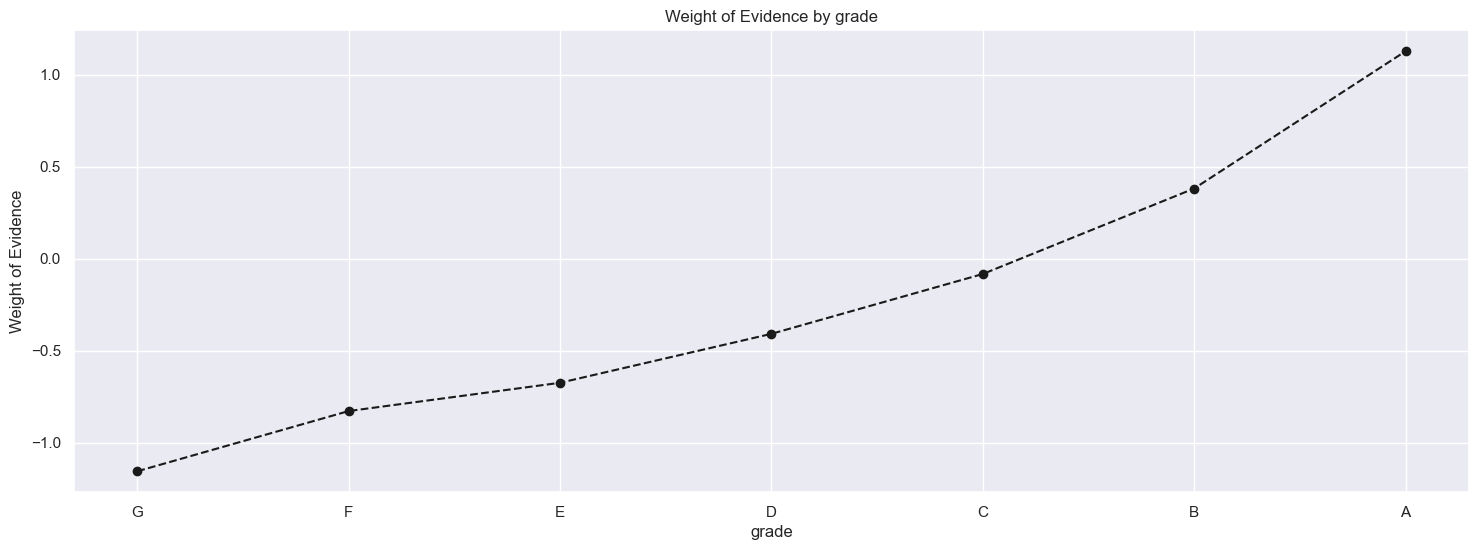

In [70]:
# Apply df_temp
plot_by_woe(df_temp)

Based on weight of evidence, we must decide how to organize the original categories of the discrete variables into dummy variables for the PD model.

We'll always keep the category with the worst credit risk as a reference category (grade G). 

### Preprocessing Discrete Variables: Creating Dummy Variables, Part 1

**home_ownership**

In [71]:
# Apply home ownership to the function
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

home_ownership  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          OTHER     45   0.844444    0.000483     38.0     7.0     0.000457   
1           RENT  37874   0.875719    0.406125  33167.0  4707.0     0.398570   
2            OWN   8409   0.889404    0.090170   7479.0   930.0     0.089876   
3           NONE     10   0.900000    0.000107      9.0     1.0     0.000108   
4       MORTGAGE  46919   0.906285    0.503115  42522.0  4397.0     0.510990   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.000697 -0.422975             NaN       NaN  0.022855  
1    0.468731 -0.162147        0.031275  0.260829  0.022855  
2    0.092611 -0.029982        0.013685  0.132165  0.022855  
3    0.000100  0.082573        0.010596  0.112555  0.022855  
4    0.437861  0.154448        0.006285  0.071875  0.022855

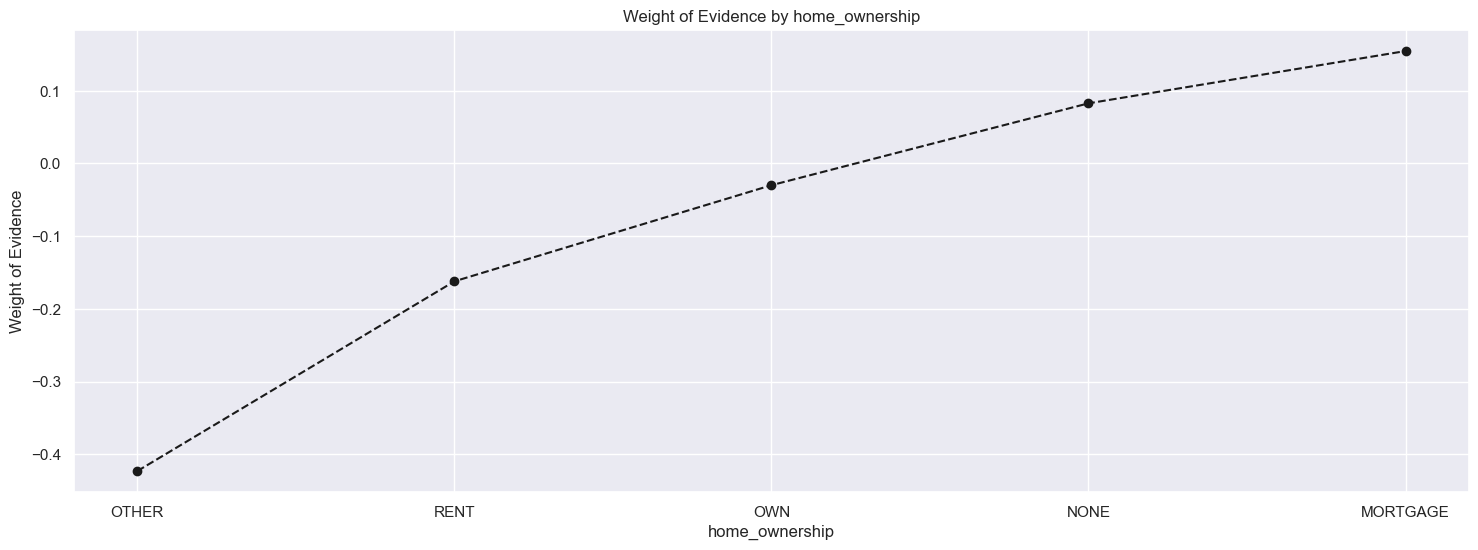

In [72]:
plot_by_woe(df_temp)

The numbers of observations for OTHER, NONE and ANY are significantly lower than the rest. In such cases, we combine underrepresented categories.

In [73]:
# Combine underrepresented categories, 'RENT_OTHER_NONE_ANY' will be the reference category
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                             df_inputs_prepr['home_ownership:NONE'], df_inputs_prepr['home_ownership:ANY']])

# Alternatively:
#loan_data.loc['home_ownership' in ['RENT', 'OTHER', 'NONE', 'ANY'], 'home_ownership:RENT_OTHER_NONE_ANY'] = 1
#loan_data.loc['home_ownership' not in ['RENT', 'OTHER', 'NONE', 'ANY'], 'home_ownership:RENT_OTHER_NONE_ANY'] = 0
#loan_data.loc['loan_status' not in ['OWN'], 'home_ownership:OWN'] = 1
#loan_data.loc['loan_status' not in ['OWN'], 'home_ownership:OWN'] = 0
#loan_data.loc['loan_status' not in ['MORTGAGE'], 'home_ownership:MORTGAGE'] = 1
#loan_data.loc['loan_status' not in ['MORTGAGE'], 'home_ownership:MORTGAGE'] = 0

### Preprocessing Discrete Variables: Creating Dummy Variables, Part 2

**addr_state**

In [74]:
# Get unique values of address state
df_inputs_prepr['addr_state'].unique()

array(['CA', 'IN', 'AZ', 'MI', 'PA', 'MO', 'CT', 'IL', 'SC', 'VA', 'NY',
       'FL', 'TX', 'NC', 'NM', 'NJ', 'KY', 'DE', 'OK', 'CO', 'OH', 'GA',
       'LA', 'WA', 'AL', 'TN', 'MD', 'NV', 'MN', 'RI', 'NH', 'MA', 'MS',
       'UT', 'WV', 'HI', 'KS', 'OR', 'WY', 'WI', 'AK', 'DC', 'AR', 'MT',
       'SD', 'VT', 'IA', 'ID', 'ME', 'NE'], dtype=object)

In [75]:
# Apply this column to the function
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

C:\Users\My Pham\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


addr_state  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          NE      1   0.000000    0.000011      0.0     1.0     0.000000   
1          ID      2   0.500000    0.000021      1.0     1.0     0.000012   
2          NV   1298   0.858243    0.013919   1114.0   184.0     0.013387   
3          HI    486   0.860082    0.005211    418.0    68.0     0.005023   
4          FL   6426   0.872549    0.068906   5607.0   819.0     0.067380   
5          AL   1182   0.875635    0.012675   1035.0   147.0     0.012438   
6          LA   1130   0.876991    0.012117    991.0   139.0     0.011909   
7          NJ   3676   0.878128    0.039418   3228.0   448.0     0.038791   
8          NY   8031   0.880837    0.086117   7074.0   957.0     0.085009   
9          RI    403   0.880893    0.004321    355.0    48.0     0.004266   
10         MI   2358   0.882103    0.025285   2080.0   278.0     0.024995   
11         NC   2478   0.882970    0.026572   2188.0   290.0     0.026293   
12         MD   2203   0.885157    0.023623   1950.0   253.0     0.023433   
13         OK    833   0.885954    0.008932    738.0    95.0     0.008869   
14         MO   1491   0.887324    0.015988   1323.0   168.0     0.015899   
15         AR    728   0.888736    0.007806    647.0    81.0     0.007775   
16         NM    513   0.888889    0.005501    456.0    57.0     0.005480   
17         AZ   2067   0.889211    0.022165   1838.0   229.0     0.022087   
18         PA   3334   0.890522    0.035751   2969.0   365.0     0.035679   
19         CA  14251   0.890674    0.152814  12693.0  1558.0     0.152533   
20         SD    179   0.893855    0.001919    160.0    19.0     0.001923   
21         DE    208   0.894231    0.002230    186.0    22.0     0.002235   
22         GA   3015   0.895522    0.032330   2700.0   315.0     0.032446   
23         NH    402   0.895522    0.004311    360.0    42.0     0.004326   
24         VA   2856   0.896359    0.030625   2560.0   296.0     0.030764   
25         IN   1315   0.896578    0.014101   1179.0   136.0     0.014168   
26         MA   2214   0.897019    0.023741   1986.0   228.0     0.023866   
27         OH   3102   0.897163    0.033263   2783.0   319.0     0.033443   
28         UT    672   0.898810    0.007206    604.0    68.0     0.007258   
29         WI   1171   0.899231    0.012557   1053.0   118.0     0.012654   
30         MN   1632   0.899510    0.017500   1468.0   164.0     0.017641   
31         WA   2145   0.901632    0.023001   1934.0   211.0     0.023241   
32         CO   1916   0.906054    0.020545   1736.0   180.0     0.020862   
33         TN   1139   0.906936    0.012214   1033.0   106.0     0.012414   
34         SC   1135   0.907489    0.012171   1030.0   105.0     0.012378   
35         OR   1135   0.908370    0.012171   1031.0   104.0     0.012390   
36         TX   7281   0.908392    0.078075   6614.0   667.0     0.079481   
37         IL   3779   0.911088    0.040522   3443.0   336.0     0.041375   
38         CT   1429   0.911127    0.015323   1302.0   127.0     0.015646   
39         KY    851   0.911868    0.009125    776.0    75.0     0.009325   
40         WV    486   0.917695    0.005211    446.0    40.0     0.005360   
41         WY    209   0.918660    0.002241    192.0    17.0     0.002307   
42         AK    248   0.919355    0.002659    228.0    20.0     0.002740   
43         VT    178   0.921348    0.001909    164.0    14.0     0.001971   
44         DC    297   0.922559    0.003185    274.0    23.0     0.003293   
45         MS    246   0.922764    0.002638    227.0    19.0     0.002728   
46         KS    830   0.922892    0.008900    766.0    64.0     0.009205   
47         MT    293   0.928328    0.003142    272.0    21.0     0.003269   
48         ME      2   1.000000    0.000021      2.0     0.0     0.000024   
49         IA      1   1.000000    0.000011      1.0     0.0     0.000012   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.000100   

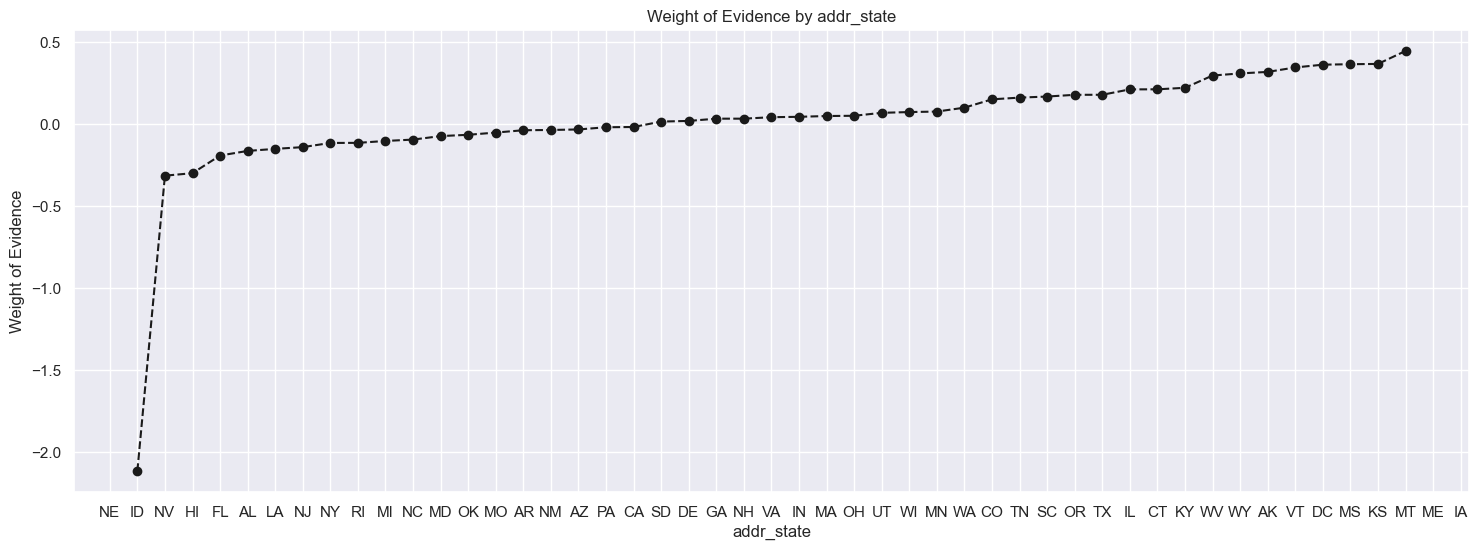

In [76]:
# Plot WoE
plot_by_woe(df_temp)

In [77]:
# Add missing state
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

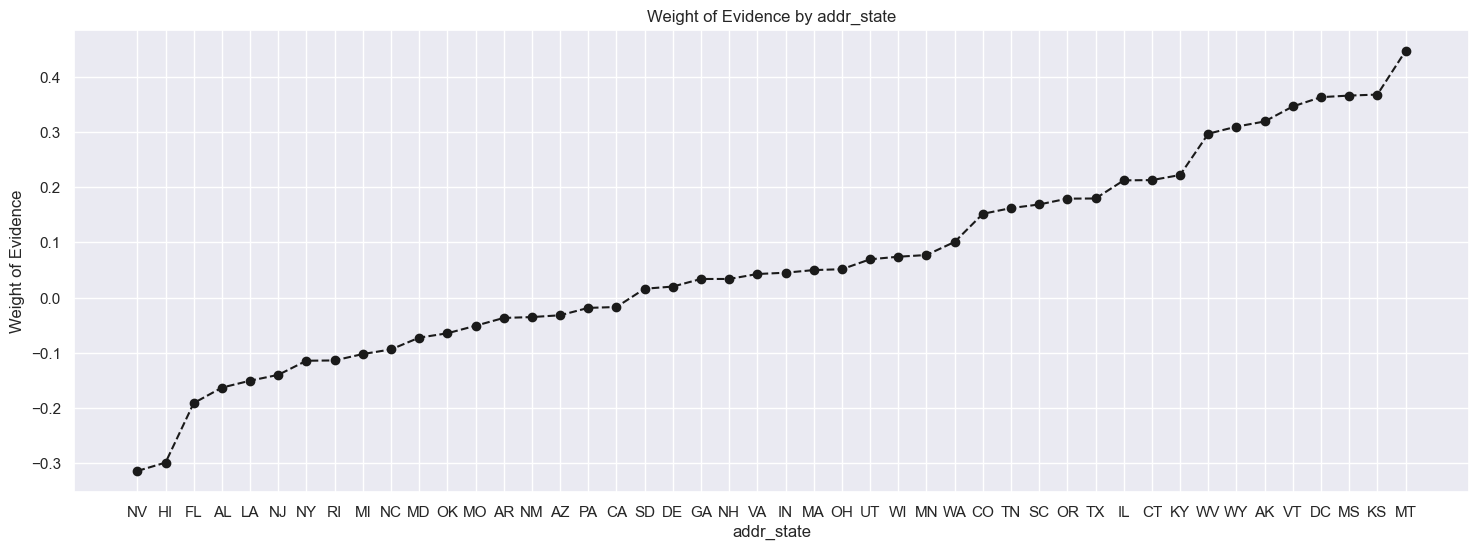

In [78]:
# Exclude states that have lowest numbers of observations
plot_by_woe(df_temp.iloc[2:-2, :])

NE has the lowest WoE, followed by the next 3 states. We place the state we have no information about in the WORST  (highest risk) category (ND). 

We'll combine the states with lowest WoE as a separate categories (NE, IA, ND, NV, FL, HI, AL) since they also have the lowest numbers of observations, and do the same for the states with the highest WoE (WV, NH, WY, DC, ME, ID).

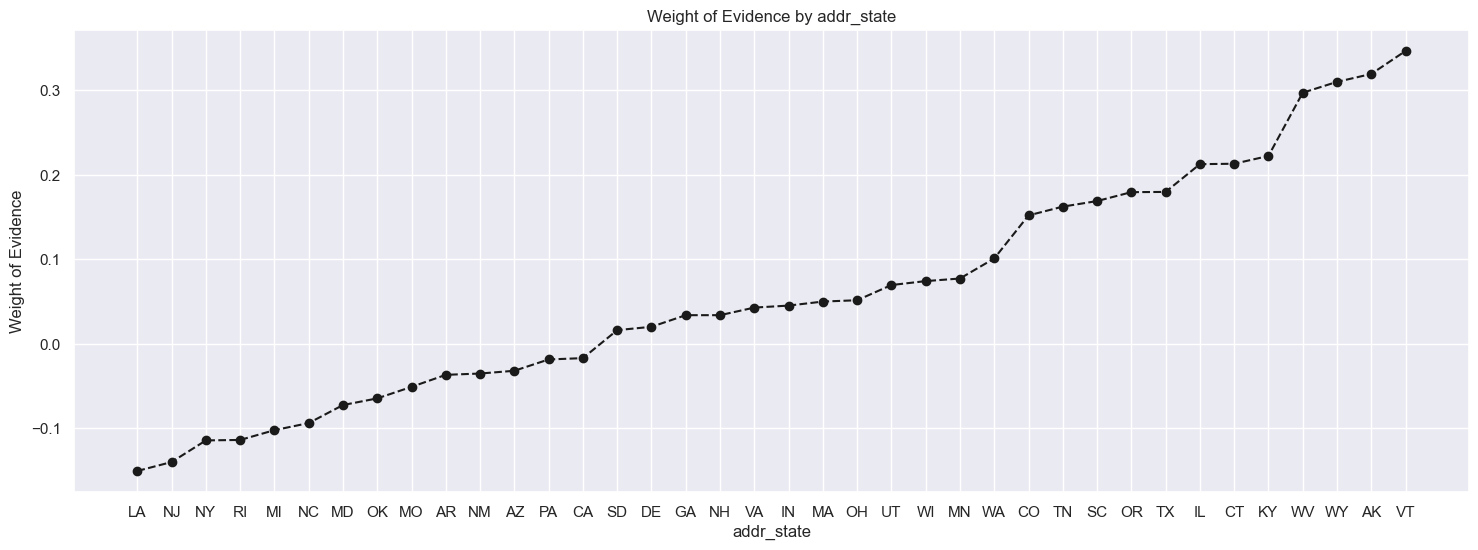

In [79]:
plot_by_woe(df_temp.iloc[6:-6, :])

We'll group the first 3 states with NY being the cutoff, then the next 3 states with MD being the cutoff as it would not be correct to combine VA, OL and TN wih LA, NC, etc. because 8% of the observations are from NY.

Based on the chart and the percentage of observations from the table, we'll dummy variables by grouping the following states together:
- ND, NE, IA, NV, FL, HI, AL (missing states)
- NM, VA
- NY (high number of obs)
- OK, TN, MO, LA, MD, NC
- CA (high number of obs)
- UT, KY, AZ, NJ
- AR, MI, PA, OH, MN
- RI, MA, DE, SD, IN
- GA, WA, OR
- WI, MT
- TX (high number of obs)
- IL, CT
- KS, SC, CO, VT, AK, MS (low number of obs)
- WV, NH, WY, DC, ME, ID

In [80]:
# 'IA_NV_HI_ID_AL_FL' will be the reference category
df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

### Preprocessing Discrete Variables: Creating Dummy Variables, Part 3

**verification_status**

In [81]:
# Calculate weight of evidence for 'verification_status'
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp

verification_status  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0            Verified  33641   0.873369    0.360734  29381.0  4260.0   
1     Source Verified  29963   0.896205    0.321295  26853.0  3110.0   
2        Not Verified  29653   0.909891    0.317971  26981.0  2672.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.353073    0.424218 -0.183572             NaN       NaN  0.025088  
1     0.322694    0.309699  0.041103        0.022837  0.224676  0.025088  
2     0.324232    0.266082  0.197654        0.013686  0.156551  0.025088

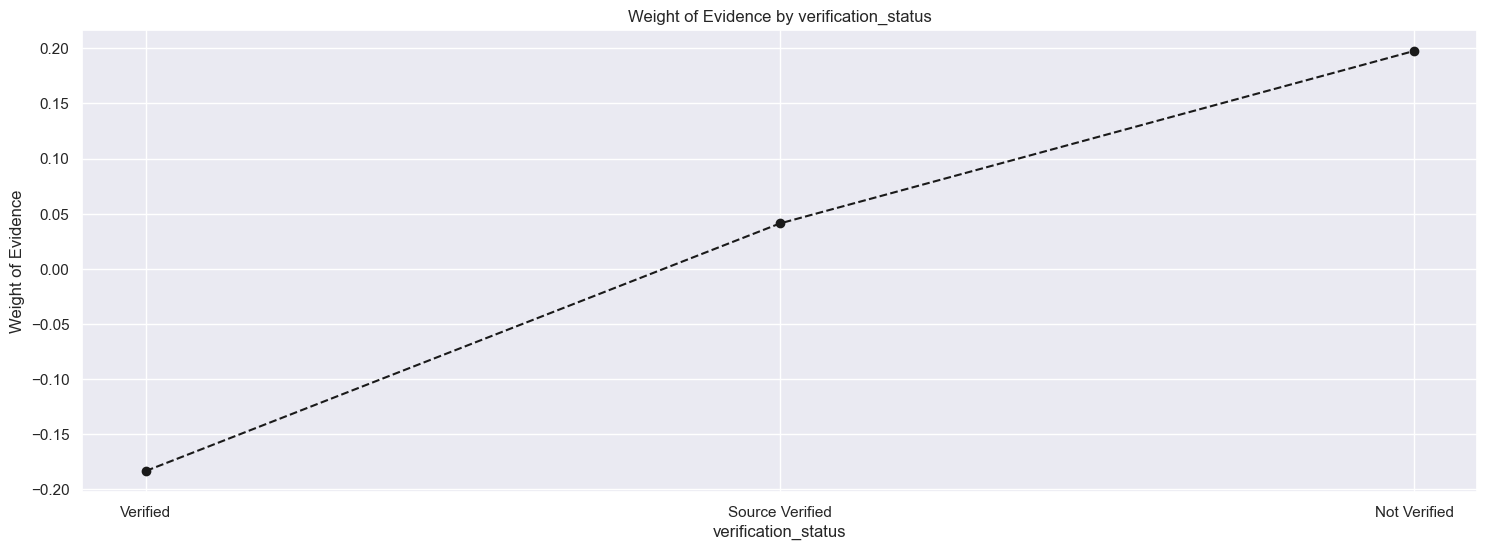

In [82]:
# Plot the weight of evidence values
plot_by_woe(df_temp)

**purpose**

In [83]:
# Calculate weight of evidence for 'purpose'
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr) 
df_temp

purpose  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0     renewable_energy     70   0.771429    0.000751     54.0    16.0   
1       small_business   1431   0.788959    0.015345   1129.0   302.0   
2          educational     89   0.842697    0.000954     75.0    14.0   
3                house    439   0.861048    0.004707    378.0    61.0   
4              medical    918   0.863834    0.009844    793.0   125.0   
5                other   4806   0.866209    0.051535   4163.0   643.0   
6              wedding    456   0.868421    0.004890    396.0    60.0   
7               moving    602   0.878738    0.006455    529.0    73.0   
8             vacation    496   0.883065    0.005319    438.0    58.0   
9   debt_consolidation  55012   0.886879    0.589897  48789.0  6223.0   
10      major_purchase   1991   0.901557    0.021350   1795.0   196.0   
11    home_improvement   5299   0.910172    0.056821   4823.0   476.0   
12                 car   1072   0.916978    0.011495    983.0    89.0   
13         credit_card  20576   0.917088    0.220638  18870.0  1706.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE       IV  
0      0.000649    0.001593 -0.898256             NaN       NaN  0.04078  
1      0.013567    0.030074 -0.795991        0.017530  0.102265  0.04078  
2      0.000901    0.001394 -0.436221        0.053738  0.359770  0.04078  
3      0.004542    0.006074 -0.290631        0.018351  0.145590  0.04078  
4      0.009530    0.012448 -0.267142        0.002787  0.023489  0.04078  
5      0.050027    0.064031 -0.246805        0.002374  0.020337  0.04078  
6      0.004759    0.005975 -0.227582        0.002212  0.019223  0.04078  
7      0.006357    0.007269 -0.134122        0.010316  0.093459  0.04078  
8      0.005263    0.005776 -0.092875        0.004327  0.041247  0.04078  
9      0.586301    0.619697 -0.055399        0.003815  0.037477  0.04078  
10     0.021571    0.019518  0.099994        0.014678  0.155393  0.04078  
11     0.057958    0.047401  0.201082        0.008615  0.101088  0.04078  
12     0.011813    0.008863  0.287321        0.006806  0.086239  0.04078  
13     0.226762    0.169886  0.288771        0.000110  0.001449  0.04078

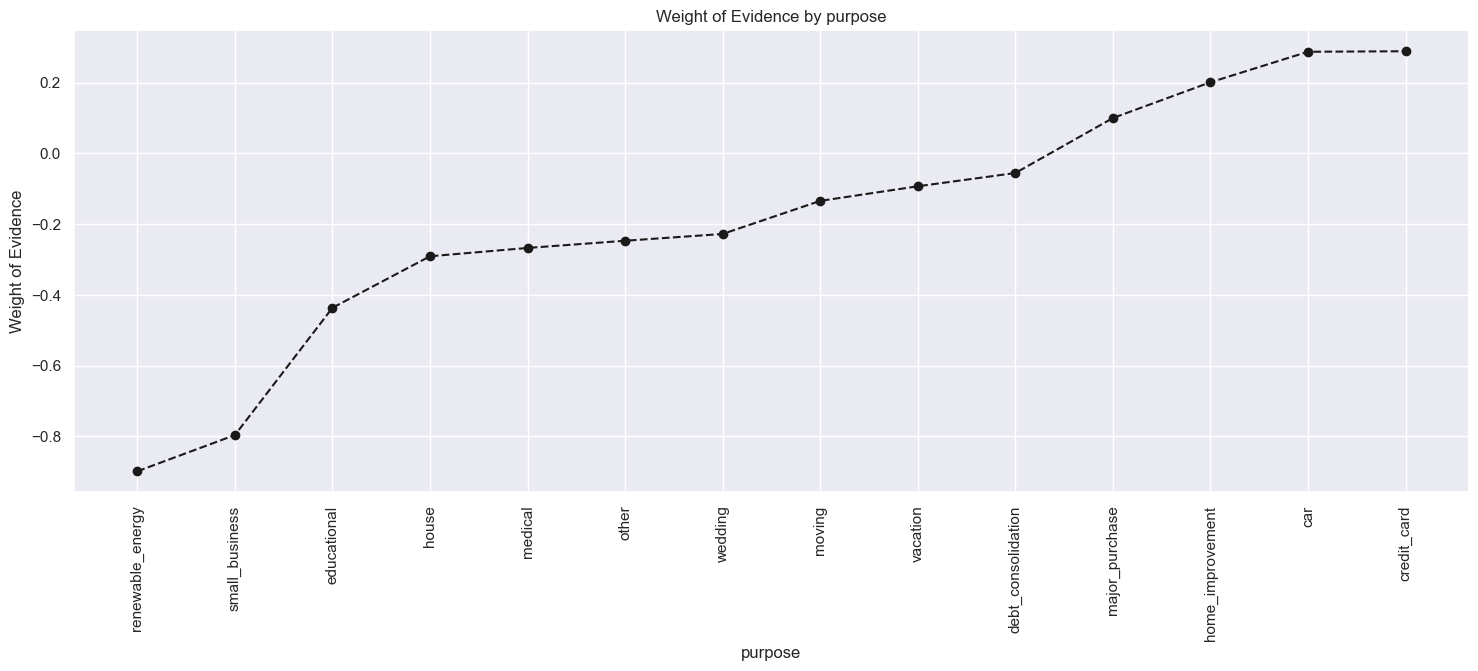

In [84]:
# Plot the weight of evidence values
plot_by_woe(df_temp, 90)

We'll combine the following categories:
- 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
- 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
- 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
- 'debt_consolidtion' in a separate category.
- 'credit_card' in a separate category.
- 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.

In [85]:
# Create categories
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

**initial_list_status**

In [86]:
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

initial_list_status  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0                   f  60491   0.882131    0.648648  53361.0  7130.0   
1                   w  32766   0.911127    0.351352  29854.0  2912.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.641243    0.710018 -0.101882             NaN       NaN  0.021644  
1     0.358757    0.289982  0.212827        0.028996   0.31471  0.021644

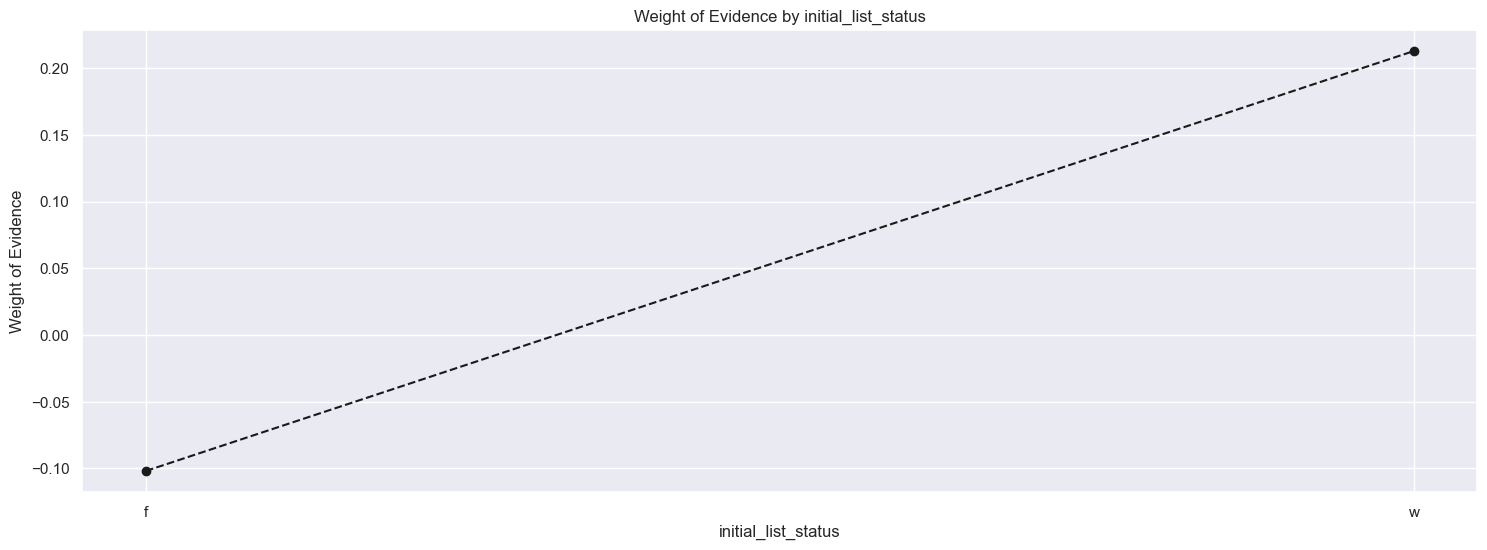

In [87]:
# Plot the weight of evidence values
plot_by_woe(df_temp)

### Preprocessing Continuous Variables: Automating Calculations and Visualizing Results

In [88]:
# WoE function for ordered discrete and continuous variables (sorted by their own values instead of WoE)
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 1

**term_int**

In [89]:
# Get unique values of term_int
df_inputs_prepr['term_int'].unique()

array([60, 36], dtype=int64)

In [90]:
# Apply to the function
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp

term_int  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0        36  67534   0.904522    0.724171  61086.0  6448.0     0.734074   
1        60  25723   0.860281    0.275829  22129.0  3594.0     0.265926   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.642103  0.133861             NaN       NaN  0.039629  
1    0.357897 -0.297028        0.044241   0.43089  0.039629

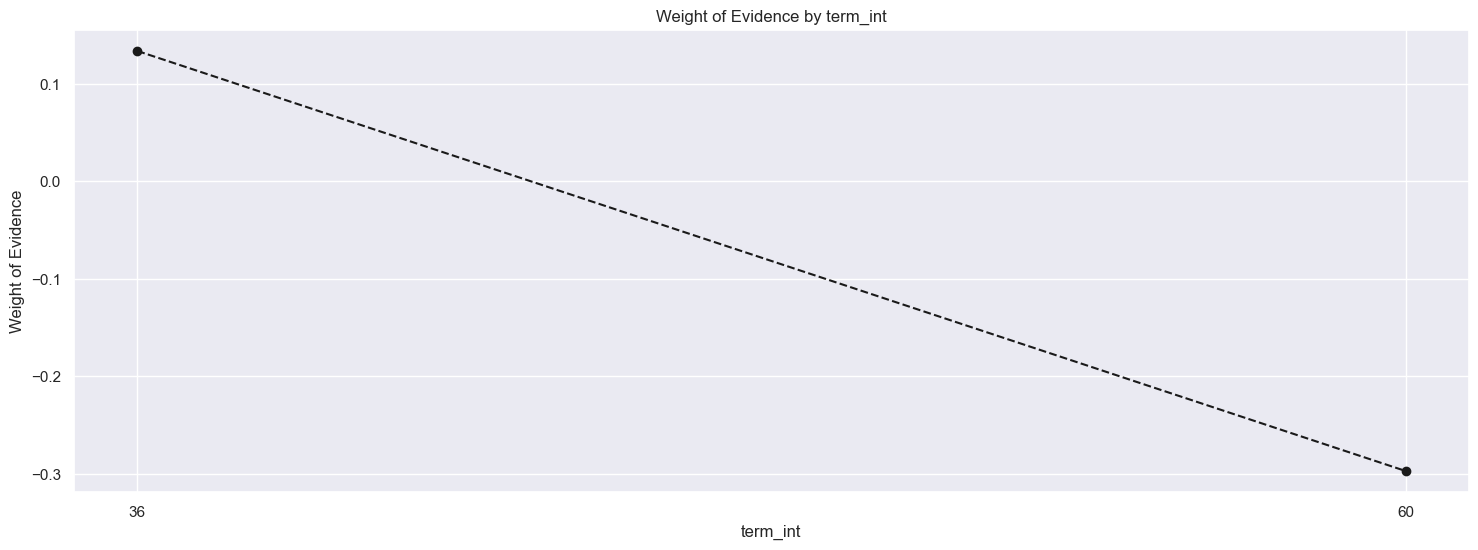

In [91]:
# Plot the WoE
plot_by_woe(df_temp)

In [92]:
# Create two dummies
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

**emp_length_int**

In [93]:
# Get unique values of emp_length_int
df_inputs_prepr['emp_length_int'].unique()

array([0., 1., 2., 9., 3., 6., 4., 7., 8., 5.])

In [94]:
# Apply to the function
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_temp

emp_length_int  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0             0.0  41357   0.894456    0.443473  36992.0  4365.0     0.444535   
1             1.0   5968   0.896113    0.063995   5348.0   620.0     0.064267   
2             2.0   8295   0.888849    0.088948   7373.0   922.0     0.088602   
3             3.0   7391   0.891084    0.079254   6586.0   805.0     0.079144   
4             4.0   5555   0.891449    0.059567   4952.0   603.0     0.059509   
5             5.0   6172   0.888205    0.066183   5482.0   690.0     0.065878   
6             6.0   5225   0.881148    0.056028   4604.0   621.0     0.055327   
7             7.0   5131   0.894562    0.055020   4590.0   541.0     0.055158   
8             8.0   4542   0.891458    0.048704   4049.0   493.0     0.048657   
9             9.0   3621   0.894504    0.038828   3239.0   382.0     0.038923   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.434674  0.022432             NaN       NaN  0.001354  
1    0.061741  0.040107        0.001657  0.017675  0.001354  
2    0.091814 -0.035617        0.007264  0.075724  0.001354  
3    0.080163 -0.012792        0.002235  0.022824  0.001354  
4    0.060048 -0.009022        0.000365  0.003770  0.001354  
5    0.068711 -0.042118        0.003244  0.033096  0.001354  
6    0.061840 -0.111302        0.007056  0.069184  0.001354  
7    0.053874  0.023565        0.013414  0.134866  0.001354  
8    0.049094 -0.008935        0.003105  0.032500  0.001354  
9    0.038040  0.022948        0.003047  0.031883  0.001354

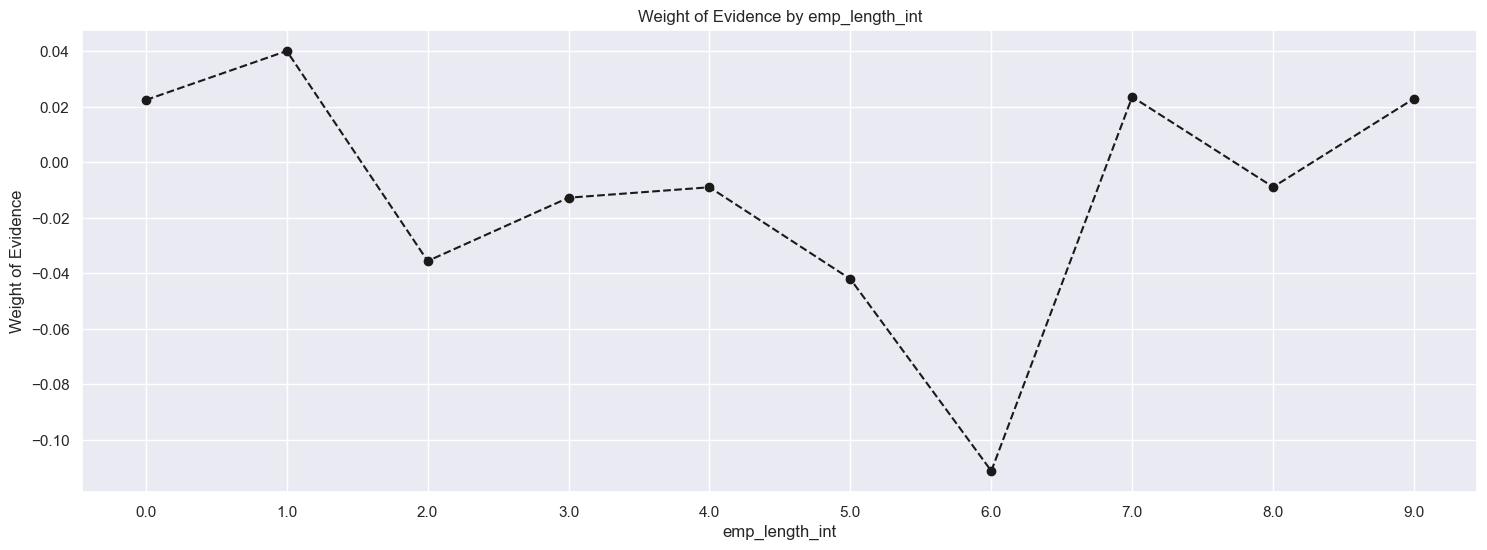

In [95]:
# Plot the WoE
plot_by_woe(df_temp)

These variables don't need fine classing because they are ordered discrete variables that are assumed to be continuous and have very few distinct values.

In [96]:
# Create dummy variables
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)

# Perform coerce classing 
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2,5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5,7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7,10)), 1, 0)

df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 2

- **Fine classing:** roughly grouping values into categories
- **Coerce classing:** determining final categoeis, combining few of the initial fine classing categories into bigger categories, if needed

**mths_since_issue_d**

In [97]:
# Get unique values of mths_since_issue_d
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 40.,  37.,  65.,  36.,  57.,  49.,  84.,  50.,  47.,  58.,  71.,
        76.,  46.,  45.,  55.,  54., 117.,  62., 100.,  38.,  52.,  39.,
        51.,  42.,  48.,  56.,  44.,  35.,  53.,  73.,  43.,  72., 101.,
        69.,  93.,  87.,  67.,  80.,  70.,  75., 102.,  64.,  79.,  89.,
        74.,  66.,  41.,  60.,  63.,  59.,  83.,  86., 108.,  94.,  77.,
        81.,  68.,  88.,  61., 106.,  78.,  90., 116.,  97., 113.,  95.,
       112., 114.,  98.,  91., 115., 104., 122.,  99., 123.,  85.,  82.,
        92., 103., 107.,  96., 105., 110., 111., 120., 109., 118., 119.,
       121., 124.])

In [98]:
# Create a new series with as many number of categories as specified
# indicating the interval value where each observation from the series lies
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)
df_inputs_prepr['mths_since_issue_d_factor']

362514     (38.56, 40.34]
288564     (36.78, 38.56]
213591     (63.48, 65.26]
263083    (34.911, 36.78]
165001     (56.36, 58.14]
               ...       
115         (70.6, 72.38]
296284     (36.78, 38.56]
61777      (47.46, 49.24]
91763      (49.24, 51.02]
167512     (56.36, 58.14]
Name: mths_since_issue_d_factor, Length: 93257, dtype: category
Categories (50, interval[float64, right]): [(34.911, 36.78] < (36.78, 38.56] < (38.56, 40.34] < (40.34, 42.12] ... (116.88, 118.66] < (118.66, 120.44] < (120.44, 122.22] < (122.22, 124.0]]

For example, 412305 is where the cut is. Now we can treat our new categorical variable just like any other categorical variable. The only difference is the first column created by fine classing.

In [99]:
# Calculate WoE
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
df_temp

mths_since_issue_d_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0            (34.911, 36.78]   7191   0.945766    0.077109  6801.0  390.0   
1             (36.78, 38.56]   9752   0.930373    0.104571  9073.0  679.0   
2             (38.56, 40.34]   9506   0.919945    0.101933  8745.0  761.0   
3             (40.34, 42.12]   7240   0.909116    0.077635  6582.0  658.0   
4              (42.12, 43.9]   3821   0.908139    0.040973  3470.0  351.0   
5              (43.9, 45.68]   6500   0.896154    0.069700  5825.0  675.0   
6             (45.68, 47.46]   6197   0.890269    0.066451  5517.0  680.0   
7             (47.46, 49.24]   5821   0.885930    0.062419  5157.0  664.0   
8             (49.24, 51.02]   5021   0.878909    0.053840  4413.0  608.0   
9              (51.02, 52.8]   2350   0.873617    0.025199  2053.0  297.0   
10             (52.8, 54.58]   4211   0.870577    0.045155  3666.0  545.0   
11            (54.58, 56.36]   3572   0.861422    0.038303  3077.0  495.0   
12            (56.36, 58.14]   2904   0.850895    0.031140  2471.0  433.0   
13            (58.14, 59.92]   1197   0.848789    0.012835  1016.0  181.0   
14             (59.92, 61.7]   2588   0.853168    0.027751  2208.0  380.0   
15             (61.7, 63.48]   2343   0.840802    0.025124  1970.0  373.0   
16            (63.48, 65.26]   1721   0.816967    0.018454  1406.0  315.0   
17            (65.26, 67.04]   1296   0.852623    0.013897  1105.0  191.0   
18            (67.04, 68.82]    579   0.848014    0.006209   491.0   88.0   
19             (68.82, 70.6]   1038   0.815029    0.011131   846.0  192.0   
20             (70.6, 72.38]    928   0.831897    0.009951   772.0  156.0   
21            (72.38, 74.16]    790   0.853165    0.008471   674.0  116.0   
22            (74.16, 75.94]    390   0.887179    0.004182   346.0   44.0   
23            (75.94, 77.72]    735   0.863946    0.007881   635.0  100.0   
24             (77.72, 79.5]    624   0.844551    0.006691   527.0   97.0   
25             (79.5, 81.28]    829   0.872135    0.008889   723.0  106.0   
26            (81.28, 83.06]    483   0.886128    0.005179   428.0   55.0   
27            (83.06, 84.84]    228   0.842105    0.002445   192.0   36.0   
28            (84.84, 86.62]    443   0.891648    0.004750   395.0   48.0   
29             (86.62, 88.4]    439   0.881549    0.004707   387.0   52.0   
30             (88.4, 90.18]    397   0.889169    0.004257   353.0   44.0   
31            (90.18, 91.96]    164   0.926829    0.001759   152.0   12.0   
32            (91.96, 93.74]    257   0.887160    0.002756   228.0   29.0   
33            (93.74, 95.52]    276   0.862319    0.002960   238.0   38.0   
34             (95.52, 97.3]    234   0.846154    0.002509   198.0   36.0   
35             (97.3, 99.08]    183   0.912568    0.001962   167.0   16.0   
36           (99.08, 100.86]     87   0.931034    0.000933    81.0    6.0   
37          (100.86, 102.64]    150   0.893333    0.001608   134.0   16.0   
38          (102.64, 104.42]    129   0.899225    0.001383   116.0   13.0   
39           (104.42, 106.2]    119   0.890756    0.001276   106.0   13.0   
40           (106.2, 107.98]     36   0.861111    0.000386    31.0    5.0   
41          (107.98, 109.76]     40   0.900000    0.000429    36.0    4.0   
42          (109.76, 111.54]     37   1.000000    0.000397    37.0    0.0   
43          (111.54, 113.32]     57   0.894737    0.000611    51.0    6.0   
44           (113.32, 115.1]    131   0.885496    0.001405   116.0   15.0   
45           (115.1, 116.88]     59   0.915254    0.000633    54.0    5.0   
46          (116.88, 118.66]     83   0.867470    0.000890    72.0   11.0   
47          (118.66, 120.44]     41   0.902439    0.000440    37.0    4.0   
48          (120.44, 122.22]     23   0.869565    0.000247    20.0    3.0   
49           (122.22, 124.0]     17   1.000000    0.000182    17.0    0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0   

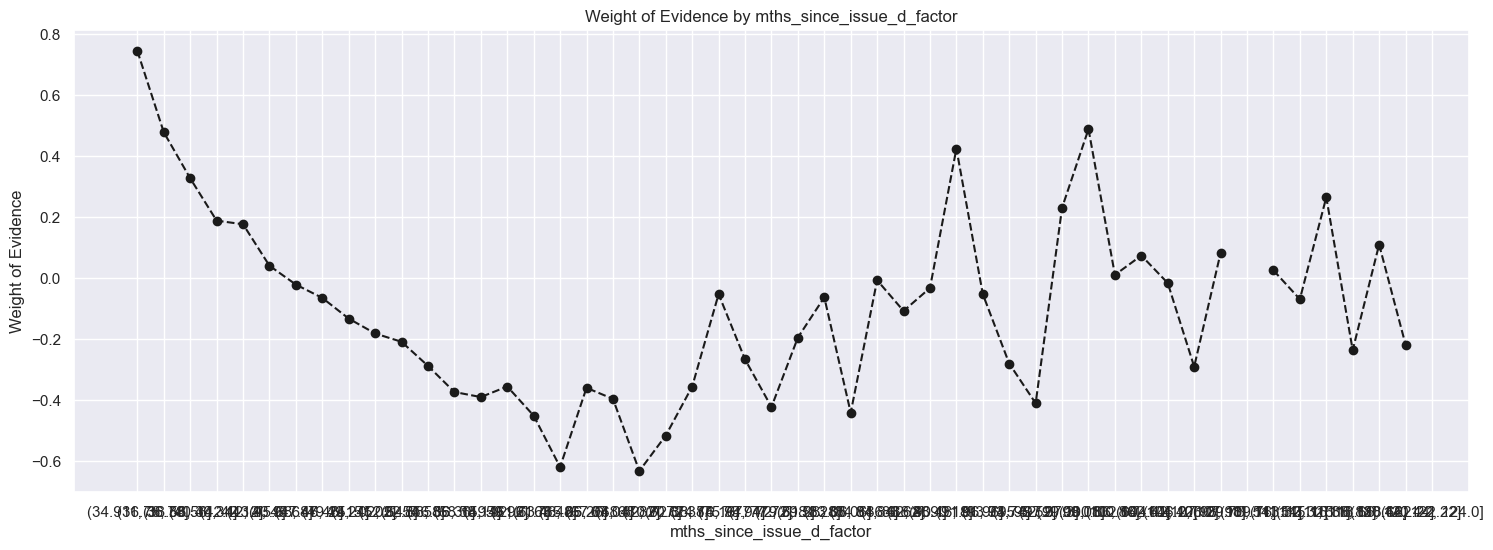

In [100]:
# Plot the WoE
plot_by_woe(df_temp)

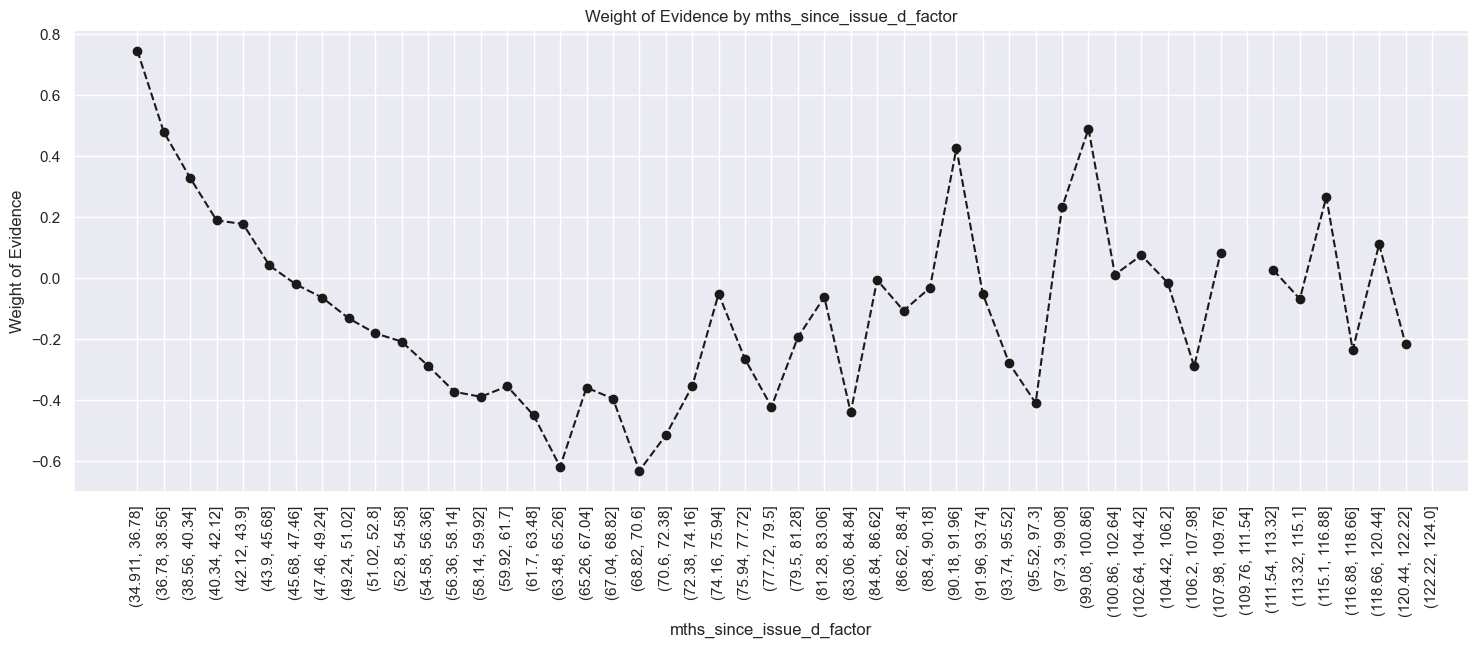

In [101]:
# Rotate labels
plot_by_woe(df_temp, 90)

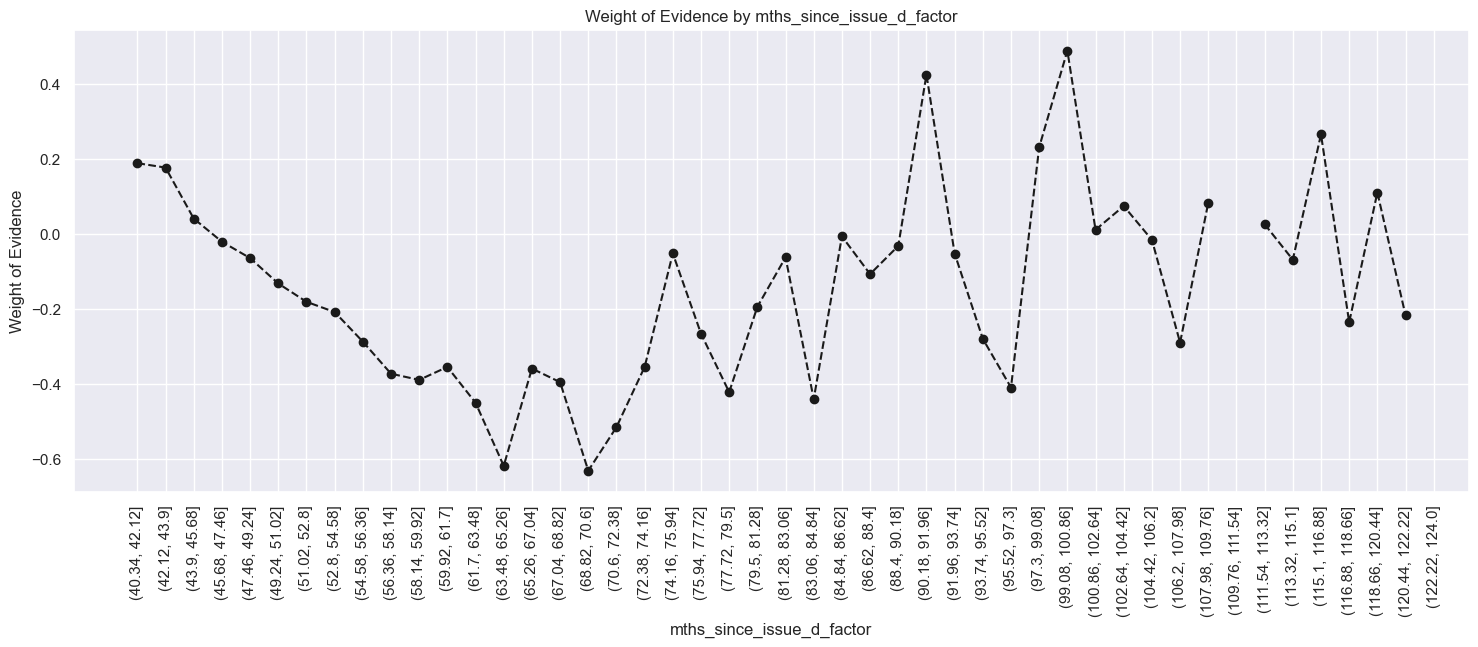

In [102]:
# Exclude the first 3 categories
plot_by_woe(df_temp.iloc[3: , :], 90)

In [103]:
# Create the following categories: < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

**int_rate_factor**

In [104]:
# # Perform fine-classing for int_rate using the 'cut' method, split the variable into 50 categories by its values
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [105]:
# Calculate weight of evidence.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp

int_rate_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0     (5.399, 5.833]    198   0.969697    0.002123   192.0    6.0   
1     (5.833, 6.246]   2086   0.979866    0.022368  2044.0   42.0   
2     (6.246, 6.658]   1974   0.972138    0.021167  1919.0   55.0   
3     (6.658, 7.071]    477   0.951782    0.005115   454.0   23.0   
4     (7.071, 7.484]    804   0.982587    0.008621   790.0   14.0   
5     (7.484, 7.897]   3245   0.965485    0.034796  3133.0  112.0   
6      (7.897, 8.31]   2429   0.951009    0.026046  2310.0  119.0   
7      (8.31, 8.722]   1680   0.966071    0.018015  1623.0   57.0   
8     (8.722, 9.135]   2384   0.942534    0.025564  2247.0  137.0   
9     (9.135, 9.548]   1590   0.976730    0.017050  1553.0   37.0   
10    (9.548, 9.961]   1881   0.934078    0.020170  1757.0  124.0   
11   (9.961, 10.374]   2766   0.936732    0.029660  2591.0  175.0   
12  (10.374, 10.786]   1390   0.922302    0.014905  1282.0  108.0   
13  (10.786, 11.199]   4464   0.938172    0.047868  4188.0  276.0   
14  (11.199, 11.612]   1213   0.922506    0.013007  1119.0   94.0   
15  (11.612, 12.025]   3737   0.932834    0.040072  3486.0  251.0   
16  (12.025, 12.438]   3077   0.906402    0.032995  2789.0  288.0   
17   (12.438, 12.85]   2754   0.923747    0.029531  2544.0  210.0   
18   (12.85, 13.263]   5440   0.905699    0.058333  4927.0  513.0   
19  (13.263, 13.676]   3806   0.899107    0.040812  3422.0  384.0   
20  (13.676, 14.089]   2692   0.896731    0.028866  2414.0  278.0   
21  (14.089, 14.502]   5760   0.889062    0.061765  5121.0  639.0   
22  (14.502, 14.914]   1187   0.874473    0.012728  1038.0  149.0   
23  (14.914, 15.327]   4811   0.883808    0.051589  4252.0  559.0   
24   (15.327, 15.74]   3146   0.890337    0.033735  2801.0  345.0   
25   (15.74, 16.153]   1869   0.842162    0.020041  1574.0  295.0   
26  (16.153, 16.566]   3230   0.850464    0.034635  2747.0  483.0   
27  (16.566, 16.978]   1035   0.855072    0.011098   885.0  150.0   
28  (16.978, 17.391]   2843   0.850510    0.030486  2418.0  425.0   
29  (17.391, 17.804]   2992   0.839572    0.032083  2512.0  480.0   
30  (17.804, 18.217]    286   0.846154    0.003067   242.0   44.0   
31   (18.217, 18.63]   2729   0.828509    0.029263  2261.0  468.0   
32   (18.63, 19.042]   1835   0.821253    0.019677  1507.0  328.0   
33  (19.042, 19.455]   1135   0.789427    0.012171   896.0  239.0   
34  (19.455, 19.868]   1680   0.817857    0.018015  1374.0  306.0   
35  (19.868, 20.281]   1244   0.850482    0.013339  1058.0  186.0   
36  (20.281, 20.694]    805   0.816149    0.008632   657.0  148.0   
37  (20.694, 21.106]    956   0.793933    0.010251   759.0  197.0   
38  (21.106, 21.519]    701   0.760342    0.007517   533.0  168.0   
39  (21.519, 21.932]    222   0.806306    0.002381   179.0   43.0   
40  (21.932, 22.345]    832   0.775240    0.008922   645.0  187.0   
41  (22.345, 22.758]    586   0.737201    0.006284   432.0  154.0   
42   (22.758, 23.17]    375   0.741333    0.004021   278.0   97.0   
43   (23.17, 23.583]    655   0.778626    0.007024   510.0  145.0   
44  (23.583, 23.996]    408   0.750000    0.004375   306.0  102.0   
45  (23.996, 24.409]    393   0.834606    0.004214   328.0   65.0   
46  (24.409, 24.822]    436   0.786697    0.004675   343.0   93.0   
47  (24.822, 25.234]    351   0.792023    0.003764   278.0   73.0   
48  (25.234, 25.647]    194   0.757732    0.002080   147.0   47.0   
49   (25.647, 26.06]    474   0.738397    0.005083   350.0  124.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.002307    0.000597  1.351085             NaN       NaN  0.373629  
1      0.024563    0.004182  1.770343        0.010169  0.419258  0.373629  
2      0.023061    0.005477  1.437575        0.007728  0.332768  0.373629  
3      0.005456    0.002290  0.867952        0.020356  0.569623  0.373629  
4      0.009493    0.001394  1.918324        0.030805  1.050373  0.373629  
5      0.037649    0.011153  

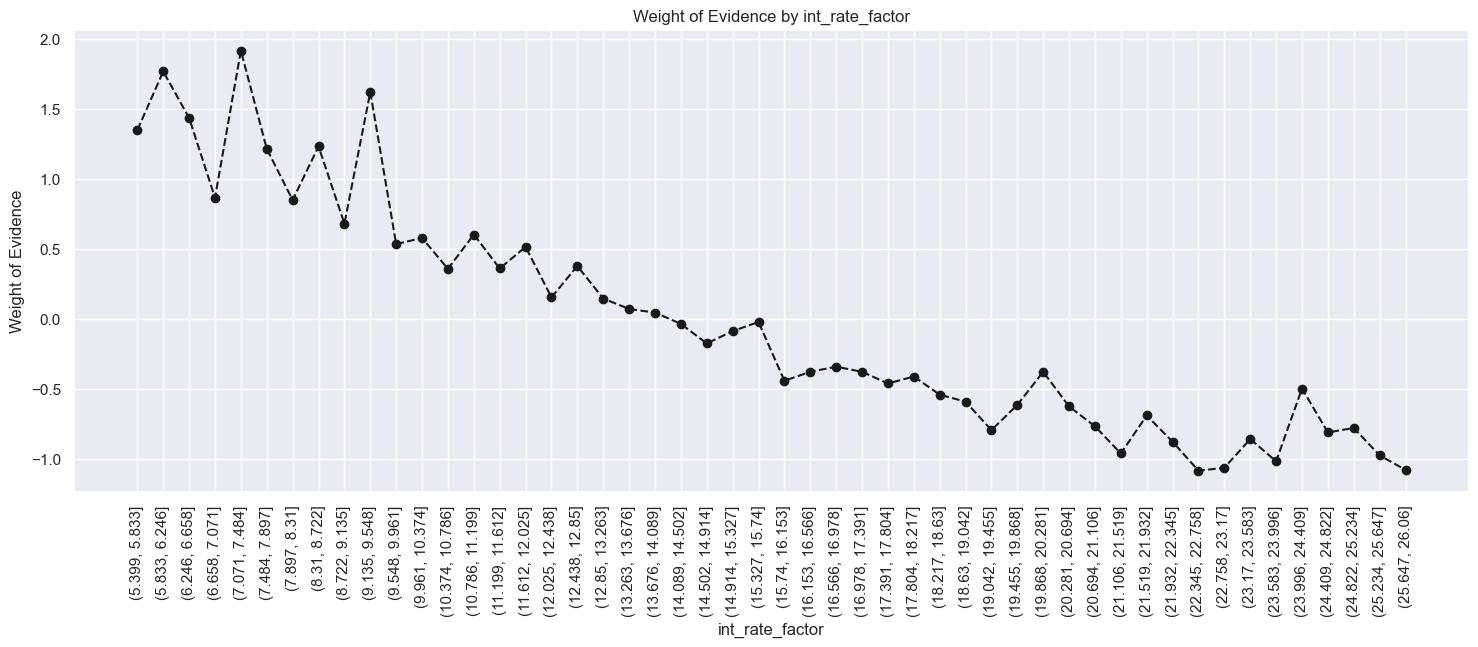

In [106]:
# Plot the weight of evidence values
plot_by_woe(df_temp, 90)

In [107]:
# '< 9.548', '9.548 - 12.025', '12.025 - 15.74', '15.74 - 20.281', '> 20.281'
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

**funded_amnt**

In [108]:
# Perform fine-classing: using the 'cut' method, we split the variable into 50 categories by its values
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)

# Calculate WoE
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_temp

funded_amnt_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0      (465.5, 1190.0]    319   0.890282    0.003421   284.0   35.0   
1     (1190.0, 1880.0]    800   0.897500    0.008578   718.0   82.0   
2     (1880.0, 2570.0]   1513   0.904164    0.016224  1368.0  145.0   
3     (2570.0, 3260.0]   1817   0.894882    0.019484  1626.0  191.0   
4     (3260.0, 3950.0]   1245   0.895582    0.013350  1115.0  130.0   
5     (3950.0, 4640.0]   2298   0.886423    0.024642  2037.0  261.0   
6     (4640.0, 5330.0]   3957   0.902704    0.042431  3572.0  385.0   
7     (5330.0, 6020.0]   4186   0.908743    0.044887  3804.0  382.0   
8     (6020.0, 6710.0]   1718   0.883586    0.018422  1518.0  200.0   
9     (6710.0, 7400.0]   2880   0.897222    0.030882  2584.0  296.0   
10    (7400.0, 8090.0]   4266   0.898265    0.045745  3832.0  434.0   
11    (8090.0, 8780.0]   1617   0.893012    0.017339  1444.0  173.0   
12    (8780.0, 9470.0]   2320   0.890086    0.024877  2065.0  255.0   
13   (9470.0, 10160.0]   8552   0.893709    0.091704  7643.0  909.0   
14  (10160.0, 10850.0]   1642   0.873934    0.017607  1435.0  207.0   
15  (10850.0, 11540.0]   2091   0.881875    0.022422  1844.0  247.0   
16  (11540.0, 12230.0]   5767   0.907057    0.061840  5231.0  536.0   
17  (12230.0, 12920.0]   1228   0.876221    0.013168  1076.0  152.0   
18  (12920.0, 13610.0]   1860   0.899462    0.019945  1673.0  187.0   
19  (13610.0, 14300.0]   2087   0.900335    0.022379  1879.0  208.0   
20  (14300.0, 14990.0]   1255   0.888446    0.013457  1115.0  140.0   
21  (14990.0, 15680.0]   5441   0.904981    0.058344  4924.0  517.0   
22  (15680.0, 16370.0]   2920   0.882877    0.031311  2578.0  342.0   
23  (16370.0, 17060.0]   1625   0.880615    0.017425  1431.0  194.0   
24  (17060.0, 17750.0]    921   0.851249    0.009876   784.0  137.0   
25  (17750.0, 18440.0]   2898   0.886128    0.031075  2568.0  330.0   
26  (18440.0, 19130.0]    989   0.859454    0.010605   850.0  139.0   
27  (19130.0, 19820.0]   1057   0.875118    0.011334   925.0  132.0   
28  (19820.0, 20510.0]   5055   0.897329    0.054205  4536.0  519.0   
29  (20510.0, 21200.0]   1635   0.895413    0.017532  1464.0  171.0   
30  (21200.0, 21890.0]    476   0.836134    0.005104   398.0   78.0   
31  (21890.0, 22580.0]   1028   0.885214    0.011023   910.0  118.0   
32  (22580.0, 23270.0]    633   0.892575    0.006788   565.0   68.0   
33  (23270.0, 23960.0]    497   0.837022    0.005329   416.0   81.0   
34  (23960.0, 24650.0]   2491   0.900040    0.026711  2242.0  249.0   
35  (24650.0, 25340.0]   2500   0.905600    0.026808  2264.0  236.0   
36  (25340.0, 26030.0]    487   0.852156    0.005222   415.0   72.0   
37  (26030.0, 26720.0]    299   0.822742    0.003206   246.0   53.0   
38  (26720.0, 27410.0]    410   0.870732    0.004396   357.0   53.0   
39  (27410.0, 28100.0]   1604   0.895885    0.017200  1437.0  167.0   
40  (28100.0, 28790.0]    204   0.857843    0.002188   175.0   29.0   
41  (28790.0, 29480.0]    286   0.846154    0.003067   242.0   44.0   
42  (29480.0, 30170.0]   1762   0.879682    0.018894  1550.0  212.0   
43  (30170.0, 30860.0]    133   0.827068    0.001426   110.0   23.0   
44  (30860.0, 31550.0]    218   0.830275    0.002338   181.0   37.0   
45  (31550.0, 32240.0]    367   0.920981    0.003935   338.0   29.0   
46  (32240.0, 32930.0]    139   0.884892    0.001491   123.0   16.0   
47  (32930.0, 33620.0]    275   0.901818    0.002949   248.0   27.0   
48  (33620.0, 34310.0]    142   0.894366    0.001523   127.0   15.0   
49  (34310.0, 35000.0]   3347   0.880789    0.035890  2948.0  399.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.003413    0.003485 -0.021025             NaN       NaN  0.020223  
1      0.008628    0.008166  0.055099        0.007218  0.076124  0.020223  
2      0.016439    0.014439  0.129720        0.006664  0.074621  0.020223  
3      0.019540    0.019020  0.026954        0.009282  0.102766  0.020223  
4 

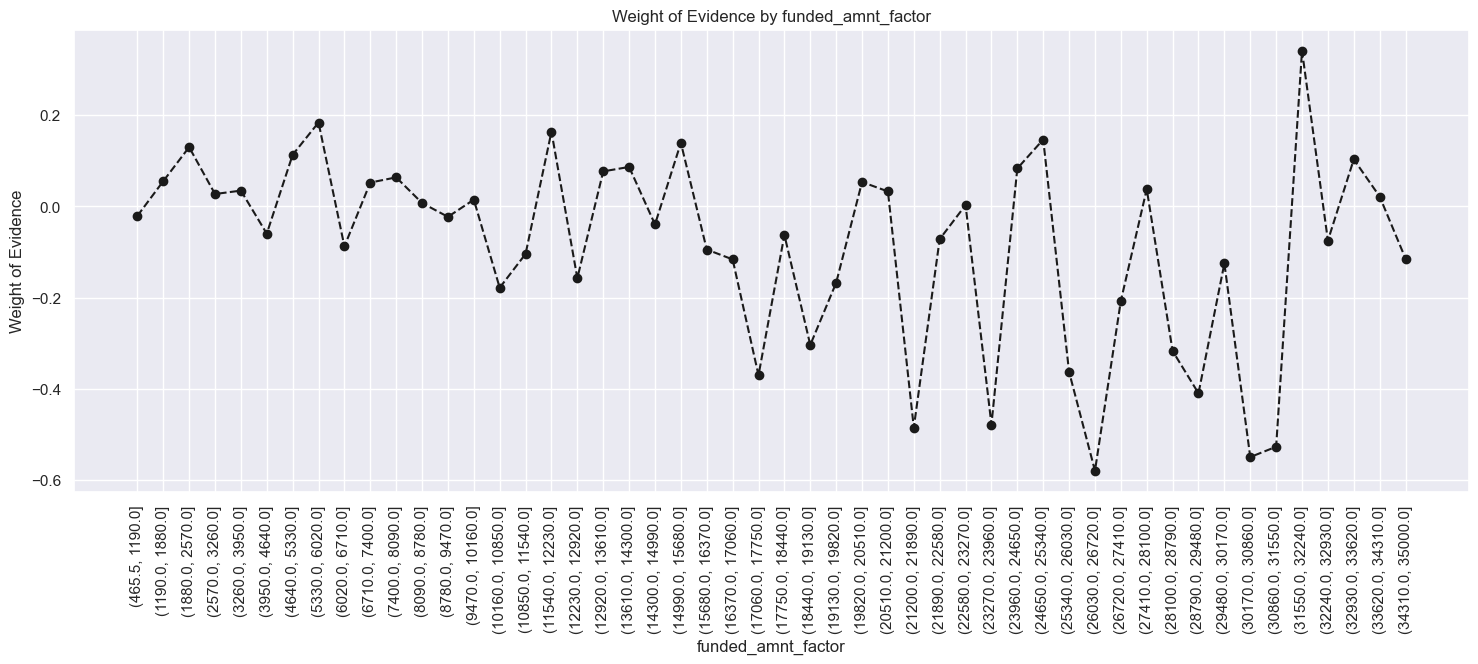

In [109]:
# Plot the weight of evidence values
plot_by_woe(df_temp, 90)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3

**mths_since_earliest_cr_line**

In [110]:
# Perform fine-classing: using the 'cut' method, we split the variable into 50 categories by its values
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
df_temp

mths_since_earliest_cr_line_factor  n_obs  prop_good  prop_n_obs  n_good  \
0                     (-0.576, 11.52]      5   1.000000    0.000054     5.0   
1                      (11.52, 23.04]      0        NaN    0.000000     NaN   
2                      (23.04, 34.56]      0        NaN    0.000000     NaN   
3                      (34.56, 46.08]      0        NaN    0.000000     NaN   
4                       (46.08, 57.6]      0        NaN    0.000000     NaN   
5                       (57.6, 69.12]      0        NaN    0.000000     NaN   
6                      (69.12, 80.64]    182   0.923077    0.001952   168.0   
7                      (80.64, 92.16]    548   0.914234    0.005876   501.0   
8                     (92.16, 103.68]    675   0.847407    0.007238   572.0   
9                     (103.68, 115.2]   1268   0.854890    0.013597  1084.0   
10                    (115.2, 126.72]   2091   0.874701    0.022422  1829.0   
11                   (126.72, 138.24]   3290   0.867173    0.035279  2853.0   
12                   (138.24, 149.76]   3115   0.885393    0.033402  2758.0   
13                   (149.76, 161.28]   3989   0.886939    0.042774  3538.0   
14                    (161.28, 172.8]   4495   0.888098    0.048200  3992.0   
15                    (172.8, 184.32]   5438   0.891872    0.058312  4850.0   
16                   (184.32, 195.84]   6578   0.883551    0.070536  5812.0   
17                   (195.84, 207.36]   7131   0.888375    0.076466  6335.0   
18                   (207.36, 218.88]   6309   0.886353    0.067652  5592.0   
19                    (218.88, 230.4]   5987   0.889761    0.064199  5327.0   
20                    (230.4, 241.92]   4602   0.885267    0.049348  4074.0   
21                   (241.92, 253.44]   4913   0.893955    0.052682  4392.0   
22                   (253.44, 264.96]   4118   0.891209    0.044158  3670.0   
23                   (264.96, 276.48]   4026   0.899404    0.043171  3621.0   
24                    (276.48, 288.0]   3640   0.903846    0.039032  3290.0   
25                    (288.0, 299.52]   2602   0.904304    0.027901  2353.0   
26                   (299.52, 311.04]   2139   0.909771    0.022937  1946.0   
27                   (311.04, 322.56]   1869   0.902622    0.020041  1687.0   
28                   (322.56, 334.08]   2129   0.903241    0.022829  1923.0   
29                    (334.08, 345.6]   1654   0.902056    0.017736  1492.0   
30                    (345.6, 357.12]   1765   0.913314    0.018926  1612.0   
31                   (357.12, 368.64]   1228   0.914495    0.013168  1123.0   
32                   (368.64, 380.16]   1152   0.907118    0.012353  1045.0   
33                   (380.16, 391.68]    966   0.904762    0.010358   874.0   
34                    (391.68, 403.2]    911   0.922064    0.009769   840.0   
35                    (403.2, 414.72]    808   0.926980    0.008664   749.0   
36                   (414.72, 426.24]    524   0.896947    0.005619   470.0   
37                   (426.24, 437.76]    385   0.916883    0.004128   353.0   
38                   (437.76, 449.28]    360   0.922222    0.003860   332.0   
39                    (449.28, 460.8]    376   0.920213    0.004032   346.0   
40                    (460.8, 472.32]    371   0.916442    0.003978   340.0   
41                   (472.32, 483.84]    268   0.906716    0.002874   243.0   
42                   (483.84, 495.36]    255   0.941176    0.002734   240.0   
43                   (495.36, 506.88]    168   0.910714    0.001801   153.0   
44                    (506.88, 518.4]    169   0.928994    0.001812   157.0   
45                    (518.4, 529.92]    135   0.903704    0.001448   122.0   
46                   (529.92, 541.44]    140   0.907143    0.001501   127.0   
47                   (541.44, 552.96]     83   0.927711    0.000890    77.0   
48                   (552.96, 564.48]     80   0.862500    0.000858    69.0   
49                    (564.48, 576.0]    320   0.8718

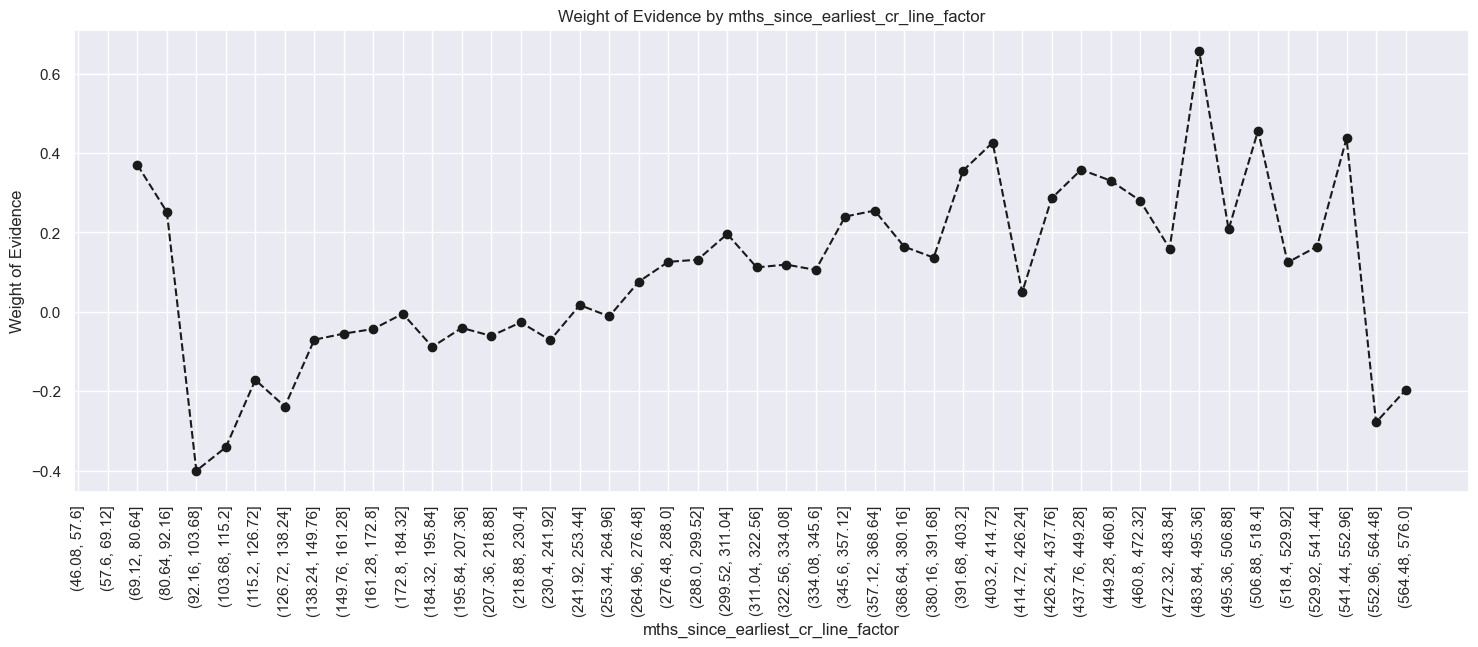

In [111]:
# Plot the weight of evidence values
plot_by_woe(df_temp, 90)

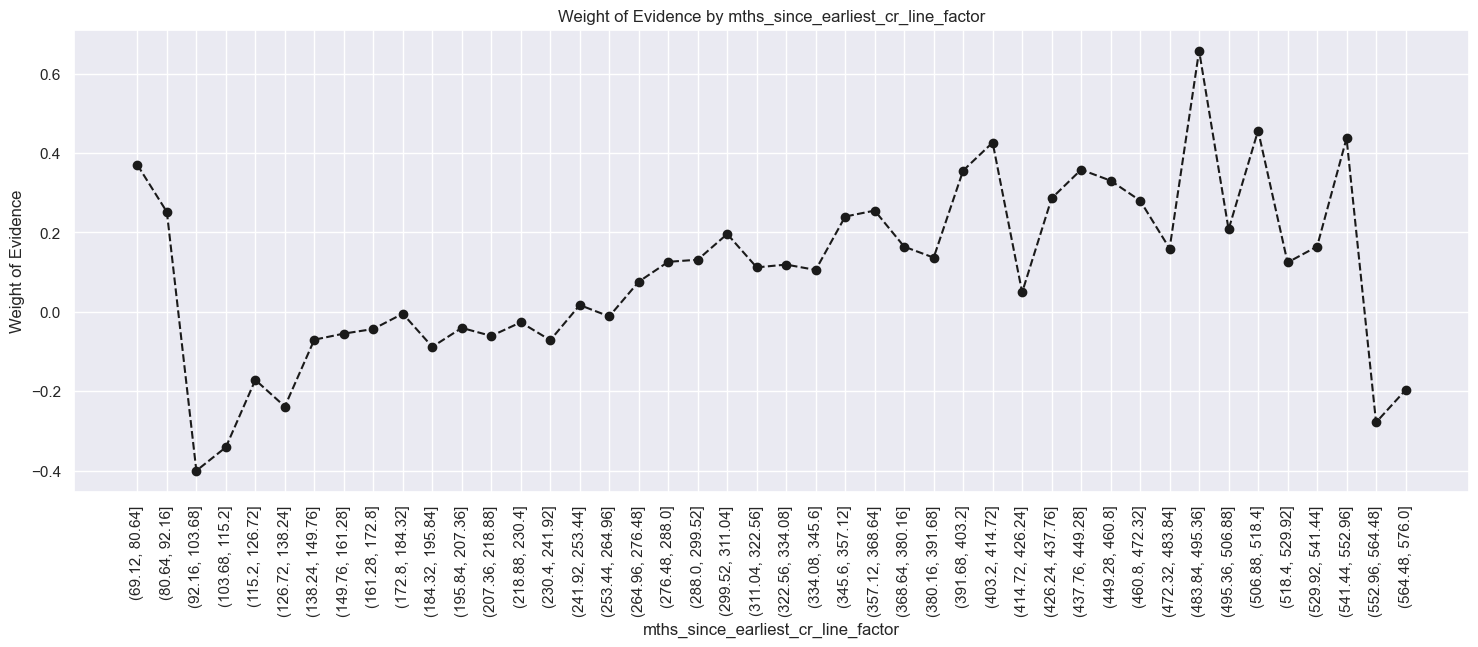

In [112]:
# Exclude the first 6 categories
plot_by_woe(df_temp.iloc[6: , : ], 90)

In [113]:
# Create the following categories: < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

**delinq_2yrs**

In [114]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_temp

delinq_2yrs  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0           0.0  76566   0.892642    0.821021  68346.0  8220.0     0.821318   
1           1.0  11297   0.891299    0.121138  10069.0  1228.0     0.121000   
2           2.0   3192   0.887218    0.034228   2832.0   360.0     0.034032   
3           3.0   1134   0.893298    0.012160   1013.0   121.0     0.012173   
4           4.0    510   0.888235    0.005469    453.0    57.0     0.005444   
5           5.0    270   0.911111    0.002895    246.0    24.0     0.002956   
6           6.0    128   0.859375    0.001373    110.0    18.0     0.001322   
7           7.0     67   0.925373    0.000718     62.0     5.0     0.000745   
8           8.0     29   0.896552    0.000311     26.0     3.0     0.000312   
9           9.0     22   0.954545    0.000236     21.0     1.0     0.000252   
10         10.0      9   0.888889    0.000097      8.0     1.0     0.000096   
11         11.0     10   1.000000    0.000107     10.0     0.0     0.000120   
12         12.0      8   0.625000    0.000086      5.0     3.0     0.000060   
13         13.0      7   0.857143    0.000075      6.0     1.0     0.000072   
14         14.0      2   1.000000    0.000021      2.0     0.0     0.000024   
15         15.0      1   1.000000    0.000011      1.0     0.0     0.000012   
16         16.0      1   1.000000    0.000011      1.0     0.0     0.000012   
17         18.0      3   1.000000    0.000032      3.0     0.0     0.000036   
18         19.0      1   1.000000    0.000011      1.0     0.0     0.000012   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.818562  0.003362             NaN       NaN  inf  
1     0.122286 -0.010577        0.001343  0.013938  inf  
2     0.035849 -0.052017        0.004081  0.041440  inf  
3     0.012049  0.010230        0.006080  0.062247  inf  
4     0.005676 -0.041810        0.005063  0.052040  inf  
5     0.002390  0.212626        0.022876  0.254437  inf  
6     0.001792 -0.304543        0.051736  0.517169  inf  
7     0.000498  0.403045        0.065998  0.707588  inf  
8     0.000299  0.044833        0.028821  0.358212  inf  
9     0.000100  0.929871        0.057994  0.885038  inf  
10    0.000100 -0.035210        0.065657  0.965081  inf  
11    0.000000       inf        0.111111       inf  inf  
12    0.000299 -1.603826        0.375000       inf  inf  
13    0.000100 -0.322892        0.232143  1.280934  inf  
14    0.000000       inf        0.142857       inf  inf  
15    0.000000       inf        0.000000       NaN  inf  
16    0.000000       inf        0.000000       NaN  inf  
17    0.000000       inf        0.000000       NaN  inf  
18    0.000000       inf        0.000000       NaN  inf

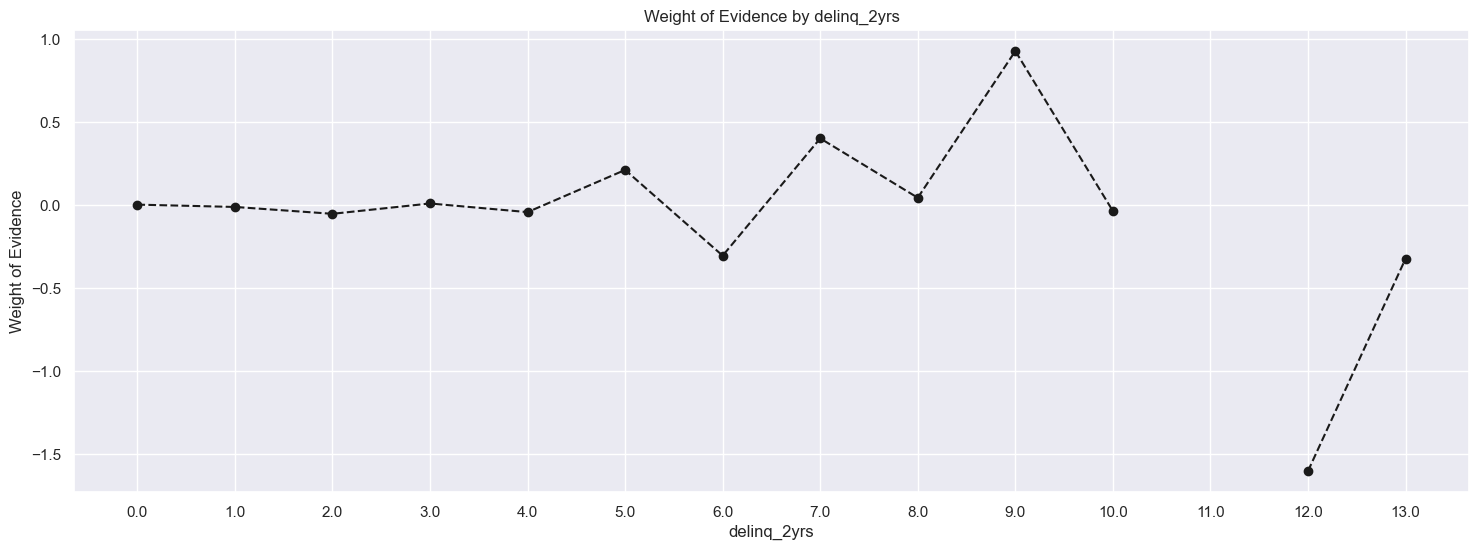

In [115]:
# Plot WoE
plot_by_woe(df_temp)

In [116]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

**inq_last_6mths**

In [117]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp

inq_last_6mths  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0              0.0  48295   0.910260    0.517870  43961.0  4334.0   
1              1.0  25985   0.883009    0.278639  22945.0  3040.0   
2              2.0  11611   0.861941    0.124505  10008.0  1603.0   
3              3.0   5086   0.847621    0.054537   4311.0   775.0   
4              4.0   1431   0.869322    0.015345   1244.0   187.0   
5              5.0    551   0.889292    0.005908    490.0    61.0   
6              6.0    211   0.824645    0.002263    174.0    37.0   
7              7.0     36   0.888889    0.000386     32.0     4.0   
8              8.0     21   0.952381    0.000225     20.0     1.0   
9              9.0      7   1.000000    0.000075      7.0     0.0   
10            10.0      7   1.000000    0.000075      7.0     0.0   
11            11.0      7   1.000000    0.000075      7.0     0.0   
12            12.0      3   1.000000    0.000032      3.0     0.0   
13            13.0      1   1.000000    0.000011      1.0     0.0   
14            14.0      1   1.000000    0.000011      1.0     0.0   
15            18.0      2   1.000000    0.000021      2.0     0.0   
16            19.0      1   1.000000    0.000011      1.0     0.0   
17            24.0      1   1.000000    0.000011      1.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.528282    0.431587  0.202161             NaN       NaN  inf  
1      0.275732    0.302729 -0.093409        0.027250  0.295569  inf  
2      0.120267    0.159630 -0.283143        0.021068  0.189735  inf  
3      0.051806    0.077176 -0.398589        0.014320  0.115446  inf  
4      0.014949    0.018622 -0.219673        0.021701  0.178917  inf  
5      0.005888    0.006074 -0.031120        0.019970  0.188553  inf  
6      0.002091    0.003685 -0.566514        0.064648  0.535394  inf  
7      0.000385    0.000398 -0.035210        0.064244  0.531304  inf  
8      0.000240    0.000100  0.881081        0.063492  0.916291  inf  
9      0.000084    0.000000       inf        0.047619       inf  inf  
10     0.000084    0.000000       inf        0.000000       NaN  inf  
11     0.000084    0.000000       inf        0.000000       NaN  inf  
12     0.000036    0.000000       inf        0.000000       NaN  inf  
13     0.000012    0.000000       inf        0.000000       NaN  inf  
14     0.000012    0.000000       inf        0.000000       NaN  inf  
15     0.000024    0.000000       inf        0.000000       NaN  inf  
16     0.000012    0.000000       inf        0.000000       NaN  inf  
17     0.000012    0.000000       inf        0.000000       NaN  inf

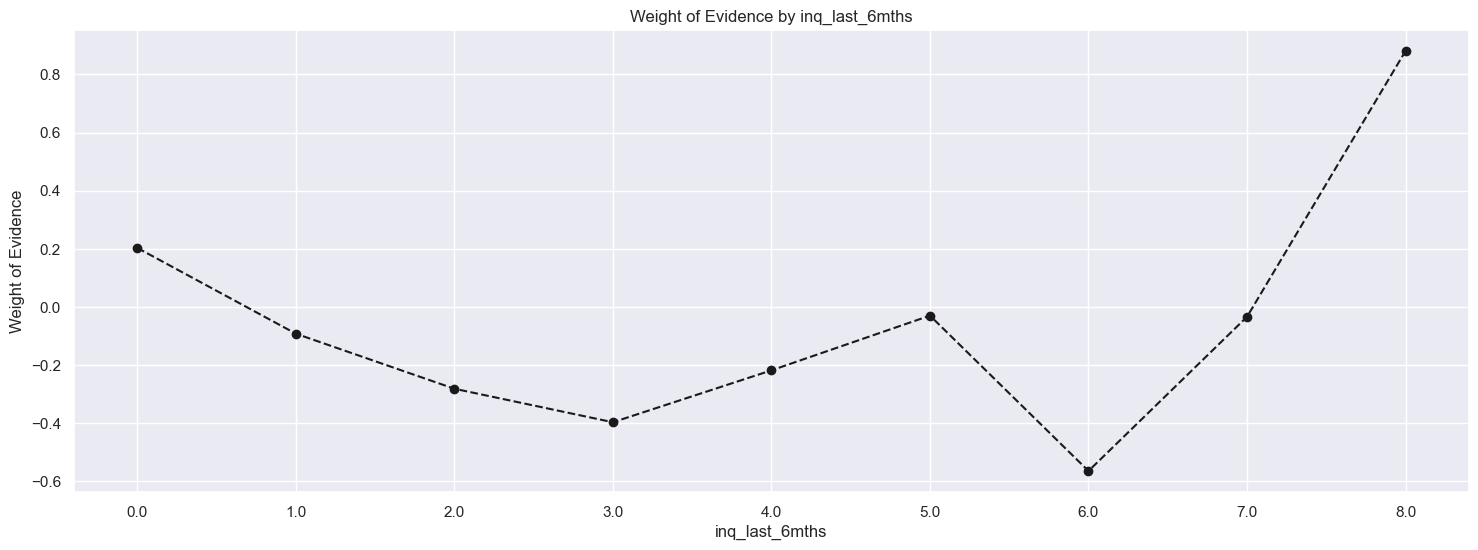

In [118]:
# Plot WoE
plot_by_woe(df_temp)

In [119]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

**open_acc**

In [120]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_temp

open_acc  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0        0.0      7   1.000000    0.000075     7.0    0.0     0.000084   
1        1.0     32   0.937500    0.000343    30.0    2.0     0.000361   
2        2.0    334   0.844311    0.003582   282.0   52.0     0.003389   
3        3.0   1122   0.860071    0.012031   965.0  157.0     0.011596   
4        4.0   2560   0.896484    0.027451  2295.0  265.0     0.027579   
5        5.0   4403   0.893936    0.047214  3936.0  467.0     0.047299   
6        6.0   6216   0.893018    0.066655  5551.0  665.0     0.066707   
7        7.0   7433   0.888470    0.079704  6604.0  829.0     0.079361   
8        8.0   8314   0.894756    0.089151  7439.0  875.0     0.089395   
9        9.0   8768   0.889484    0.094020  7799.0  969.0     0.093721   
10      10.0   8576   0.890858    0.091961  7640.0  936.0     0.091810   
11      11.0   7740   0.895349    0.082996  6930.0  810.0     0.083278   
12      12.0   6886   0.887743    0.073839  6113.0  773.0     0.073460   
13      13.0   5914   0.894657    0.063416  5291.0  623.0     0.063582   
14      14.0   4960   0.896573    0.053186  4447.0  513.0     0.053440   
15      15.0   4006   0.893909    0.042957  3581.0  425.0     0.043033   
16      16.0   3269   0.900581    0.035054  2944.0  325.0     0.035378   
17      17.0   2680   0.888060    0.028738  2380.0  300.0     0.028601   
18      18.0   2259   0.902169    0.024223  2038.0  221.0     0.024491   
19      19.0   1811   0.894533    0.019419  1620.0  191.0     0.019468   
20      20.0   1444   0.899584    0.015484  1299.0  145.0     0.015610   
21      21.0   1037   0.881389    0.011120   914.0  123.0     0.010984   
22      22.0    784   0.887755    0.008407   696.0   88.0     0.008364   
23      23.0    628   0.907643    0.006734   570.0   58.0     0.006850   
24      24.0    473   0.890063    0.005072   421.0   52.0     0.005059   
25      25.0    391   0.882353    0.004193   345.0   46.0     0.004146   
26      26.0    250   0.884000    0.002681   221.0   29.0     0.002656   
27      27.0    204   0.911765    0.002188   186.0   18.0     0.002235   
28      28.0    153   0.895425    0.001641   137.0   16.0     0.001646   
29      29.0    128   0.843750    0.001373   108.0   20.0     0.001298   
30      30.0    107   0.906542    0.001147    97.0   10.0     0.001166   
31      31.0     73   0.904110    0.000783    66.0    7.0     0.000793   
32      32.0     62   0.951613    0.000665    59.0    3.0     0.000709   
33      33.0     47   0.851064    0.000504    40.0    7.0     0.000481   
34      34.0     40   0.850000    0.000429    34.0    6.0     0.000409   
35      35.0     33   0.939394    0.000354    31.0    2.0     0.000373   
36      36.0     22   0.772727    0.000236    17.0    5.0     0.000204   
37      37.0     21   0.857143    0.000225    18.0    3.0     0.000216   
38      38.0     14   0.928571    0.000150    13.0    1.0     0.000156   
39      39.0     12   0.916667    0.000129    11.0    1.0     0.000132   
40      40.0      9   0.555556    0.000097     5.0    4.0     0.000060   
41      41.0      6   1.000000    0.000064     6.0    0.0     0.000072   
42      42.0      7   1.000000    0.000075     7.0    0.0     0.000084   
43      43.0      4   1.000000    0.000043     4.0    0.0     0.000048   
44      45.0      4   1.000000    0.000043     4.0    0.0     0.000048   
45      46.0      2   1.000000    0.000021     2.0    0.0     0.000024   
46      48.0      2   1.000000    0.000021     2.0    0.0     0.000024   
47      49.0      2   1.000000    0.000021     2.0    0.0     0.000024   
48      50.0      1   1.000000    0.000011     1.0    0.0     0.000012   
49      52.0      1   1.000000    0.000011     1.0    0.0     0.000012   
50      53.0      2   1.000000    0.000021     2.0    0.0     0.000024   
51      58.0      3   1.000000    0.000032     3.0    0.0     0.000036   
52      61.0      1   1.000000    0.000011     1.0    0.0     0.000012   

    pro

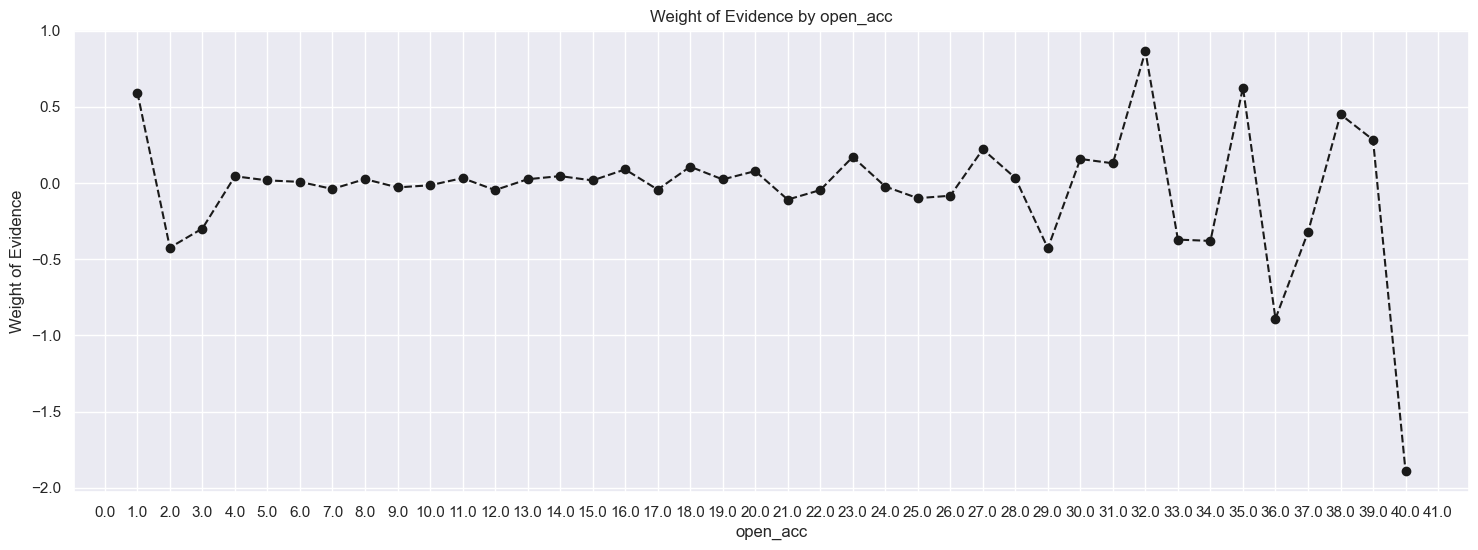

In [121]:
# Plot WoE
plot_by_woe(df_temp)

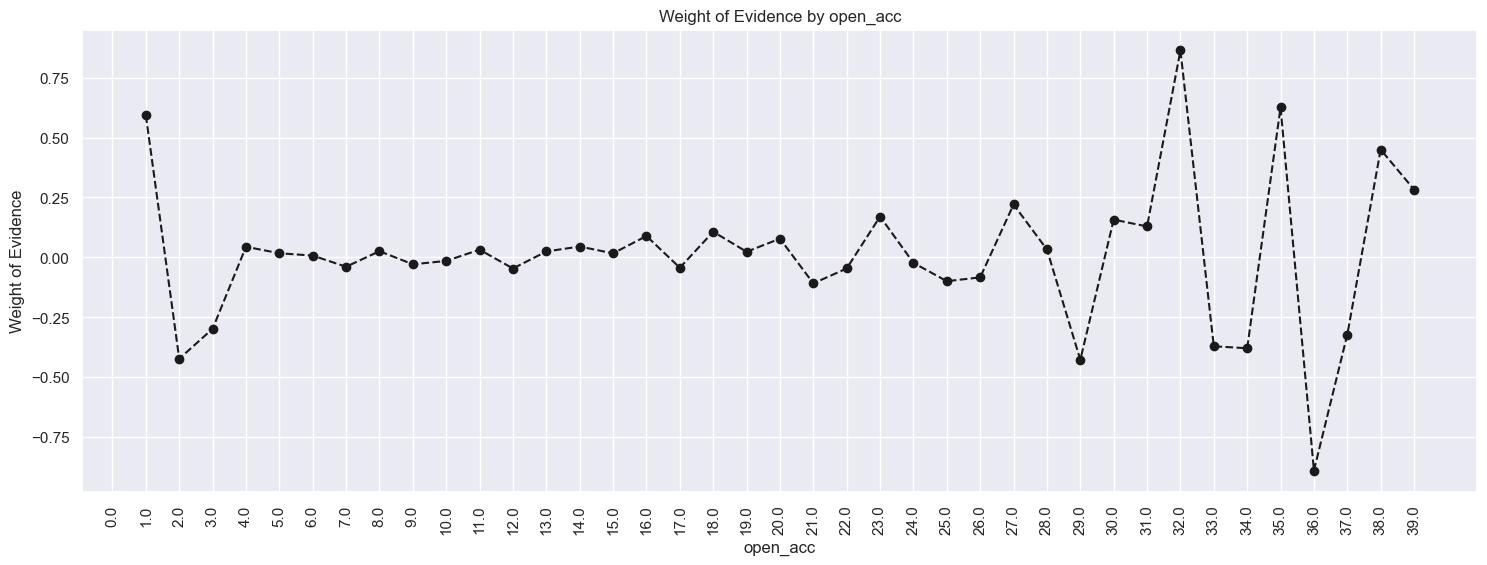

In [122]:
# Show the first 40 categories only
plot_by_woe(df_temp.iloc[ : 40, :], 90)

In [123]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

**pub_rec**

In [124]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp

pub_rec  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0       0.0  80923   0.890810    0.867742  72087.0  8836.0     0.866274   
1       1.0  10670   0.902624    0.114415   9631.0  1039.0     0.115736   
2       2.0   1097   0.904284    0.011763    992.0   105.0     0.011921   
3       3.0    331   0.900302    0.003549    298.0    33.0     0.003581   
4       4.0    112   0.857143    0.001201     96.0    16.0     0.001154   
5       5.0     73   0.904110    0.000783     66.0     7.0     0.000793   
6       6.0     19   0.894737    0.000204     17.0     2.0     0.000204   
7       7.0     14   0.785714    0.000150     11.0     3.0     0.000132   
8       8.0      5   0.800000    0.000054      4.0     1.0     0.000048   
9       9.0      2   1.000000    0.000021      2.0     0.0     0.000024   
10     10.0      3   1.000000    0.000032      3.0     0.0     0.000036   
11     11.0      5   1.000000    0.000054      5.0     0.0     0.000060   
12     12.0      1   1.000000    0.000011      1.0     0.0     0.000012   
13     14.0      1   1.000000    0.000011      1.0     0.0     0.000012   
14     49.0      1   1.000000    0.000011      1.0     0.0     0.000012   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.879904 -0.015612             NaN       NaN  inf  
1     0.103465  0.112077        0.011814  0.127689  inf  
2     0.010456  0.131111        0.001660  0.019034  inf  
3     0.003286  0.085935        0.003982  0.045177  inf  
4     0.001593 -0.322892        0.043159  0.408826  inf  
5     0.000697  0.129093        0.046967  0.451985  inf  
6     0.000199  0.025415        0.009373  0.103678  inf  
7     0.000299 -0.815368        0.109023  0.840783  inf  
8     0.000100 -0.728357        0.014286  0.087011  inf  
9     0.000000       inf        0.200000       inf  inf  
10    0.000000       inf        0.000000       NaN  inf  
11    0.000000       inf        0.000000       NaN  inf  
12    0.000000       inf        0.000000       NaN  inf  
13    0.000000       inf        0.000000       NaN  inf  
14    0.000000       inf        0.000000       NaN  inf

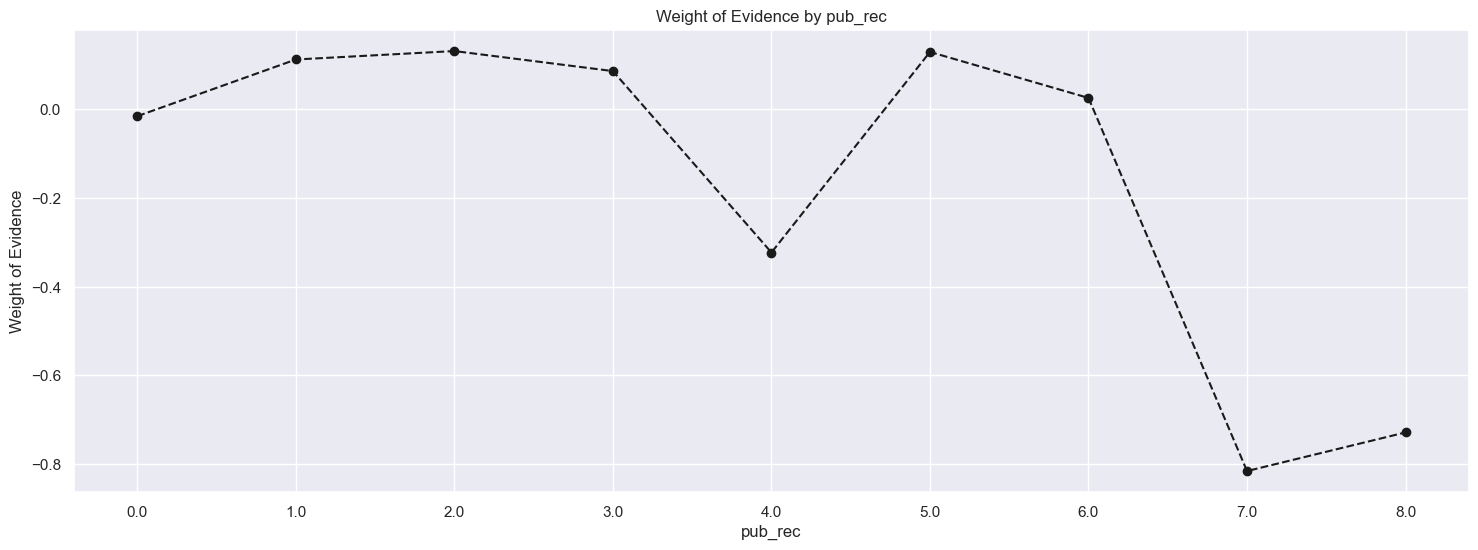

In [125]:
# Plot WoE
plot_by_woe(df_temp)

In [126]:
# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

**total_acc**

In [127]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_temp

total_acc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0     (-0.156, 3.12]    125   0.816000    0.001340    102.0    23.0   
1       (3.12, 6.24]   1499   0.859907    0.016074   1289.0   210.0   
2       (6.24, 9.36]   3715   0.874024    0.039836   3247.0   468.0   
3      (9.36, 12.48]   6288   0.877067    0.067427   5515.0   773.0   
4      (12.48, 15.6]   8289   0.889733    0.088883   7375.0   914.0   
5      (15.6, 18.72]   9843   0.891496    0.105547   8775.0  1068.0   
6     (18.72, 21.84]  10270   0.894937    0.110126   9191.0  1079.0   
7     (21.84, 24.96]   9971   0.894494    0.106920   8919.0  1052.0   
8     (24.96, 28.08]  11873   0.893793    0.127315  10612.0  1261.0   
9      (28.08, 31.2]   7289   0.893127    0.078160   6510.0   779.0   
10     (31.2, 34.32]   6151   0.903593    0.065958   5558.0   593.0   
11    (34.32, 37.44]   4745   0.906849    0.050881   4303.0   442.0   
12    (37.44, 40.56]   3615   0.899032    0.038764   3250.0   365.0   
13    (40.56, 43.68]   2883   0.892126    0.030915   2572.0   311.0   
14     (43.68, 46.8]   1938   0.891641    0.020781   1728.0   210.0   
15     (46.8, 49.92]   1478   0.906631    0.015849   1340.0   138.0   
16    (49.92, 53.04]   1309   0.903743    0.014036   1183.0   126.0   
17    (53.04, 56.16]    640   0.893750    0.006863    572.0    68.0   
18    (56.16, 59.28]    428   0.876168    0.004589    375.0    53.0   
19     (59.28, 62.4]    386   0.880829    0.004139    340.0    46.0   
20     (62.4, 65.52]    322   0.854037    0.003453    275.0    47.0   
21    (65.52, 68.64]     57   0.947368    0.000611     54.0     3.0   
22    (68.64, 71.76]     43   0.906977    0.000461     39.0     4.0   
23    (71.76, 74.88]     24   1.000000    0.000257     24.0     0.0   
24     (74.88, 78.0]     26   0.923077    0.000279     24.0     2.0   
25     (78.0, 81.12]     13   0.769231    0.000139     10.0     3.0   
26    (81.12, 84.24]     11   0.909091    0.000118     10.0     1.0   
27    (84.24, 87.36]      8   0.875000    0.000086      7.0     1.0   
28    (87.36, 90.48]      6   0.833333    0.000064      5.0     1.0   
29     (90.48, 93.6]      7   0.857143    0.000075      6.0     1.0   
30     (93.6, 96.72]      1   1.000000    0.000011      1.0     0.0   
31    (96.72, 99.84]      3   1.000000    0.000032      3.0     0.0   
32   (99.84, 102.96]      0        NaN    0.000000      NaN     NaN   
33  (102.96, 106.08]      0        NaN    0.000000      NaN     NaN   
34   (106.08, 109.2]      0        NaN    0.000000      NaN     NaN   
35   (109.2, 112.32]      0        NaN    0.000000      NaN     NaN   
36  (112.32, 115.44]      0        NaN    0.000000      NaN     NaN   
37  (115.44, 118.56]      0        NaN    0.000000      NaN     NaN   
38  (118.56, 121.68]      0        NaN    0.000000      NaN     NaN   
39   (121.68, 124.8]      0        NaN    0.000000      NaN     NaN   
40   (124.8, 127.92]      0        NaN    0.000000      NaN     NaN   
41  (127.92, 131.04]      0        NaN    0.000000      NaN     NaN   
42  (131.04, 134.16]      0        NaN    0.000000      NaN     NaN   
43  (134.16, 137.28]      0        NaN    0.000000      NaN     NaN   
44   (137.28, 140.4]      0        NaN    0.000000      NaN     NaN   
45   (140.4, 143.52]      0        NaN    0.000000      NaN     NaN   
46  (143.52, 146.64]      0        NaN    0.000000      NaN     NaN   
47  (146.64, 149.76]      0        NaN    0.000000      NaN     NaN   
48  (149.76, 152.88]      0        NaN    0.000000      NaN     NaN   
49   (152.88, 156.0]      1   1.000000    0.000011      1.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.001226    0.002290 -0.625173             NaN       NaN  inf  
1      0.015490    0.020912 -0.300137        0.043907  0.325036  inf  
2      0.039019    0.046604 -0.177633        0.014118  0.122504  inf  
3      0.066274    0.076977 -0.149703        0.003043  0.027929  inf  
4      0.088626    0.091018

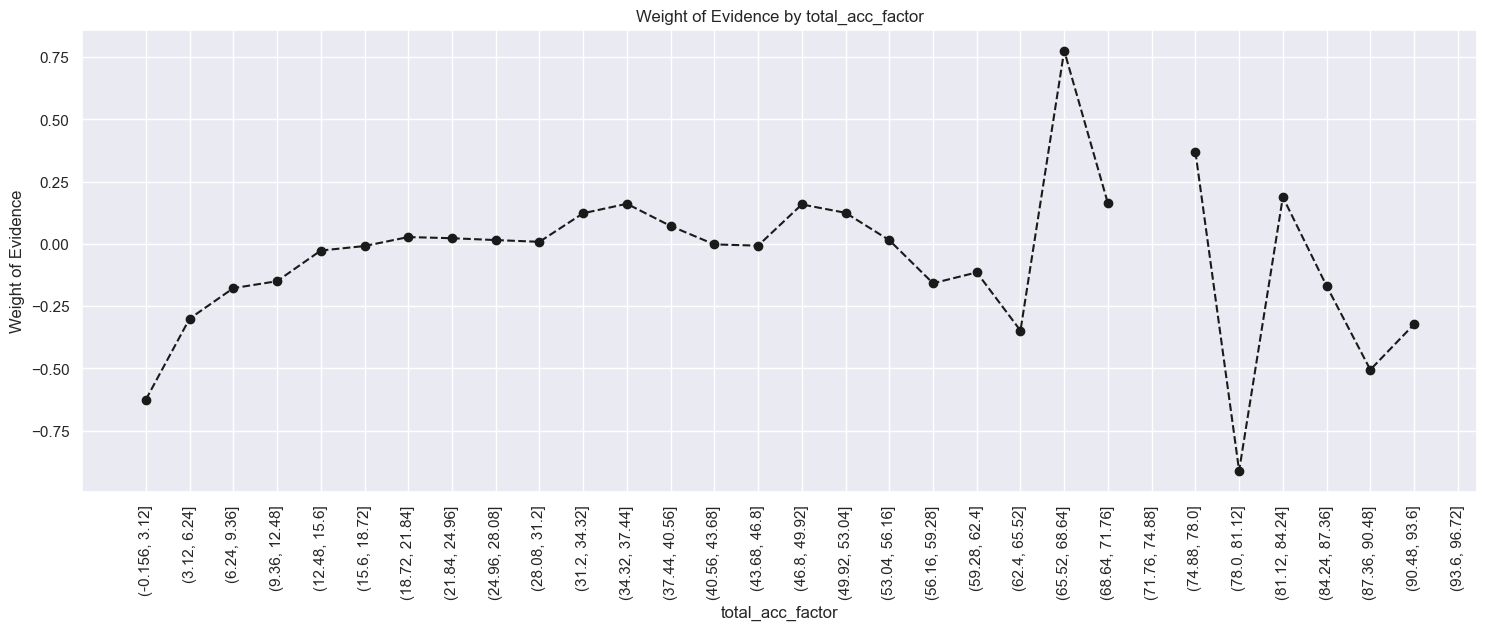

In [128]:
# Plot WoE
plot_by_woe(df_temp, 90)

In [129]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

**acc_now_delinq**

In [130]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp

acc_now_delinq  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0             0.0  92871   0.892421    0.995861  82880.0  9991.0     0.995974   
1             1.0    360   0.872222    0.003860    314.0    46.0     0.003773   
2             2.0     22   0.818182    0.000236     18.0     4.0     0.000216   
3             3.0      4   0.750000    0.000043      3.0     1.0     0.000036   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.994921  0.001058             NaN       NaN  0.000333  
1    0.004581 -0.193900        0.020198  0.194958  0.000333  
2    0.000398 -0.610574        0.054040  0.416674  0.000333  
3    0.000100 -1.016039        0.068182  0.405465  0.000333

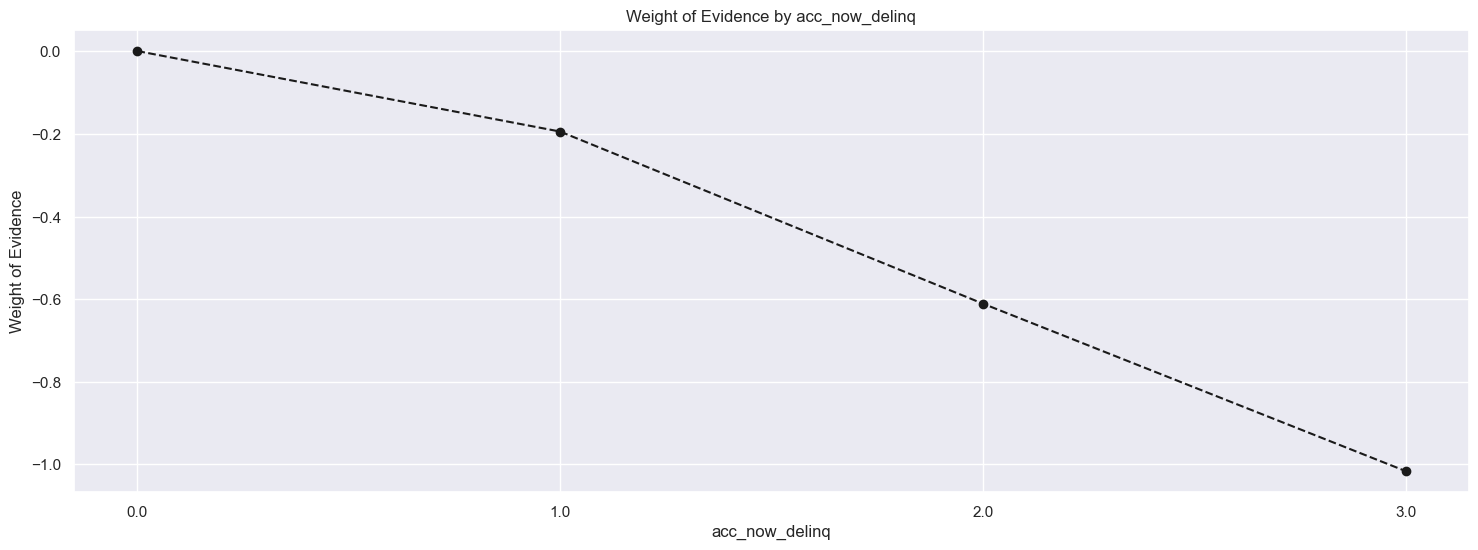

In [131]:
# Plot WoE
plot_by_woe(df_temp)

In [132]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

**total_rev_hi_lim**

In [133]:
# Perform fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_temp

C:\Users\My Pham\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


total_rev_hi_lim_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0          (-2013.133, 1006.566]    238   0.848739    0.002552   202.0   36.0   
1           (1006.566, 2013.133]    678   0.834808    0.007270   566.0  112.0   
2             (2013.133, 3019.7]   1121   0.857270    0.012021   961.0  160.0   
3             (3019.7, 4026.266]   1461   0.883641    0.015666  1291.0  170.0   
4           (4026.266, 5032.832]   2163   0.878410    0.023194  1900.0  263.0   
...                          ...    ...        ...         ...     ...    ...   
1995  (2008100.168, 2009106.734]      0        NaN    0.000000     NaN    NaN   
1996  (2009106.734, 2010113.301]      0        NaN    0.000000     NaN    NaN   
1997  (2010113.301, 2011119.867]      0        NaN    0.000000     NaN    NaN   
1998  (2011119.867, 2012126.434]      0        NaN    0.000000     NaN    NaN   
1999    (2012126.434, 2013133.0]      1   1.000000    0.000011     1.0    0.0   

      prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0        0.002427    0.003585 -0.389903             NaN       NaN  inf  
1        0.006802    0.011153 -0.494556        0.013931  0.104654  inf  
2        0.011548    0.015933 -0.321851        0.022462  0.172705  inf  
3        0.015514    0.016929 -0.087277        0.026371  0.234573  inf  
4        0.022832    0.026190 -0.137196        0.005232  0.049919  inf  
...           ...         ...       ...             ...       ...  ...  
1995          NaN         NaN       NaN             NaN       NaN  inf  
1996          NaN         NaN       NaN             NaN       NaN  inf  
1997          NaN         NaN       NaN             NaN       NaN  inf  
1998          NaN         NaN       NaN             NaN       NaN  inf  
1999     0.000012    0.000000       inf             NaN       NaN  inf  

[2000 rows x 12 columns]

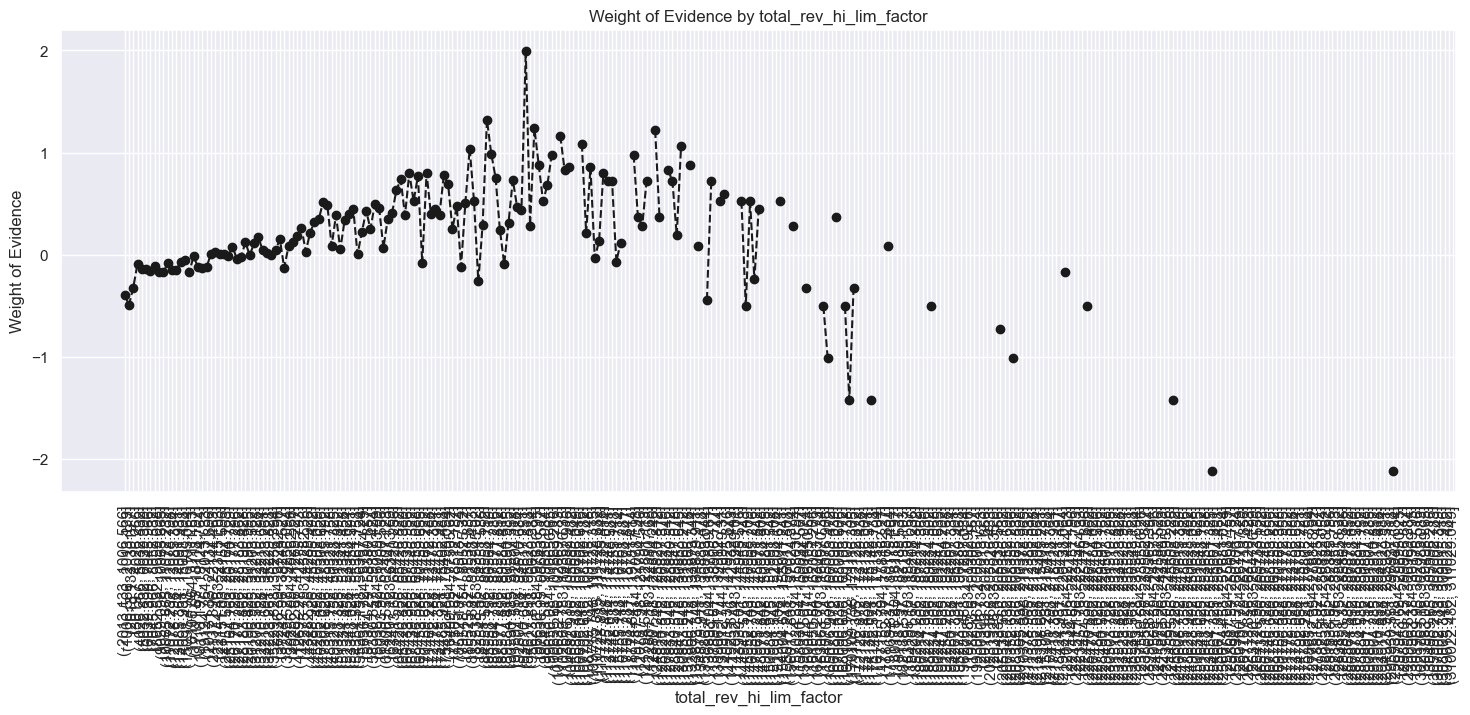

In [134]:
# Plot WoE
plot_by_woe(df_temp, 90)

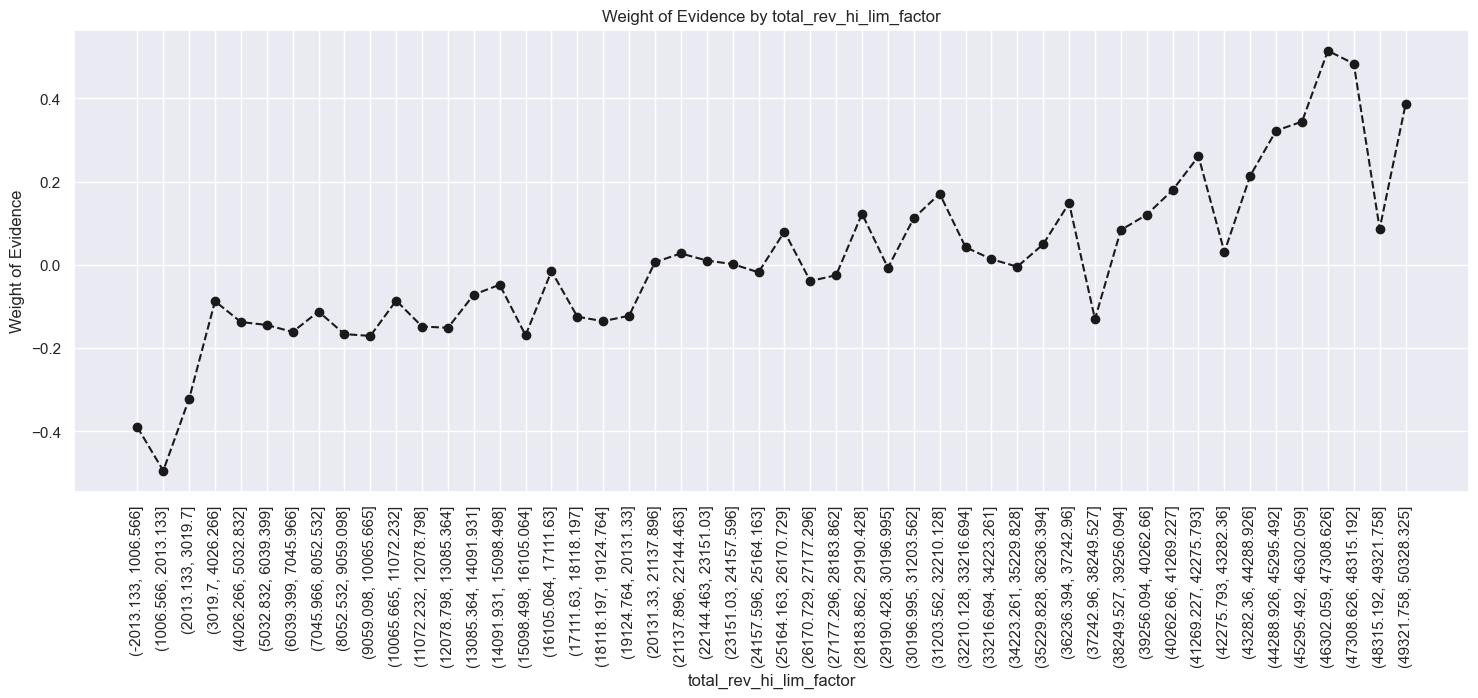

In [135]:
# Show the first 50 categories only
plot_by_woe(df_temp.iloc[: 50, : ], 90)

In [136]:
# Categories: '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

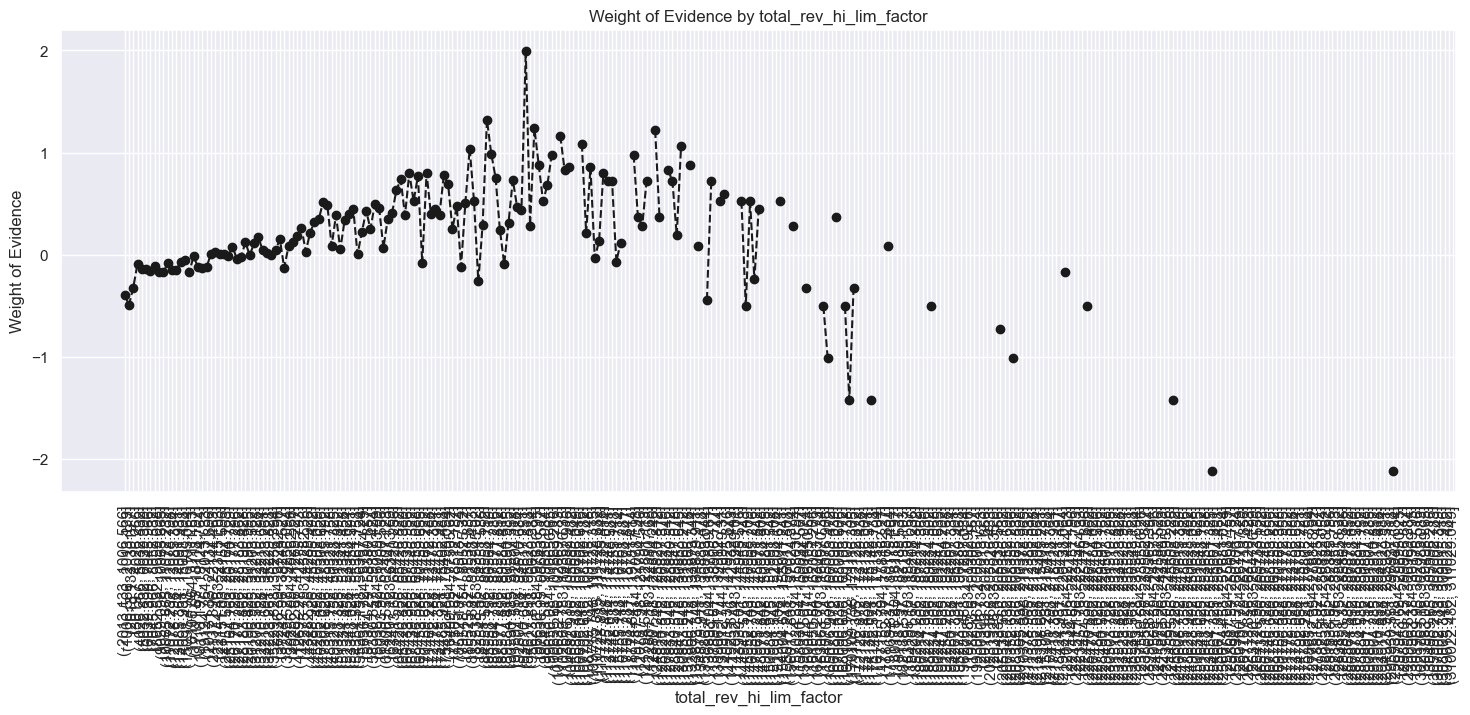

In [137]:
# Plot WoE
plot_by_woe(df_temp, 90)

**installment**

In [138]:
# Perform fine-classing: using the 'cut' method, we split the variable into 50 categories by its values
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_temp

installment_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0      (14.369, 43.585]    485   0.880412    0.005201   427.0   58.0   
1       (43.585, 71.41]   1246   0.906902    0.013361  1130.0  116.0   
2       (71.41, 99.235]   1731   0.898325    0.018562  1555.0  176.0   
3      (99.235, 127.06]   2292   0.899651    0.024577  2062.0  230.0   
4     (127.06, 154.885]   2602   0.890085    0.027901  2316.0  286.0   
5     (154.885, 182.71]   4133   0.902492    0.044318  3730.0  403.0   
6     (182.71, 210.535]   4109   0.907033    0.044061  3727.0  382.0   
7     (210.535, 238.36]   3730   0.902949    0.039997  3368.0  362.0   
8     (238.36, 266.185]   4660   0.903219    0.049969  4209.0  451.0   
9     (266.185, 294.01]   4975   0.890050    0.053347  4428.0  547.0   
10    (294.01, 321.835]   5186   0.907636    0.055610  4707.0  479.0   
11    (321.835, 349.66]   6432   0.893812    0.068971  5749.0  683.0   
12    (349.66, 377.485]   4758   0.883144    0.051020  4202.0  556.0   
13    (377.485, 405.31]   4352   0.901195    0.046667  3922.0  430.0   
14    (405.31, 433.135]   3429   0.883348    0.036769  3029.0  400.0   
15    (433.135, 460.96]   3225   0.880000    0.034582  2838.0  387.0   
16    (460.96, 488.785]   3865   0.895472    0.041445  3461.0  404.0   
17    (488.785, 516.61]   3861   0.885004    0.041402  3417.0  444.0   
18    (516.61, 544.435]   2730   0.871062    0.029274  2378.0  352.0   
19    (544.435, 572.26]   2564   0.878315    0.027494  2252.0  312.0   
20    (572.26, 600.085]   2434   0.873870    0.026100  2127.0  307.0   
21    (600.085, 627.91]   2294   0.902354    0.024599  2070.0  224.0   
22    (627.91, 655.735]   2091   0.901961    0.022422  1886.0  205.0   
23    (655.735, 683.56]   2295   0.895861    0.024609  2056.0  239.0   
24    (683.56, 711.385]   1650   0.878788    0.017693  1450.0  200.0   
25    (711.385, 739.21]   1252   0.892173    0.013425  1117.0  135.0   
26    (739.21, 767.035]   1360   0.898529    0.014583  1222.0  138.0   
27    (767.035, 794.86]   1160   0.887931    0.012439  1030.0  130.0   
28    (794.86, 822.685]   1023   0.890518    0.010970   911.0  112.0   
29    (822.685, 850.51]    967   0.887280    0.010369   858.0  109.0   
30    (850.51, 878.335]   1046   0.897706    0.011216   939.0  107.0   
31    (878.335, 906.16]    707   0.862801    0.007581   610.0   97.0   
32    (906.16, 933.985]    604   0.857616    0.006477   518.0   86.0   
33    (933.985, 961.81]    635   0.861417    0.006809   547.0   88.0   
34    (961.81, 989.635]    460   0.850000    0.004933   391.0   69.0   
35   (989.635, 1017.46]    441   0.854875    0.004729   377.0   64.0   
36  (1017.46, 1045.285]    305   0.875410    0.003271   267.0   38.0   
37  (1045.285, 1073.11]    206   0.878641    0.002209   181.0   25.0   
38  (1073.11, 1100.935]    228   0.894737    0.002445   204.0   24.0   
39  (1100.935, 1128.76]    247   0.931174    0.002649   230.0   17.0   
40  (1128.76, 1156.585]    227   0.916300    0.002434   208.0   19.0   
41  (1156.585, 1184.41]    287   0.895470    0.003078   257.0   30.0   
42  (1184.41, 1212.235]    308   0.905844    0.003303   279.0   29.0   
43  (1212.235, 1240.06]    284   0.901408    0.003045   256.0   28.0   
44  (1240.06, 1267.885]    159   0.861635    0.001705   137.0   22.0   
45  (1267.885, 1295.71]    132   0.833333    0.001415   110.0   22.0   
46  (1295.71, 1323.535]     47   0.787234    0.000504    37.0   10.0   
47  (1323.535, 1351.36]     21   0.714286    0.000225    15.0    6.0   
48  (1351.36, 1379.185]     15   0.733333    0.000161    11.0    4.0   
49  (1379.185, 1407.01]      7   1.000000    0.000075     7.0    0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.005131    0.005776 -0.118310             NaN       NaN  inf  
1      0.013579    0.011551  0.161731        0.026490  0.280042  inf  
2      0.018687    0.017526  0.064096        0.008577  0.097636  inf  
3      0.024779    0.022904  0.078701        0.0

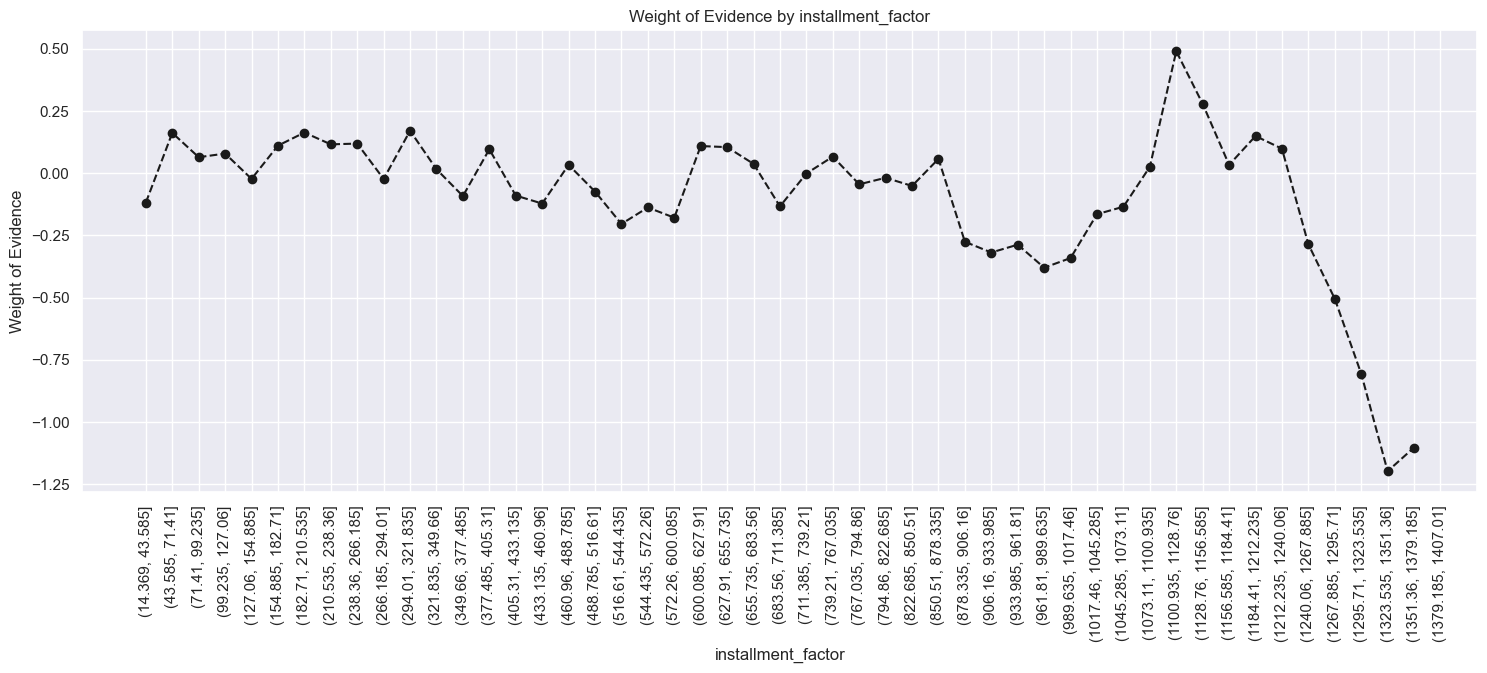

In [139]:
# Plot WoE
plot_by_woe(df_temp, 90)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3

**annual_inc**

In [140]:
# Perform fine-classing for annual_inc: using the 'cut' method, we split the variable into 50 categories by its values
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (-2695.2, 154704.0]  89203   0.890598    0.956529  79444.0  9759.0   
1     (154704.0, 304608.0]   3626   0.929123    0.038882   3369.0   257.0   
2     (304608.0, 454512.0]    282   0.929078    0.003024    262.0    20.0   
3     (454512.0, 604416.0]     86   0.965116    0.000922     83.0     3.0   
4     (604416.0, 754320.0]     23   0.956522    0.000247     22.0     1.0   
5     (754320.0, 904224.0]     18   0.944444    0.000193     17.0     1.0   
6    (904224.0, 1054128.0]      7   1.000000    0.000075      7.0     0.0   
7   (1054128.0, 1204032.0]      6   1.000000    0.000064      6.0     0.0   
8   (1204032.0, 1353936.0]      2   0.500000    0.000021      1.0     1.0   
9   (1353936.0, 1503840.0]      2   1.000000    0.000021      2.0     0.0   
10  (1503840.0, 1653744.0]      0        NaN    0.000000      NaN     NaN   
11  (1653744.0, 1803648.0]      0        NaN    0.000000      NaN     NaN   
12  (1803648.0, 1953552.0]      0        NaN    0.000000      NaN     NaN   
13  (1953552.0, 2103456.0]      0        NaN    0.000000      NaN     NaN   
14  (2103456.0, 2253360.0]      0        NaN    0.000000      NaN     NaN   
15  (2253360.0, 2403264.0]      0        NaN    0.000000      NaN     NaN   
16  (2403264.0, 2553168.0]      0        NaN    0.000000      NaN     NaN   
17  (2553168.0, 2703072.0]      0        NaN    0.000000      NaN     NaN   
18  (2703072.0, 2852976.0]      0        NaN    0.000000      NaN     NaN   
19  (2852976.0, 3002880.0]      0        NaN    0.000000      NaN     NaN   
20  (3002880.0, 3152784.0]      0        NaN    0.000000      NaN     NaN   
21  (3152784.0, 3302688.0]      0        NaN    0.000000      NaN     NaN   
22  (3302688.0, 3452592.0]      0        NaN    0.000000      NaN     NaN   
23  (3452592.0, 3602496.0]      0        NaN    0.000000      NaN     NaN   
24  (3602496.0, 3752400.0]      0        NaN    0.000000      NaN     NaN   
25  (3752400.0, 3902304.0]      0        NaN    0.000000      NaN     NaN   
26  (3902304.0, 4052208.0]      0        NaN    0.000000      NaN     NaN   
27  (4052208.0, 4202112.0]      0        NaN    0.000000      NaN     NaN   
28  (4202112.0, 4352016.0]      0        NaN    0.000000      NaN     NaN   
29  (4352016.0, 4501920.0]      0        NaN    0.000000      NaN     NaN   
30  (4501920.0, 4651824.0]      0        NaN    0.000000      NaN     NaN   
31  (4651824.0, 4801728.0]      0        NaN    0.000000      NaN     NaN   
32  (4801728.0, 4951632.0]      0        NaN    0.000000      NaN     NaN   
33  (4951632.0, 5101536.0]      0        NaN    0.000000      NaN     NaN   
34  (5101536.0, 5251440.0]      0        NaN    0.000000      NaN     NaN   
35  (5251440.0, 5401344.0]      0        NaN    0.000000      NaN     NaN   
36  (5401344.0, 5551248.0]      0        NaN    0.000000      NaN     NaN   
37  (5551248.0, 5701152.0]      0        NaN    0.000000      NaN     NaN   
38  (5701152.0, 5851056.0]      0        NaN    0.000000      NaN     NaN   
39  (5851056.0, 6000960.0]      0        NaN    0.000000      NaN     NaN   
40  (6000960.0, 6150864.0]      0        NaN    0.000000      NaN     NaN   
41  (6150864.0, 6300768.0]      0        NaN    0.000000      NaN     NaN   
42  (6300768.0, 6450672.0]      0        NaN    0.000000      NaN     NaN   
43  (6450672.0, 6600576.0]      0        NaN    0.000000      NaN     NaN   
44  (6600576.0, 6750480.0]      0        NaN    0.000000      NaN     NaN   
45  (6750480.0, 6900384.0]      0        NaN    0.000000      NaN     NaN   
46  (6900384.0, 7050288.0]      0        NaN    0.000000      NaN     NaN   
47  (7050288.0, 7200192.0]      0        NaN    0.000000      NaN     NaN   
48  (7200192.0, 7350096.0]      0        NaN    0.000000      NaN     NaN   
49  (7350096.0, 7500000.0]      2   1.000000    0.000021      2.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.9

The first category accounts for 94%, so 50 categories may not be enough. Let's try 100 categories.

In [141]:
# Perform fine-classing: using the 'cut' method, we split the variable into 100 categories by its values
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0       (-2695.2, 79752.0]  62621   0.879673    0.671488  55086.0  7535.0   
1      (79752.0, 154704.0]  26582   0.916334    0.285040  24358.0  2224.0   
2     (154704.0, 229656.0]   2916   0.928669    0.031268   2708.0   208.0   
3     (229656.0, 304608.0]    710   0.930986    0.007613    661.0    49.0   
4     (304608.0, 379560.0]    171   0.929825    0.001834    159.0    12.0   
5     (379560.0, 454512.0]    111   0.927928    0.001190    103.0     8.0   
6     (454512.0, 529464.0]     53   0.962264    0.000568     51.0     2.0   
7     (529464.0, 604416.0]     33   0.969697    0.000354     32.0     1.0   
8     (604416.0, 679368.0]     10   1.000000    0.000107     10.0     0.0   
9     (679368.0, 754320.0]     13   0.923077    0.000139     12.0     1.0   
10    (754320.0, 829272.0]      5   1.000000    0.000054      5.0     0.0   
11    (829272.0, 904224.0]     13   0.923077    0.000139     12.0     1.0   
12    (904224.0, 979176.0]      3   1.000000    0.000032      3.0     0.0   
13   (979176.0, 1054128.0]      4   1.000000    0.000043      4.0     0.0   
14  (1054128.0, 1129080.0]      3   1.000000    0.000032      3.0     0.0   
15  (1129080.0, 1204032.0]      3   1.000000    0.000032      3.0     0.0   
16  (1204032.0, 1278984.0]      2   0.500000    0.000021      1.0     1.0   
17  (1278984.0, 1353936.0]      0        NaN    0.000000      NaN     NaN   
18  (1353936.0, 1428888.0]      0        NaN    0.000000      NaN     NaN   
19  (1428888.0, 1503840.0]      2   1.000000    0.000021      2.0     0.0   
20  (1503840.0, 1578792.0]      0        NaN    0.000000      NaN     NaN   
21  (1578792.0, 1653744.0]      0        NaN    0.000000      NaN     NaN   
22  (1653744.0, 1728696.0]      0        NaN    0.000000      NaN     NaN   
23  (1728696.0, 1803648.0]      0        NaN    0.000000      NaN     NaN   
24  (1803648.0, 1878600.0]      0        NaN    0.000000      NaN     NaN   
25  (1878600.0, 1953552.0]      0        NaN    0.000000      NaN     NaN   
26  (1953552.0, 2028504.0]      0        NaN    0.000000      NaN     NaN   
27  (2028504.0, 2103456.0]      0        NaN    0.000000      NaN     NaN   
28  (2103456.0, 2178408.0]      0        NaN    0.000000      NaN     NaN   
29  (2178408.0, 2253360.0]      0        NaN    0.000000      NaN     NaN   
30  (2253360.0, 2328312.0]      0        NaN    0.000000      NaN     NaN   
31  (2328312.0, 2403264.0]      0        NaN    0.000000      NaN     NaN   
32  (2403264.0, 2478216.0]      0        NaN    0.000000      NaN     NaN   
33  (2478216.0, 2553168.0]      0        NaN    0.000000      NaN     NaN   
34  (2553168.0, 2628120.0]      0        NaN    0.000000      NaN     NaN   
35  (2628120.0, 2703072.0]      0        NaN    0.000000      NaN     NaN   
36  (2703072.0, 2778024.0]      0        NaN    0.000000      NaN     NaN   
37  (2778024.0, 2852976.0]      0        NaN    0.000000      NaN     NaN   
38  (2852976.0, 2927928.0]      0        NaN    0.000000      NaN     NaN   
39  (2927928.0, 3002880.0]      0        NaN    0.000000      NaN     NaN   
40  (3002880.0, 3077832.0]      0        NaN    0.000000      NaN     NaN   
41  (3077832.0, 3152784.0]      0        NaN    0.000000      NaN     NaN   
42  (3152784.0, 3227736.0]      0        NaN    0.000000      NaN     NaN   
43  (3227736.0, 3302688.0]      0        NaN    0.000000      NaN     NaN   
44  (3302688.0, 3377640.0]      0        NaN    0.000000      NaN     NaN   
45  (3377640.0, 3452592.0]      0        NaN    0.000000      NaN     NaN   
46  (3452592.0, 3527544.0]      0        NaN    0.000000      NaN     NaN   
47  (3527544.0, 3602496.0]      0        NaN    0.000000      NaN     NaN   
48  (3602496.0, 3677448.0]      0        NaN    0.000000      NaN     NaN   
49  (3677448.0, 3752400.0]      0        NaN    0.000000      NaN     NaN   
50  (3752400.0, 3827352.0]      0        NaN    0.000000      NaN     NaN   
51  (

Initial examination shows that there are too few individuals with large income and too many with small income. Hence, we are going to have one category for more than 150K, and we are going to apply our approach to determine the categories of everyone with 140k or less.

In [142]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]
#loan_data_temp = loan_data_temp.reset_index(drop = True)
#df_inputs_prepr_temp

In [143]:
# Perform fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\Users\My Pham\AppData\Local\Temp\ipykernel_16936\2140945157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)


annual_inc_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (4664.8, 7504.0]     10   1.000000    0.000114    10.0    0.0   
1      (7504.0, 10208.0]     84   0.773810    0.000958    65.0   19.0   
2     (10208.0, 12912.0]    123   0.788618    0.001403    97.0   26.0   
3     (12912.0, 15616.0]    304   0.861842    0.003467   262.0   42.0   
4     (15616.0, 18320.0]    383   0.830287    0.004368   318.0   65.0   
5     (18320.0, 21024.0]    733   0.847203    0.008359   621.0  112.0   
6     (21024.0, 23728.0]    704   0.849432    0.008028   598.0  106.0   
7     (23728.0, 26432.0]   1785   0.863866    0.020356  1542.0  243.0   
8     (26432.0, 29136.0]   1355   0.853875    0.015452  1157.0  198.0   
9     (29136.0, 31840.0]   2292   0.858202    0.026137  1967.0  325.0   
10    (31840.0, 34544.0]   2130   0.856808    0.024290  1825.0  305.0   
11    (34544.0, 37248.0]   3525   0.855319    0.040198  3015.0  510.0   
12    (37248.0, 39952.0]   1926   0.881620    0.021963  1698.0  228.0   
13    (39952.0, 42656.0]   4973   0.868289    0.056710  4318.0  655.0   
14    (42656.0, 45360.0]   4038   0.877662    0.046048  3544.0  494.0   
15    (45360.0, 48064.0]   3015   0.883914    0.034382  2665.0  350.0   
16    (48064.0, 50768.0]   4397   0.879918    0.050142  3869.0  528.0   
17    (50768.0, 53472.0]   2898   0.886473    0.033048  2569.0  329.0   
18    (53472.0, 56176.0]   4143   0.874728    0.047245  3624.0  519.0   
19    (56176.0, 58880.0]   1810   0.884530    0.020641  1601.0  209.0   
20    (58880.0, 61584.0]   4726   0.882565    0.053894  4171.0  555.0   
21    (61584.0, 64288.0]   2246   0.896260    0.025613  2013.0  233.0   
22    (64288.0, 66992.0]   3455   0.897250    0.039400  3100.0  355.0   
23    (66992.0, 69696.0]   1965   0.909415    0.022408  1787.0  178.0   
24    (69696.0, 72400.0]   4096   0.901611    0.046709  3693.0  403.0   
25    (72400.0, 75104.0]   3495   0.898999    0.039856  3142.0  353.0   
26    (75104.0, 77808.0]    967   0.915202    0.011027   885.0   82.0   
27    (77808.0, 80512.0]   3571   0.903108    0.040723  3225.0  346.0   
28    (80512.0, 83216.0]   1319   0.925701    0.015041  1221.0   98.0   
29    (83216.0, 85920.0]   2274   0.900176    0.025932  2047.0  227.0   
30    (85920.0, 88624.0]   1144   0.905594    0.013046  1036.0  108.0   
31    (88624.0, 91328.0]   2425   0.925361    0.027654  2244.0  181.0   
32    (91328.0, 94032.0]   1141   0.913234    0.013012  1042.0   99.0   
33    (94032.0, 96736.0]   1562   0.914213    0.017813  1428.0  134.0   
34    (96736.0, 99440.0]    916   0.918122    0.010446   841.0   75.0   
35   (99440.0, 102144.0]   2307   0.905938    0.026308  2090.0  217.0   
36  (102144.0, 104848.0]    552   0.902174    0.006295   498.0   54.0   
37  (104848.0, 107552.0]   1094   0.933272    0.012476  1021.0   73.0   
38  (107552.0, 110256.0]   1562   0.916773    0.017813  1432.0  130.0   
39  (110256.0, 112960.0]    295   0.908475    0.003364   268.0   27.0   
40  (112960.0, 115664.0]    790   0.911392    0.009009   720.0   70.0   
41  (115664.0, 118368.0]    358   0.938547    0.004083   336.0   22.0   
42  (118368.0, 121072.0]   1473   0.919891    0.016798  1355.0  118.0   
43  (121072.0, 123776.0]    204   0.941176    0.002326   192.0   12.0   
44  (123776.0, 126480.0]    870   0.928736    0.009921   808.0   62.0   
45  (126480.0, 129184.0]    239   0.933054    0.002725   223.0   16.0   
46  (129184.0, 131888.0]    734   0.927793    0.008370   681.0   53.0   
47  (131888.0, 134592.0]    207   0.932367    0.002361   193.0   14.0   
48  (134592.0, 137296.0]    449   0.915367    0.005120   411.0   38.0   
49  (137296.0, 140000.0]    627   0.910686    0.007150   571.0   56.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.000128    0.000000       inf             NaN       NaN  inf  
1      0.000833    0.001969 -0.860095        0.226190       inf  inf  
2      0.001243    0.002694 -0.773429        0.014808  0.086666  inf  

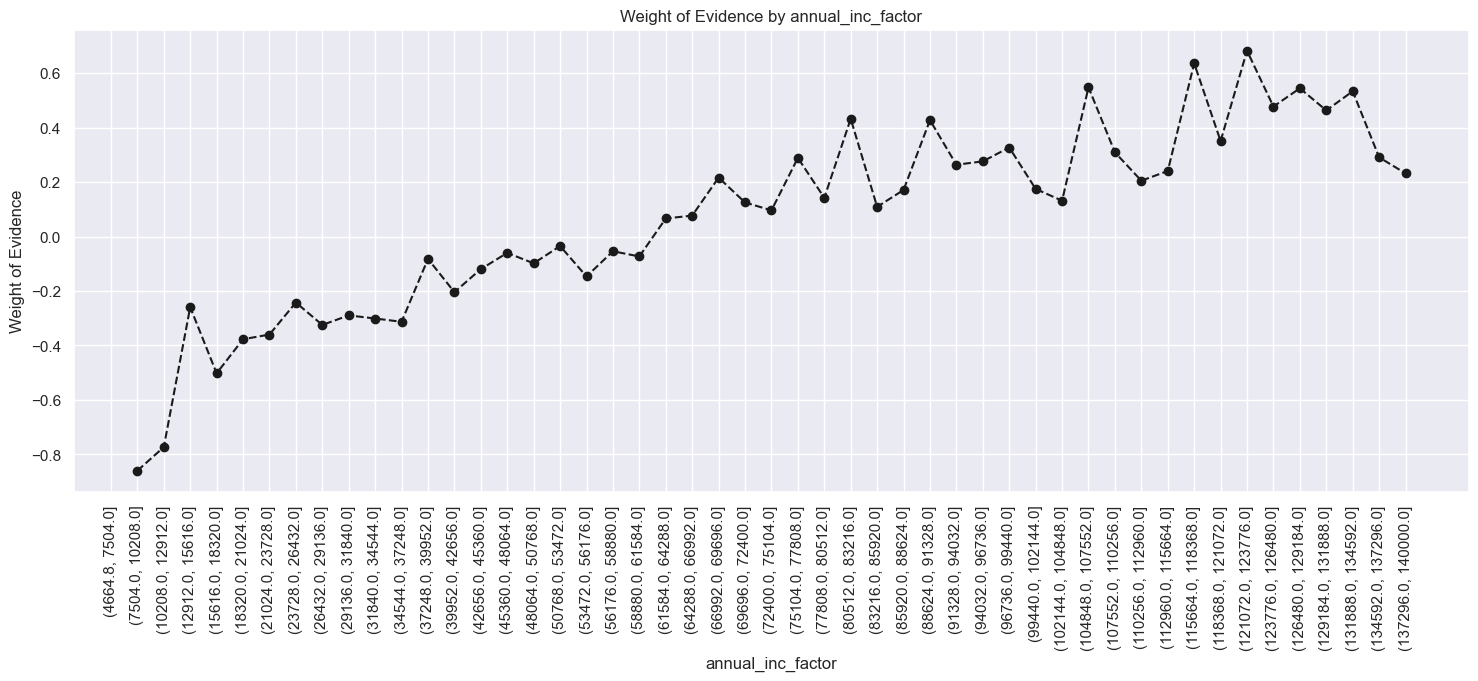

In [144]:
# Plot WoE
plot_by_woe(df_temp, 90)

Splitting the initial annual income variable into 50 categories doesn't work well for fine classing because there are a lot of people with low income and very few people with high income.

In [145]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

C:\Users\My Pham\AppData\Local\Temp\ipykernel_16936\3226331627.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
C:\Users\My Pham\AppData\Local\Temp\ipykernel_16936\3226331627.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
C:\Users\My Pham

**mths_since_last_delinq**

In [146]:
# Create one category for missing values and do fine and coarse classing for the rest
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\Users\My Pham\AppData\Local\Temp\ipykernel_16936\1379333849.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
C:\Users\My Pham\AppData\Local\Temp\ipykernel_16936\1379333849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)


mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                   (-0.17, 3.4]   1348   0.887982    0.031283  1197.0  151.0   
1                     (3.4, 6.8]   1890   0.882011    0.043861  1667.0  223.0   
2                    (6.8, 10.2]   3373   0.887341    0.078276  2993.0  380.0   
3                   (10.2, 13.6]   2496   0.897035    0.057924  2239.0  257.0   
4                   (13.6, 17.0]   3165   0.885308    0.073449  2802.0  363.0   
5                   (17.0, 20.4]   2282   0.894829    0.052958  2042.0  240.0   
6                   (20.4, 23.8]   2115   0.898818    0.049082  1901.0  214.0   
7                   (23.8, 27.2]   2755   0.896552    0.063934  2470.0  285.0   
8                   (27.2, 30.6]   1929   0.897356    0.044766  1731.0  198.0   
9                   (30.6, 34.0]   2453   0.892784    0.056926  2190.0  263.0   
10                  (34.0, 37.4]   1786   0.905935    0.041447  1618.0  168.0   
11                  (37.4, 40.8]   1765   0.888952    0.040960  1569.0  196.0   
12                  (40.8, 44.2]   2270   0.878414    0.052679  1994.0  276.0   
13                  (44.2, 47.6]   1664   0.900240    0.038616  1498.0  166.0   
14                  (47.6, 51.0]   1739   0.889017    0.040356  1546.0  193.0   
15                  (51.0, 54.4]   1158   0.887737    0.026873  1028.0  130.0   
16                  (54.4, 57.8]   1130   0.912389    0.026224  1031.0   99.0   
17                  (57.8, 61.2]   1423   0.897400    0.033023  1277.0  146.0   
18                  (61.2, 64.6]   1015   0.892611    0.023555   906.0  109.0   
19                  (64.6, 68.0]   1342   0.892697    0.031143  1198.0  144.0   
20                  (68.0, 71.4]    930   0.886022    0.021582   824.0  106.0   
21                  (71.4, 74.8]    928   0.889009    0.021536   825.0  103.0   
22                  (74.8, 78.2]   1195   0.911297    0.027732  1089.0  106.0   
23                  (78.2, 81.6]    768   0.880208    0.017823   676.0   92.0   
24                  (81.6, 85.0]    136   0.904412    0.003156   123.0   13.0   
25                  (85.0, 88.4]     10   1.000000    0.000232    10.0    0.0   
26                  (88.4, 91.8]      1   1.000000    0.000023     1.0    0.0   
27                  (91.8, 95.2]      2   1.000000    0.000046     2.0    0.0   
28                  (95.2, 98.6]      3   0.666667    0.000070     2.0    1.0   
29                 (98.6, 102.0]      4   1.000000    0.000093     4.0    0.0   
30                (102.0, 105.4]      2   1.000000    0.000046     2.0    0.0   
31                (105.4, 108.8]      3   1.000000    0.000070     3.0    0.0   
32                (108.8, 112.2]      1   1.000000    0.000023     1.0    0.0   
33                (112.2, 115.6]      1   1.000000    0.000023     1.0    0.0   
34                (115.6, 119.0]      2   1.000000    0.000046     2.0    0.0   
35                (119.0, 122.4]      2   1.000000    0.000046     2.0    0.0   
36                (122.4, 125.8]      1   1.000000    0.000023     1.0    0.0   
37                (125.8, 129.2]      0        NaN    0.000000     NaN    NaN   
38                (129.2, 132.6]      1   1.000000    0.000023     1.0    0.0   
39                (132.6, 136.0]      1   1.000000    0.000023     1.0    0.0   
40                (136.0, 139.4]      0        NaN    0.000000     NaN    NaN   
41                (139.4, 142.8]      0        NaN    0.000000     NaN    NaN   
42                (142.8, 146.2]      1   1.000000    0.000023     1.0    0.0   
43                (146.2, 149.6]      0        NaN    0.000000     NaN    NaN   
44                (149.6, 153.0]      0        NaN    0.000000     NaN    NaN   
45                (153.0, 156.4]      0        NaN    0.000000     NaN    NaN   
46                (156.4, 159.8]      0        NaN    0.000000     NaN    NaN   
47                (159.8, 163.2]      0        NaN    0.000000     NaN    NaN   
48                (163.2, 166.6]  

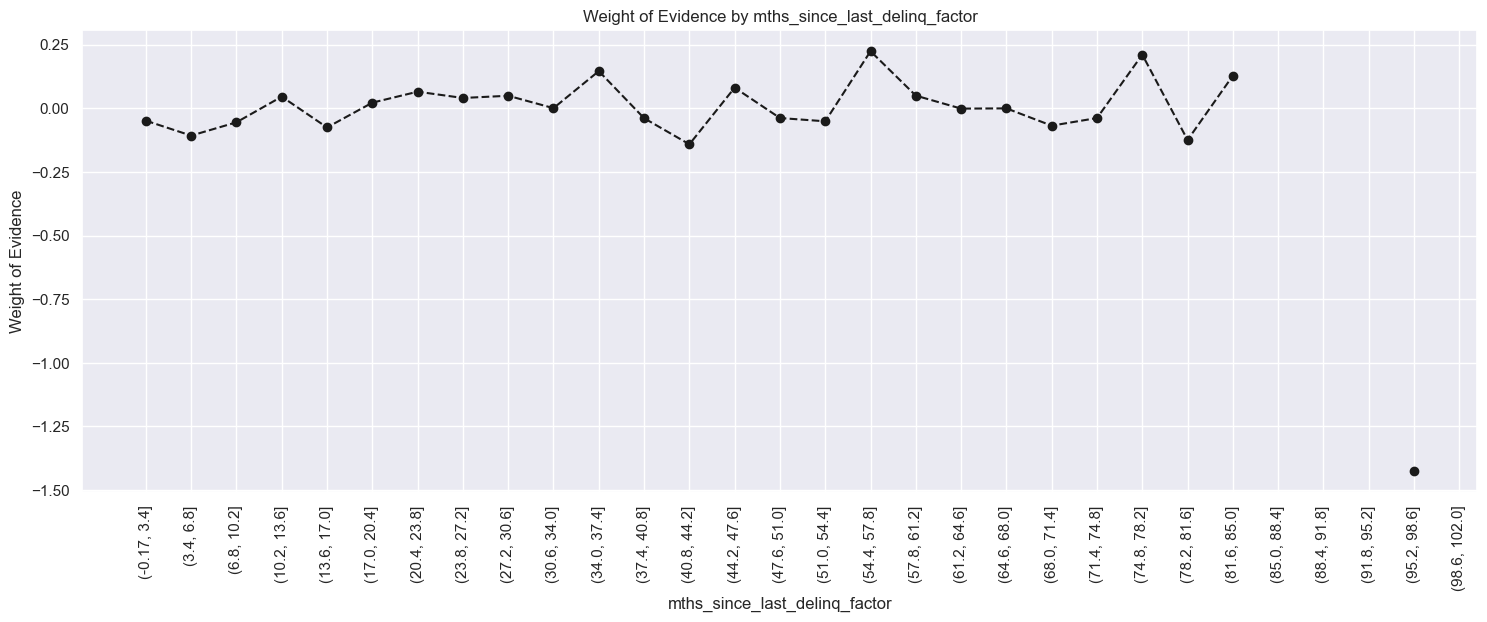

In [147]:
# Plot WoE
plot_by_woe(df_temp, 90)

In [148]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

C:\Users\My Pham\AppData\Local\Temp\ipykernel_16936\3878719826.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
C:\Users\My Pham\AppData\Local\Temp\ipykernel_16936\3878719826.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
C:\Users\My Pham\Ap

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 4

**dti (debt-to-income ratio)**

In [149]:
# Perform fine-classing for dti: using the 'cut' method, split the variable into 100 categories by its values
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_temp

C:\Users\My Pham\AppData\Local\Temp\ipykernel_16936\2513325006.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)


dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (-0.04, 0.4]    187   0.919786    0.002005   172.0   15.0   
1         (0.4, 0.8]    184   0.885870    0.001973   163.0   21.0   
2         (0.8, 1.2]    223   0.892377    0.002391   199.0   24.0   
3         (1.2, 1.6]    255   0.913725    0.002734   233.0   22.0   
4         (1.6, 2.0]    315   0.901587    0.003378   284.0   31.0   
5       (2.0, 2.399]    324   0.916667    0.003474   297.0   27.0   
6     (2.399, 2.799]    366   0.918033    0.003925   336.0   30.0   
7     (2.799, 3.199]    442   0.914027    0.004740   404.0   38.0   
8     (3.199, 3.599]    484   0.933884    0.005190   452.0   32.0   
9     (3.599, 3.999]    563   0.909414    0.006037   512.0   51.0   
10    (3.999, 4.399]    599   0.923205    0.006423   553.0   46.0   
11    (4.399, 4.799]    661   0.906203    0.007088   599.0   62.0   
12    (4.799, 5.199]    706   0.909348    0.007570   642.0   64.0   
13    (5.199, 5.599]    821   0.919610    0.008804   755.0   66.0   
14    (5.599, 5.999]    841   0.898930    0.009018   756.0   85.0   
15    (5.999, 6.398]    889   0.912261    0.009533   811.0   78.0   
16    (6.398, 6.798]    978   0.937628    0.010487   917.0   61.0   
17    (6.798, 7.198]   1021   0.905975    0.010948   925.0   96.0   
18    (7.198, 7.598]   1057   0.907285    0.011334   959.0   98.0   
19    (7.598, 7.998]   1170   0.913675    0.012546  1069.0  101.0   
20    (7.998, 8.398]   1172   0.908703    0.012567  1065.0  107.0   
21    (8.398, 8.798]   1127   0.913043    0.012085  1029.0   98.0   
22    (8.798, 9.198]   1281   0.917252    0.013736  1175.0  106.0   
23    (9.198, 9.598]   1309   0.902215    0.014036  1181.0  128.0   
24    (9.598, 9.998]   1371   0.913202    0.014701  1252.0  119.0   
25   (9.998, 10.397]   1429   0.913926    0.015323  1306.0  123.0   
26  (10.397, 10.797]   1521   0.907955    0.016310  1381.0  140.0   
27  (10.797, 11.197]   1555   0.909968    0.016674  1415.0  140.0   
28  (11.197, 11.597]   1597   0.899812    0.017125  1437.0  160.0   
29  (11.597, 11.997]   1554   0.909266    0.016664  1413.0  141.0   
30  (11.997, 12.397]   1607   0.897946    0.017232  1443.0  164.0   
31  (12.397, 12.797]   1719   0.906923    0.018433  1559.0  160.0   
32  (12.797, 13.197]   1614   0.918216    0.017307  1482.0  132.0   
33  (13.197, 13.597]   1717   0.907397    0.018411  1558.0  159.0   
34  (13.597, 13.997]   1707   0.893966    0.018304  1526.0  181.0   
35  (13.997, 14.396]   1724   0.903132    0.018487  1557.0  167.0   
36  (14.396, 14.796]   1773   0.895093    0.019012  1587.0  186.0   
37  (14.796, 15.196]   1755   0.899715    0.018819  1579.0  176.0   
38  (15.196, 15.596]   1695   0.897935    0.018176  1522.0  173.0   
39  (15.596, 15.996]   1752   0.903539    0.018787  1583.0  169.0   
40  (15.996, 16.396]   1653   0.903206    0.017725  1493.0  160.0   
41  (16.396, 16.796]   1689   0.894020    0.018111  1510.0  179.0   
42  (16.796, 17.196]   1770   0.899435    0.018980  1592.0  178.0   
43  (17.196, 17.596]   1708   0.885831    0.018315  1513.0  195.0   
44  (17.596, 17.996]   1680   0.901190    0.018015  1514.0  166.0   
45  (17.996, 18.395]   1671   0.901257    0.017918  1506.0  165.0   
46  (18.395, 18.795]   1638   0.903541    0.017564  1480.0  158.0   
47  (18.795, 19.195]   1628   0.882064    0.017457  1436.0  192.0   
48  (19.195, 19.595]   1606   0.887298    0.017221  1425.0  181.0   
49  (19.595, 19.995]   1603   0.884591    0.017189  1418.0  185.0   
50  (19.995, 20.395]   1512   0.888889    0.016213  1344.0  168.0   
51  (20.395, 20.795]   1656   0.882246    0.017757  1461.0  195.0   
52  (20.795, 21.195]   1505   0.885714    0.016138  1333.0  172.0   
53  (21.195, 21.595]   1455   0.879725    0.015602  1280.0  175.0   
54  (21.595, 21.995]   1452   0.884298    0.015570  1284.0  168.0   
55  (21.995, 22.394]   1394   0.870158    0.014948  1213.0  181.0   
56  (22.394, 22.794]   1309   0.862490    0.014036  1129.0  180.0   
57  (22.

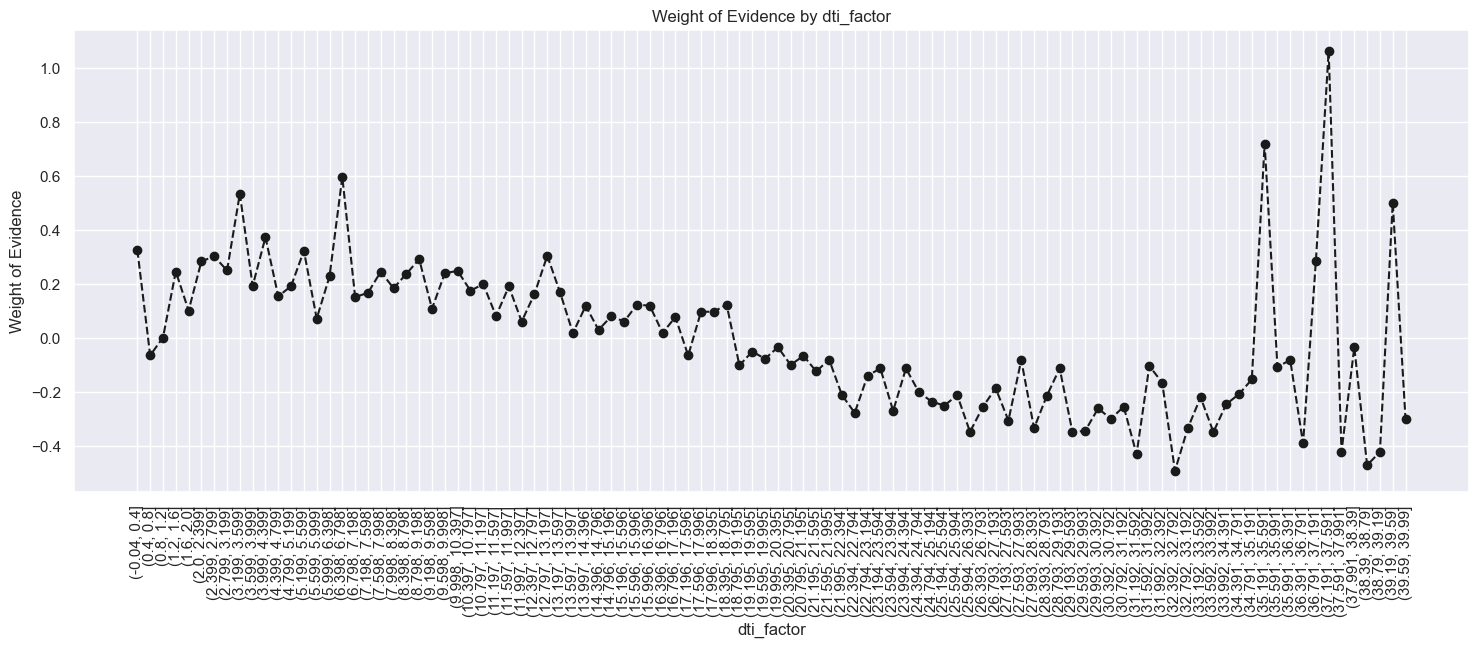

In [150]:
# Plot WoE
plot_by_woe(df_temp, 90)

Similarly to income, initial examination shows that most values are lower than 200. Hence, we are going to have one category for more than 35, and we are going to apply our approach to determine the categories of everyone with 150k or less.

In [151]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [152]:
# Perform fine-classing: using the 'cut' method, split the variable into 50 categories by its values
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\Users\My Pham\AppData\Local\Temp\ipykernel_16936\1014907257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)


dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0   (-0.035, 0.7]    328   0.899390    0.003544   295.0   33.0     0.003572   
1      (0.7, 1.4]    393   0.910941    0.004246   358.0   35.0     0.004335   
2      (1.4, 2.1]    536   0.901119    0.005792   483.0   53.0     0.005849   
3      (2.1, 2.8]    607   0.917628    0.006559   557.0   50.0     0.006745   
4      (2.8, 3.5]    811   0.928483    0.008763   753.0   58.0     0.009118   
5      (3.5, 4.2]    970   0.909278    0.010481   882.0   88.0     0.010680   
6      (4.2, 4.9]   1140   0.913158    0.012318  1041.0   99.0     0.012605   
7      (4.9, 5.6]   1370   0.913869    0.014803  1252.0  118.0     0.015160   
8      (5.6, 6.3]   1491   0.905433    0.016111  1350.0  141.0     0.016347   
9      (6.3, 7.0]   1722   0.927410    0.018607  1597.0  125.0     0.019338   
10     (7.0, 7.7]   1846   0.906284    0.019946  1673.0  173.0     0.020258   
11     (7.7, 8.4]   2044   0.910959    0.022086  1862.0  182.0     0.022547   
12     (8.4, 9.1]   2097   0.913209    0.022659  1915.0  182.0     0.023189   
13     (9.1, 9.8]   2319   0.909013    0.025057  2108.0  211.0     0.025526   
14    (9.8, 10.5]   2519   0.911473    0.027218  2296.0  223.0     0.027802   
15   (10.5, 11.2]   2694   0.909800    0.029109  2451.0  243.0     0.029679   
16   (11.2, 11.9]   2748   0.903202    0.029693  2482.0  266.0     0.030054   
17   (11.9, 12.6]   2844   0.904712    0.030730  2573.0  271.0     0.031156   
18   (12.6, 13.3]   2886   0.911642    0.031184  2631.0  255.0     0.031858   
19   (13.3, 14.0]   3056   0.899869    0.033021  2750.0  306.0     0.033299   
20   (14.0, 14.7]   3068   0.898957    0.033150  2758.0  310.0     0.033396   
21   (14.7, 15.4]   2954   0.899797    0.031919  2658.0  296.0     0.032185   
22   (15.4, 16.1]   3050   0.901967    0.032956  2751.0  299.0     0.033312   
23   (16.1, 16.8]   2914   0.897392    0.031486  2615.0  299.0     0.031665   
24   (16.8, 17.5]   3078   0.889214    0.033258  2737.0  341.0     0.033142   
25   (17.5, 18.2]   2964   0.904858    0.032027  2682.0  282.0     0.032476   
26   (18.2, 18.9]   2863   0.895913    0.030935  2565.0  298.0     0.031059   
27   (18.9, 19.6]   2796   0.887697    0.030211  2482.0  314.0     0.030054   
28   (19.6, 20.3]   2772   0.889610    0.029952  2466.0  306.0     0.029861   
29   (20.3, 21.0]   2830   0.880919    0.030579  2493.0  337.0     0.030187   
30   (21.0, 21.7]   2517   0.885181    0.027197  2228.0  289.0     0.026979   
31   (21.7, 22.4]   2495   0.872144    0.026959  2176.0  319.0     0.026349   
32   (22.4, 23.1]   2261   0.869527    0.024431  1966.0  295.0     0.023806   
33   (23.1, 23.8]   2327   0.877954    0.025144  2043.0  284.0     0.024738   
34   (23.8, 24.5]   2127   0.872120    0.022983  1855.0  272.0     0.022462   
35   (24.5, 25.2]   1929   0.870399    0.020843  1679.0  250.0     0.020331   
36   (25.2, 25.9]   1707   0.867018    0.018444  1480.0  227.0     0.017921   
37   (25.9, 26.6]   1657   0.858781    0.017904  1423.0  234.0     0.017231   
38   (26.6, 27.3]   1553   0.869285    0.016780  1350.0  203.0     0.016347   
39   (27.3, 28.0]   1559   0.874278    0.016845  1363.0  196.0     0.016504   
40   (28.0, 28.7]   1390   0.861871    0.015019  1198.0  192.0     0.014506   
41   (28.7, 29.4]   1341   0.870992    0.014490  1168.0  173.0     0.014143   
42   (29.4, 30.1]   1147   0.852659    0.012394   978.0  169.0     0.011842   
43   (30.1, 30.8]    838   0.862768    0.009055   723.0  115.0     0.008755   
44   (30.8, 31.5]    798   0.859649    0.008623   686.0  112.0     0.008307   
45   (31.5, 32.2]    734   0.877384    0.007931   644.0   90.0     0.007798   
46   (32.2, 32.9]    696   0.849138    0.007520   591.0  105.0     0.007156   
47   (32.9, 33.6]    621   0.856683    0.006710   532.0   89.0     0.006442   
48   (33.6, 34.3]    634   0.859621    0.006850   545.0   89.0     0.006599   
49   (34.3, 35.0]    507   0.867850    0.005478   440.0  

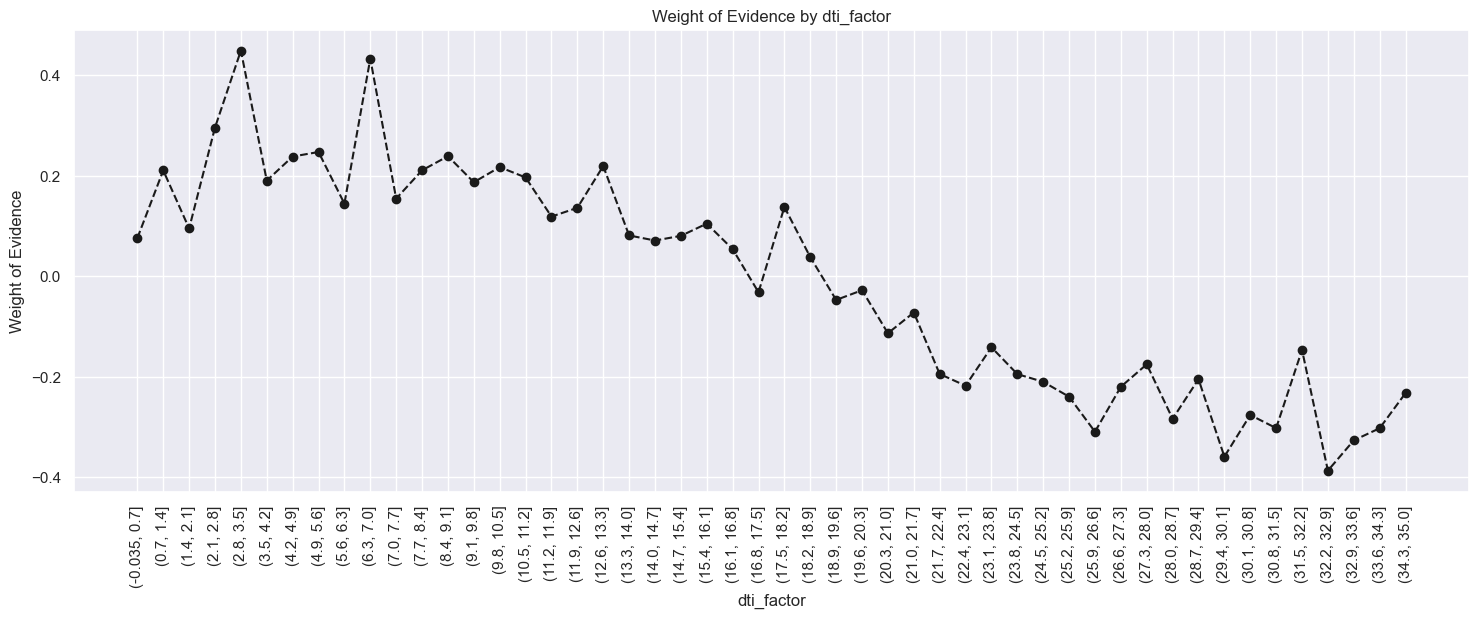

In [153]:
# Plot WoE
plot_by_woe(df_temp, 90)

In [154]:
# Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

C:\Users\My Pham\AppData\Local\Temp\ipykernel_16936\284476014.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
C:\Users\My Pham\AppData\Local\Temp\ipykernel_16936\284476014.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
C:\Users\My Pham\AppData\Local\Temp\ipykernel_16936\284476014.py:4: PerformanceWarning: DataFrame is highly fragm

**mths_since_last_record**

In [155]:
# Create one category for missing values and do fine and coarse classing for the rest
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
#sum(loan_data_temp['mths_since_last_record'].isnull())

# Perform fine-classing: using the 'cut' method, split the variable into 50 categories by its values
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)

# Calculate WoE
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\Users\My Pham\AppData\Local\Temp\ipykernel_16936\3042093881.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
C:\Users\My Pham\AppData\Local\Temp\ipykernel_16936\3042093881.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
C:\Users\My Pham\anaconda3\lib\site-packages\pandas\core\arrayl

mths_since_last_record_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                 (-0.129, 2.58]    244   0.881148    0.019410   215.0   29.0   
1                   (2.58, 5.16]     36   0.888889    0.002864    32.0    4.0   
2                   (5.16, 7.74]     39   0.923077    0.003102    36.0    3.0   
3                  (7.74, 10.32]     66   0.939394    0.005250    62.0    4.0   
4                  (10.32, 12.9]     42   0.833333    0.003341    35.0    7.0   
5                  (12.9, 15.48]     69   0.869565    0.005489    60.0    9.0   
6                 (15.48, 18.06]     95   0.873684    0.007557    83.0   12.0   
7                 (18.06, 20.64]     58   0.965517    0.004614    56.0    2.0   
8                 (20.64, 23.22]    101   0.891089    0.008034    90.0   11.0   
9                  (23.22, 25.8]     94   0.946809    0.007478    89.0    5.0   
10                 (25.8, 28.38]    135   0.896296    0.010739   121.0   14.0   
11                (28.38, 30.96]    103   0.922330    0.008193    95.0    8.0   
12                (30.96, 33.54]    196   0.923469    0.015591   181.0   15.0   
13                (33.54, 36.12]    195   0.907692    0.015512   177.0   18.0   
14                 (36.12, 38.7]    166   0.909639    0.013205   151.0   15.0   
15                 (38.7, 41.28]    234   0.905983    0.018614   212.0   22.0   
16                (41.28, 43.86]    194   0.896907    0.015432   174.0   20.0   
17                (43.86, 46.44]    328   0.917683    0.026092   301.0   27.0   
18                (46.44, 49.02]    367   0.920981    0.029194   338.0   29.0   
19                 (49.02, 51.6]    231   0.948052    0.018376   219.0   12.0   
20                 (51.6, 54.18]    447   0.926174    0.035558   414.0   33.0   
21                (54.18, 56.76]    264   0.897727    0.021001   237.0   27.0   
22                (56.76, 59.34]    393   0.928753    0.031262   365.0   28.0   
23                (59.34, 61.92]    287   0.909408    0.022830   261.0   26.0   
24                 (61.92, 64.5]    405   0.920988    0.032217   373.0   32.0   
25                 (64.5, 67.08]    394   0.961929    0.031342   379.0   15.0   
26                (67.08, 69.66]    272   0.893382    0.021637   243.0   29.0   
27                (69.66, 72.24]    366   0.912568    0.029115   334.0   32.0   
28                (72.24, 74.82]    231   0.922078    0.018376   213.0   18.0   
29                 (74.82, 77.4]    350   0.920000    0.027842   322.0   28.0   
30                 (77.4, 79.98]    228   0.903509    0.018137   206.0   22.0   
31                (79.98, 82.56]    355   0.898592    0.028240   319.0   36.0   
32                (82.56, 85.14]    288   0.916667    0.022910   264.0   24.0   
33                (85.14, 87.72]    251   0.836653    0.019967   210.0   41.0   
34                 (87.72, 90.3]    345   0.895652    0.027444   309.0   36.0   
35                 (90.3, 92.88]    249   0.847390    0.019807   211.0   38.0   
36                (92.88, 95.46]    385   0.867532    0.030626   334.0   51.0   
37                (95.46, 98.04]    401   0.877805    0.031899   352.0   49.0   
38               (98.04, 100.62]    327   0.874618    0.026012   286.0   41.0   
39               (100.62, 103.2]    526   0.884030    0.041842   465.0   61.0   
40               (103.2, 105.78]    396   0.891414    0.031501   353.0   43.0   
41              (105.78, 108.36]    565   0.886726    0.044945   501.0   64.0   
42              (108.36, 110.94]    407   0.911548    0.032376   371.0   36.0   
43              (110.94, 113.52]    524   0.887405    0.041683   465.0   59.0   
44               (113.52, 116.1]    515   0.908738    0.040967   468.0   47.0   
45               (116.1, 118.68]    314   0.882166    0.024978   277.0   37.0   
46              (118.68, 121.26]     92   0.847826    0.007318    78.0   14.0   
47              (121.26, 123.84]      0        NaN    0.000000     NaN    NaN   
48              (123.84, 126.42]  

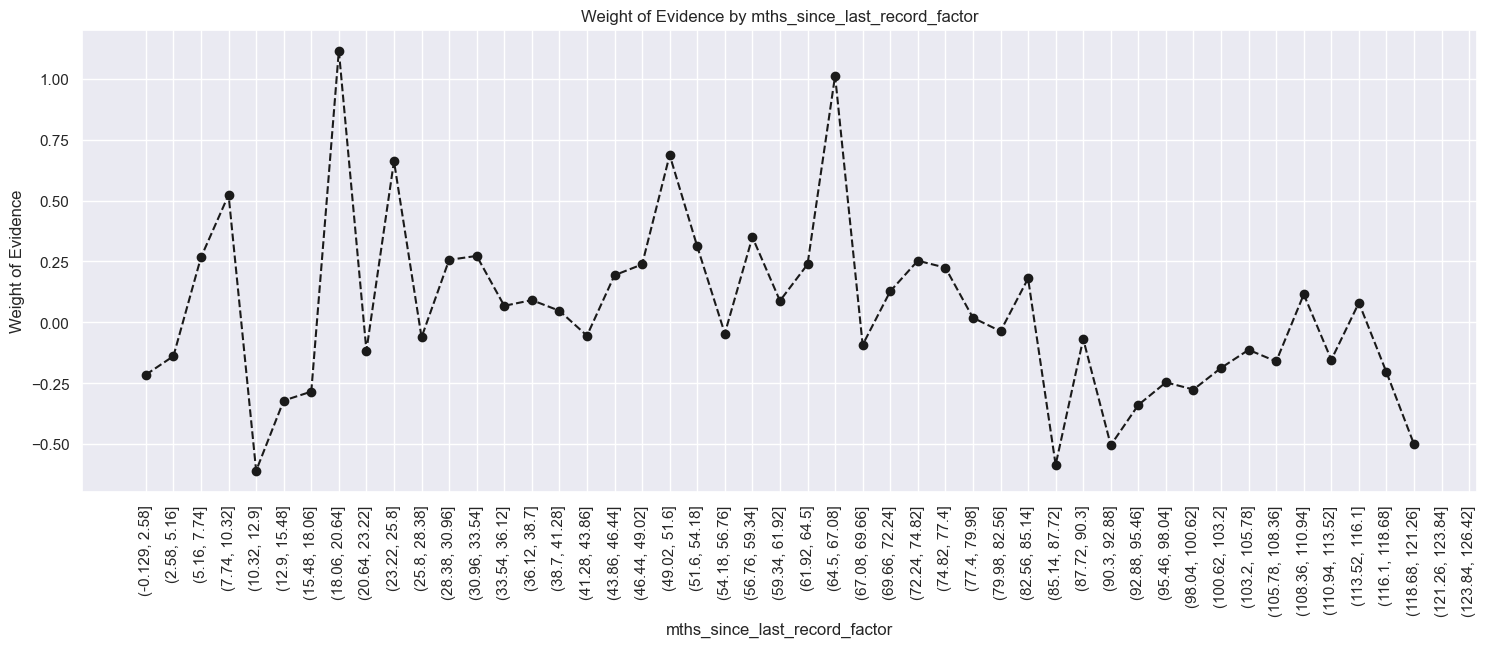

In [156]:
# Plot WoE
plot_by_woe(df_temp, 90)

In [157]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

C:\Users\My Pham\AppData\Local\Temp\ipykernel_16936\1059239224.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
C:\Users\My Pham\AppData\Local\Temp\ipykernel_16936\1059239224.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
C:\Users\My Pham\Ap

### Preprocessing the Test Dataset

In [158]:
# Create a copy of input data, run train data process first before running test data process
# loan_data_inputs_train = df_inputs_prepr
loan_data_inputs_test = df_inputs_prepr

In [159]:
# loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
# loan_data_targets_train.to_csv('loan_data_targets_train.csv')
loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
loan_data_targets_test.to_csv('loan_data_targets_test.csv')